# Youtube Comment Sentiment Analysis
**Group member ID : 160204021 , 160204029, 160204053**

# Pre Processing

##Scarpping Code



```
function scrapeCommentsWithoutReplies(){
  var ss = SpreadsheetApp.getActiveSpreadsheet();
  var result=[['Name','Comment','Time','Likes','Reply Count']];
  var vid = ss.getSheets()[0].getRange(1,1).getValue();
  var nextPageToken=undefined;
 
  while(1){
    var data = YouTube.CommentThreads.list('snippet', {videoId: vid, maxResults: 100, pageToken: nextPageToken})
    nextPageToken=data.nextPageToken
    //console.log(nextPageToken);
    for (var row=0; row<data.items.length; row++) {
      result.push([data.items[row].snippet.topLevelComment.snippet.authorDisplayName,
                   data.items[row].snippet.topLevelComment.snippet.textDisplay,
                   data.items[row].snippet.topLevelComment.snippet.publishedAt,
                   data.items[row].snippet.topLevelComment.snippet.likeCount,
                   data.items[row].snippet.totalReplyCount]);
    }
    if(nextPageToken =="" || typeof nextPageToken === "undefined"){
      break;
    }
  }
var newSheet=ss.insertSheet(ss.getNumSheets())
newSheet.getRange(1, 1,result.length,5).setValues(result)

}
```

 



##Pre Processing of Data

```
#!/usr/bin/env python
# coding: utf-8
import re
import pandas as pd
csv1 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/vaccine - Sheet2.csv',encoding='utf-8', sep=',') 
csv2 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/ps5 - Sheet2.csv',encoding='utf-8', sep=',') 
csv3 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/liverpool - Sheet2.csv',encoding='utf-8', sep=',') 
csv4 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/d-day - Sheet2.csv',encoding='utf-8', sep=',') 
csv5 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/9to5mac - Sheet2.csv',encoding='utf-8', sep=',') 
csv6 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/bean - Sheet2.csv',encoding='utf-8', sep=',') 
csv6.shape


import re
import pandas as pd
csv_ = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/depression - Sheet2.csv',encoding='utf-8', sep=',')





csv= pd.concat([csv1,csv2,csv3,csv4,csv5,csv6],axis=0)
#print(csv)
data = csv.sample(frac = 1) 
#print(data)
data.to_csv('C:/Users/Anas/Downloads/sc dataset/dataset.csv',index=False, encoding='utf-8')





csv_ = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/dataset.csv',encoding='utf-8', sep=',') 





import re
import pandas as pd
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)





csv_[u'Comment'] = csv_[u'Comment'].astype(str)
csv_[u'Comment'] = csv_[u'Comment'].apply(lambda x:remove_emoji(x))
#data.to_csv('C:/Users/Anas/Downloads/sc dataset/dataset_.csv',index=False, encoding='utf-8')
csv_.to_csv('C:/Users/Anas/Downloads/sc dataset/depression - Sheet2.csv',index=False, encoding='utf-8')





import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())
t = "Io andiamo to the beach with my amico."
#sent = "Io andiamo to the beach with my amico."
sent = " ".join(w for w in nltk.wordpunct_tokenize(t) if w.lower() in words or not w.isalpha())

sent


import re
import pandas as pd
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#nltk.download('words')
        

def preprocess(text):
  #text = text.lower()
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text) # remove URLs
  text = re.sub('<.*?>', '', text)   # remove HTML tags)
  text = re.sub(r"china", "China", text
  text = re.sub(r"chinese", "Chinese", text)
  text = re.sub(r"india", "India", text)
  text = re.sub(r" J K ", " JK ", text)
  text = re.sub('@(\w+)',"", text ) # remove usernames
  text = re.sub(r"[#|_]", '', text) # remove the # in #hashtag
  text = word_tokenize(text) # remove repeated characters (helloooooooo into hello)
  
  return text

dt = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/depression - Sheet2.csv',encoding='utf-8', sep=',')

dt = pd.read_csv("C:/Users/Anas/Downloads/sc dataset/dataset_.csv")

dt.Comment=dt.Comment.astype(str)

get_ipython().run_line_magic('time', "dt['Comment'] = dt['Comment'].apply(lambda x: preprocess(x))")

get_ipython().run_line_magic('time', "dt['Comment'] = dt.Comment.apply(lambda x: ' '.join([str(i) for i in x]))")


dt.shape


dt = dt.sample(frac = 1)

dt = dt.reset_index(drop=True)

dt1 = dt.head(3880)
dt2 =dt.tail(3879)


dt1.to_csv('C:/Users/Anas/Downloads/sc dataset/depression_1.csv',index=False, encoding='utf-8')
dt2.to_csv('C:/Users/Anas/Downloads/sc dataset/depression_2.csv',index=False, encoding='utf-8')


dtt1 = pd.read_csv("C:/Users/Anas/Downloads/sc dataset/depression_1.csv")
dtt2 = pd.read_csv("C:/Users/Anas/Downloads/sc dataset/depression_2.csv")


a = dtt1.Comment.str.len()
a.max()

for i in range(len(dtt1.Comment)):
    if(a[i]>250 or a[i]<60):
        print(dtt1.Comment[i])
        #dt.drop(i)
        dtt1.drop(i, inplace=True)
        

b= dtt2.Comment.str.len()
b.max()

for i in range(len(dtt2.Comment)):
    if(b[i]<12 or b[i]>60):
        print(dtt2.Comment[i])
        #dt.drop(i)
        dtt2.drop(i, inplace=True)
        
ab= pd.concat([dtt1,dtt2],axis=0)


ab.shape

da = ab.sample(frac = 1)

dac = da.Comment

dac

dac.to_csv('C:/Users/Anas/Downloads/sc dataset/depression_f.csv',index=False, encoding='utf-8')


dataset = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/depression_f.csv',encoding='utf-8', sep=',') 



dataset = dataset.dropna() 


dataset = dataset.sample(frac = 1)


dataset = dataset.head(500)

dataset = dataset.reset_index(drop=True)

dataset

dataset.to_csv('C:/Users/Anas/Downloads/sc dataset/depression_f1.csv',index=False, encoding='utf-8')


dx = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/dset.csv',encoding='utf-8', sep=',') 

dx1 =dx.head(3865)
dx1.shape
dx1.to_csv('C:/Users/Anas/Downloads/sc dataset/data3200.csv',index=False, encoding='utf-8')

import re
import pandas as pd
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
 
data = pd.read_csv('C:/Users/Anas/Desktop/iphone11 - Sheet2.csv',encoding='utf-8', sep=',') # read tsv file
print(data['Comment'])
 
data[u'Comment'] = data[u'Comment'].astype(str)
data[u'Comment'] = data[u'Comment'].apply(lambda x:remove_emoji(x))
data.to_csv('C:/Users/Anas/Desktop/iphone11-Sheet2_dem.csv',index=False, encoding='utf-8')

pip install langdetect

import re
import pandas as pd
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
        

def preprocess(text):
  text = text.lower()
  #text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text) # remove URLs
  text = re.sub('<.*?>', '', text)   # remove HTML tags
  text = re.sub(r'[^\w\s]', '', text) # remove punc
  text = re.sub(r'\d+','',text)# remove numbers
  #text = re.sub(r"[.?!]", '', text) 
  #text = re.sub('[0-9]+', '', text)
  text = re.sub('@(\w+)',"", text ) # remove usernames
  text = re.sub(r"[#|_]", '', text) # remove the # in #hashtag
  text = word_tokenize(text) # remove repeated characters (helloooooooo into hello)
  
  #removing stopwords and puncuations
  mystopword = set(nltk.corpus.stopwords.words('english') + ['URL'])
  text = [word for word in text if word not in mystopword]
  text = [word for word in text if word not in punctuation]

  # mystopwords = set(stopwords.words('english') + list(punctuation) + ['URL'])
    
  #apply lemmatizing
  wn = nltk.WordNetLemmatizer()
  text = [wn.lemmatize(word) for word in text]


  #apply stemming
  ps = nltk.PorterStemmer()
  text = [ps.stem(word) for word in text]
  
  return text


dt = pd.read_csv("C:/Users/Anas/Desktop/iphone11-Sheet2_dem.csv")

dt.Comment=dt.Comment.astype(str)

get_ipython().run_line_magic('time', "dt['Comment'] = dt['Comment'].apply(lambda x: preprocess(x))")

get_ipython().run_line_magic('time', "dt['Comment'] = dt.Comment.apply(lambda x: ' '.join([str(i) for i in x]))")


a= dt.Comment.str.len()



for i in range(len(dt.Comment)):
    if(a[i]<50):
        print(dt.Comment[i])
        #dt.drop(i)
        dt.drop(i, inplace=True)
        

dt.to_csv('C:/Users/Anas/Desktop/iphone11-Sheet2_dem3.csv',index=False, encoding='utf-8')

dt.shape

import pandas as pd
d = pd.read_csv('C:/Users/Anas/Desktop/final1 - Sheet1.csv')


dtn=dt.Comment.to_numpy()
print(len(dtn))

for i in range(len(dtn)):
    d.text[i] = dtn[i]


d


d.reindex(d.columns + ['label','anas','billa','rupu'], axis=1)


d.to_csv('C:/Users/Anas/Desktop/xx.csv')
df = pd.DataFrame(dict(A=[5,3,5,6], C=["foo","bar","fooXYZbar", "bat"]))


df=df[~df.C.str.contains("foobar")]
df



import pandas as pd
x1 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/xxxx.csv',encoding='utf-8', sep=',') 

x1=x1.head(296)
x1

import pandas as pd
x2 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/xxx.csv',encoding='utf-8', sep=',') 

x2 = x2.head(1008)

x1.to_csv('C:/Users/Anas/Downloads/sc dataset/a1.csv',index=False, encoding='utf-8')

x2.to_csv('C:/Users/Anas/Downloads/sc dataset/a2.csv',index=False, encoding='utf-8')

a1 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/a1.csv',encoding='utf-8', sep=',') 

a2 = pd.read_csv('C:/Users/Anas/Downloads/sc dataset/a2.csv',encoding='utf-8', sep=',') 

a2
aa= pd.concat([a1,a2],axis=0)
aaa = aa.sample(frac = 1) 

aaa
aaa = aaa.reset_index(drop=True)

aaa.to_csv('C:/Users/Anas/Downloads/sc dataset/finaldataset.csv',index=False, encoding='utf-8')

aaa = pd.read_csv('C:/Users/Anas/Downloads/sc dataset//finaldataset.csv',encoding='utf-8', sep=',') 

len(aaa)

df = pd.DataFrame(data=aaa.text)
dg = pd.DataFrame(data=aaa.label)


dy= pd.concat([df,dg],axis=1)

dz = dy["label"].round().astype(int)

dz

dy= pd.concat([df,dz],axis=1)
dy

dz =dy.to_numpy()
dz1 = dz[0:1043]
dz2 = dz[1044:1174]

dz2 = dz[1175:1304]
dz2

df.size

dz[:,1]

first_split = dy.sample(frac=0.8,random_state=200)
print(first_split)

second_split=dy.drop(first_split.index)
print(second_split)

third_split = second_split.sample(frac=0.5,random_state=200)
print(third_split)

fourth_split=second_split.drop(third_split.index)
print(fourth_split)

first_split.to_csv('C:/Users/Anas/Downloads/sc dataset/Train.csv',index=False, encoding='utf-8')
third_split.to_csv('C:/Users/Anas/Downloads/sc dataset/Val.csv',index=False, encoding='utf-8')
fourth_split.to_csv('C:/Users/Anas/Downloads/sc dataset/Test.csv',index=False, encoding='utf-8')


```



# Bag of words and TF IDF Model

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import random
import re # regular expression
from collections import Counter 
from functools import partial
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from string import punctuation 

from IPython.core.display import display, HTML
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.metrics import classification_report
from tqdm import tqdm, tqdm_notebook # show progress bar

# PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split

# nltk text processors
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.style.use('ggplot')
tqdm.pandas()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


device(type='cuda')

In [ ]:
DATA_PATH ="/content/drive/MyDrive/sc project_21_29_53/finaldatasetpp.csv"

In [ ]:
df = pd.read_csv(DATA_PATH)
df


text  anas  ...  rupu  label
0     I miss being healthy . I ’ m alway in pain , b...     0  ...     0      0
1                                Mr bean fan from India     1  ...     1      1
2     I like the view ,  the reason why iwant to go ...     1  ...     1      1
3     I ’ ll get the ps5 slim . Instead of that spac...     0  ...     0      0
4     Americans who think they did it all bruv smh ....     0  ...     0      0
...                                                 ...   ...  ...   ...    ...
1299  If they have to get rappers and pay media outl...     0  ...     0      0
1300  I mean this is vox if the government said hey ...     0  ...     0      0
1301  I am getting an iPhone 11 soon and I am watchi...     1  ...     1      1
1302     Hope to buy this . But where has the money ...     0  ...     0      0
1303  I m finding that I have all of the symptoms , ...     0  ...     0      0

[1304 rows x 5 columns]

In [ ]:
df.sample(10)

text  anas  ...  rupu  label
226   Liverpool can win champions league more than p...     1  ...     1      1
743              for a second u sounded like sokka eye-     1  ...     0      1
761   i m getting the iphone 11 in purple next week ...     0  ...     0      0
1268  If u have asthma , suicidal thoughts , stress ...     0  ...     0      0
1290         It has been 5 mouths now and my life sucks     0  ...     0      0
296   What are the chances of the next iPhone having...     0  ...     0      0
234                                 Hello awesome video     1  ...     1      1
526         What tv are u using with that ps5 console ?     1  ...     1      1
651                                  Got mine yesterday     1  ...     1      1
96                                        I got one yay     1  ...     1      1

[10 rows x 5 columns]

In [ ]:
print('Number of records:', len(df), '\n')
print('Number of positive reviews:', len(df[df.label == 1]))
print('Number of negative reviews:', len(df[df.label == 0]), '\n')

print('Example negative review:')
print(df.loc[57,].text, '\n')
print('Example positive review:')
print(df.loc[141,].text, '\n')

Number of records: 1304 

Number of positive reviews: 720
Number of negative reviews: 584 

Example negative review:
The hardest beach to clear was Juno but it was taken very fast 

Example positive review:
Is it worth it . Yes if all you have still is a day one PS4 like myself , it ’ s not even a question , of course it ’ s worth it dude ! 



In [ ]:
test_corpus = '''York, New York, U.S.), 45th president of the United States (2017–21). Trump was a real-estate developer and businessman who owned, managed, or licensed his name to several hotels, casinos, golf courses, resorts, and residential properties in the New York City area and around the world. From the 1980s Trump also lent his name to scores of retail ventures—including branded lines of clothing, cologne, food, and furniture—and to Trump University, which offered seminars in real-estate education from 2005 to 2010. In the early 21st century his private conglomerate, the Trump Organization, comprised some 500 companies involved in a wide range of businesses, including hotels and resorts, residential properties, merchandise, and entertainment and television. Trump was the third president in U.S. history (after Andrew Johnson in 1868 and Bill Clinton in 1998) to be impeached by the U.S. House of Representatives and the only president to be impeached twice—once (in 2019) for abuse of power and obstruction of Congress in connection with the Ukraine scandal and once (in 2021) for “incitement of insurrection” in connection with the storming of the United States Capitol by a violent mob of Trump supporters as Congress met in joint session to ceremonially count electoral college votes from the 2020 presidential election. Both of Trump’s impeachments ended in his acquittal by the U.S. Senate. Trump lost the 2020 election to former vice president Joe Biden by 306 electoral votes to 232; he lost the popular vote by more than seven million votes.
'''
test_corpus

'York, New York, U.S.), 45th president of the United States (2017–21). Trump was a real-estate developer and businessman who owned, managed, or licensed his name to several hotels, casinos, golf courses, resorts, and residential properties in the New York City area and around the world. From the 1980s Trump also lent his name to scores of retail ventures—including branded lines of clothing, cologne, food, and furniture—and to Trump University, which offered seminars in real-estate education from 2005 to 2010. In the early 21st century his private conglomerate, the Trump Organization, comprised some 500 companies involved in a wide range of businesses, including hotels and resorts, residential properties, merchandise, and entertainment and television. Trump was the third president in U.S. history (after Andrew Johnson in 1868 and Bill Clinton in 1998) to be impeached by the U.S. House of Representatives and the only president to be impeached twice—once (in 2019) for abuse of power and o

In [ ]:
# remove special characters & lowercase
import re
clean_corpus = re.sub(r'[^\w\s]', '', test_corpus)
clean_corpus = clean_corpus.lower()
clean_corpus

'york new york us 45th president of the united states 201721 trump was a realestate developer and businessman who owned managed or licensed his name to several hotels casinos golf courses resorts and residential properties in the new york city area and around the world from the 1980s trump also lent his name to scores of retail venturesincluding branded lines of clothing cologne food and furnitureand to trump university which offered seminars in realestate education from 2005 to 2010 in the early 21st century his private conglomerate the trump organization comprised some 500 companies involved in a wide range of businesses including hotels and resorts residential properties merchandise and entertainment and television trump was the third president in us history after andrew johnson in 1868 and bill clinton in 1998 to be impeached by the us house of representatives and the only president to be impeached twiceonce in 2019 for abuse of power and obstruction of congress in connection with 

In [ ]:
# tokenize
clean_tokens = wordpunct_tokenize(clean_corpus)
print(clean_tokens)

['york', 'new', 'york', 'us', '45th', 'president', 'of', 'the', 'united', 'states', '201721', 'trump', 'was', 'a', 'realestate', 'developer', 'and', 'businessman', 'who', 'owned', 'managed', 'or', 'licensed', 'his', 'name', 'to', 'several', 'hotels', 'casinos', 'golf', 'courses', 'resorts', 'and', 'residential', 'properties', 'in', 'the', 'new', 'york', 'city', 'area', 'and', 'around', 'the', 'world', 'from', 'the', '1980s', 'trump', 'also', 'lent', 'his', 'name', 'to', 'scores', 'of', 'retail', 'venturesincluding', 'branded', 'lines', 'of', 'clothing', 'cologne', 'food', 'and', 'furnitureand', 'to', 'trump', 'university', 'which', 'offered', 'seminars', 'in', 'realestate', 'education', 'from', '2005', 'to', '2010', 'in', 'the', 'early', '21st', 'century', 'his', 'private', 'conglomerate', 'the', 'trump', 'organization', 'comprised', 'some', '500', 'companies', 'involved', 'in', 'a', 'wide', 'range', 'of', 'businesses', 'including', 'hotels', 'and', 'resorts', 'residential', 'propertie

In [ ]:
lemmatizer = WordNetLemmatizer()


clean_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]
clean_tokens = [lemmatizer.lemmatize(token, "v") for token in clean_tokens]
print(clean_tokens)

['york', 'new', 'york', 'u', '45th', 'president', 'of', 'the', 'unite', 'state', '201721', 'trump', 'wa', 'a', 'realestate', 'developer', 'and', 'businessman', 'who', 'own', 'manage', 'or', 'license', 'his', 'name', 'to', 'several', 'hotel', 'casino', 'golf', 'course', 'resort', 'and', 'residential', 'property', 'in', 'the', 'new', 'york', 'city', 'area', 'and', 'around', 'the', 'world', 'from', 'the', '1980s', 'trump', 'also', 'lend', 'his', 'name', 'to', 'score', 'of', 'retail', 'venturesincluding', 'brand', 'line', 'of', 'clothe', 'cologne', 'food', 'and', 'furnitureand', 'to', 'trump', 'university', 'which', 'offer', 'seminar', 'in', 'realestate', 'education', 'from', '2005', 'to', '2010', 'in', 'the', 'early', '21st', 'century', 'his', 'private', 'conglomerate', 'the', 'trump', 'organization', 'comprise', 'some', '500', 'company', 'involve', 'in', 'a', 'wide', 'range', 'of', 'business', 'include', 'hotel', 'and', 'resort', 'residential', 'property', 'merchandise', 'and', 'entertai

In [ ]:
porter = PorterStemmer()

clean_tokens = [porter.stem(token) for token in clean_tokens]

print(clean_tokens)

['york', 'new', 'york', 'u', '45th', 'presid', 'of', 'the', 'unit', 'state', '201721', 'trump', 'wa', 'a', 'realest', 'develop', 'and', 'businessman', 'who', 'own', 'manag', 'or', 'licens', 'hi', 'name', 'to', 'sever', 'hotel', 'casino', 'golf', 'cours', 'resort', 'and', 'residenti', 'properti', 'in', 'the', 'new', 'york', 'citi', 'area', 'and', 'around', 'the', 'world', 'from', 'the', '1980', 'trump', 'also', 'lend', 'hi', 'name', 'to', 'score', 'of', 'retail', 'venturesinclud', 'brand', 'line', 'of', 'cloth', 'cologn', 'food', 'and', 'furnitureand', 'to', 'trump', 'univers', 'which', 'offer', 'seminar', 'in', 'realest', 'educ', 'from', '2005', 'to', '2010', 'in', 'the', 'earli', '21st', 'centuri', 'hi', 'privat', 'conglomer', 'the', 'trump', 'organ', 'compris', 'some', '500', 'compani', 'involv', 'in', 'a', 'wide', 'rang', 'of', 'busi', 'includ', 'hotel', 'and', 'resort', 'residenti', 'properti', 'merchandis', 'and', 'entertain', 'and', 'televis', 'trump', 'wa', 'the', 'third', 'pres

In [ ]:
clean_tokens = [re.sub(r'\b[0-9]+\b', '<NUM>', token) for token in clean_tokens]
print(clean_tokens)

['york', 'new', 'york', 'u', '45th', 'presid', 'of', 'the', 'unit', 'state', '<NUM>', 'trump', 'wa', 'a', 'realest', 'develop', 'and', 'businessman', 'who', 'own', 'manag', 'or', 'licens', 'hi', 'name', 'to', 'sever', 'hotel', 'casino', 'golf', 'cours', 'resort', 'and', 'residenti', 'properti', 'in', 'the', 'new', 'york', 'citi', 'area', 'and', 'around', 'the', 'world', 'from', 'the', '<NUM>', 'trump', 'also', 'lend', 'hi', 'name', 'to', 'score', 'of', 'retail', 'venturesinclud', 'brand', 'line', 'of', 'cloth', 'cologn', 'food', 'and', 'furnitureand', 'to', 'trump', 'univers', 'which', 'offer', 'seminar', 'in', 'realest', 'educ', 'from', '<NUM>', 'to', '<NUM>', 'in', 'the', 'earli', '21st', 'centuri', 'hi', 'privat', 'conglomer', 'the', 'trump', 'organ', 'compris', 'some', '<NUM>', 'compani', 'involv', 'in', 'a', 'wide', 'rang', 'of', 'busi', 'includ', 'hotel', 'and', 'resort', 'residenti', 'properti', 'merchandis', 'and', 'entertain', 'and', 'televis', 'trump', 'wa', 'the', 'third', '

In [ ]:
#stop_words = set(stopwords.words('english'))
stop_words = set(nltk.corpus.stopwords.words('english') + ['URL'])
 
clean_tokens = [token for token in clean_tokens if token not in stop_words]
print(clean_tokens)

['york', 'new', 'york', 'u', '45th', 'presid', 'unit', 'state', '<NUM>', 'trump', 'wa', 'realest', 'develop', 'businessman', 'manag', 'licens', 'hi', 'name', 'sever', 'hotel', 'casino', 'golf', 'cours', 'resort', 'residenti', 'properti', 'new', 'york', 'citi', 'area', 'around', 'world', '<NUM>', 'trump', 'also', 'lend', 'hi', 'name', 'score', 'retail', 'venturesinclud', 'brand', 'line', 'cloth', 'cologn', 'food', 'furnitureand', 'trump', 'univers', 'offer', 'seminar', 'realest', 'educ', '<NUM>', '<NUM>', 'earli', '21st', 'centuri', 'hi', 'privat', 'conglomer', 'trump', 'organ', 'compris', '<NUM>', 'compani', 'involv', 'wide', 'rang', 'busi', 'includ', 'hotel', 'resort', 'residenti', 'properti', 'merchandis', 'entertain', 'televis', 'trump', 'wa', 'third', 'presid', 'u', 'histori', 'andrew', 'johnson', '<NUM>', 'bill', 'clinton', '<NUM>', 'impeach', 'u', 'hous', 'repres', 'onli', 'presid', 'impeach', 'twiceonc', '<NUM>', 'abus', 'power', 'obstruct', 'congress', 'connect', 'ukrain', 'sca

In [ ]:
def build_vocab(corpus):
    vocab = {}
    for doc in corpus:
        for token in doc:
            if token not in vocab.keys():
                vocab[token] = len(vocab)
    return vocab

print(build_vocab([clean_tokens]))

{'york': 0, 'new': 1, 'u': 2, '45th': 3, 'presid': 4, 'unit': 5, 'state': 6, '<NUM>': 7, 'trump': 8, 'wa': 9, 'realest': 10, 'develop': 11, 'businessman': 12, 'manag': 13, 'licens': 14, 'hi': 15, 'name': 16, 'sever': 17, 'hotel': 18, 'casino': 19, 'golf': 20, 'cours': 21, 'resort': 22, 'residenti': 23, 'properti': 24, 'citi': 25, 'area': 26, 'around': 27, 'world': 28, 'also': 29, 'lend': 30, 'score': 31, 'retail': 32, 'venturesinclud': 33, 'brand': 34, 'line': 35, 'cloth': 36, 'cologn': 37, 'food': 38, 'furnitureand': 39, 'univers': 40, 'offer': 41, 'seminar': 42, 'educ': 43, 'earli': 44, '21st': 45, 'centuri': 46, 'privat': 47, 'conglomer': 48, 'organ': 49, 'compris': 50, 'compani': 51, 'involv': 52, 'wide': 53, 'rang': 54, 'busi': 55, 'includ': 56, 'merchandis': 57, 'entertain': 58, 'televis': 59, 'third': 60, 'histori': 61, 'andrew': 62, 'johnson': 63, 'bill': 64, 'clinton': 65, 'impeach': 66, 'hous': 67, 'repres': 68, 'onli': 69, 'twiceonc': 70, 'abus': 71, 'power': 72, 'obstruct':

In [ ]:
def build_index2token(vocab):
    index2token = {}
    for token in vocab.keys():
        index2token[vocab[token]] = token
    return index2token

print(build_index2token(build_vocab([clean_tokens])))

{0: 'york', 1: 'new', 2: 'u', 3: '45th', 4: 'presid', 5: 'unit', 6: 'state', 7: '<NUM>', 8: 'trump', 9: 'wa', 10: 'realest', 11: 'develop', 12: 'businessman', 13: 'manag', 14: 'licens', 15: 'hi', 16: 'name', 17: 'sever', 18: 'hotel', 19: 'casino', 20: 'golf', 21: 'cours', 22: 'resort', 23: 'residenti', 24: 'properti', 25: 'citi', 26: 'area', 27: 'around', 28: 'world', 29: 'also', 30: 'lend', 31: 'score', 32: 'retail', 33: 'venturesinclud', 34: 'brand', 35: 'line', 36: 'cloth', 37: 'cologn', 38: 'food', 39: 'furnitureand', 40: 'univers', 41: 'offer', 42: 'seminar', 43: 'educ', 44: 'earli', 45: '21st', 46: 'centuri', 47: 'privat', 48: 'conglomer', 49: 'organ', 50: 'compris', 51: 'compani', 52: 'involv', 53: 'wide', 54: 'rang', 55: 'busi', 56: 'includ', 57: 'merchandis', 58: 'entertain', 59: 'televis', 60: 'third', 61: 'histori', 62: 'andrew', 63: 'johnson', 64: 'bill', 65: 'clinton', 66: 'impeach', 67: 'hous', 68: 'repres', 69: 'onli', 70: 'twiceonc', 71: 'abus', 72: 'power', 73: 'obstru

In [ ]:
def remove_rare_words(tokens, common_tokens, max_len):
    return [token if token in common_tokens else '<UNK>' for token in tokens][-max_len:]

def replace_numbers(tokens):
    return [re.sub(r'[0-9]+', '<NUM>', token) for token in tokens]

def tokenize(text, stop_words, lemmatizer,porter):
    text = re.sub(r'[^\w\s]', '', text)# remove punc
    #text = re.sub('@(\w+)',"", text ) # remove usernames
    text = re.sub(r"[#|_]", '', text) # remove the # in #hashtag
    text = text.lower() # lowercase
    tokens = wordpunct_tokenize(text)
    tokens = wordpunct_tokenize(text) # tokenize
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # noun lemmatizer
    tokens = [lemmatizer.lemmatize(token, "v") for token in tokens] # verb lemmatizer
    tokens = [porter.stem(token) for token in tokens]
    tokens = [token for token in tokens if token not in stop_words] # remove stopwords
    tokens = [token for token in tokens if token not in punctuation]
    return tokens

def build_bow_vector(sequence, idx2token):
    vector = [0] * len(idx2token)
    for token_idx in sequence:
        if token_idx not in idx2token:
            raise ValueError('Wrong sequence index found!')
        else:
            vector[token_idx] += 1
    return vector

In [ ]:
MAX_LEN = 140 
MAX_VOCAB = 10000

In [ ]:
from nltk.stem import PorterStemmer
class YoutubeCommentDataset(Dataset):
    def __init__(self, data_path, max_vocab=10000, max_len=128):
        df = pd.read_csv(data_path)
        
        # Clean and tokenize
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        porter = PorterStemmer()
        df['tokens'] = df.text.apply(
            partial(
                tokenize,
                stop_words=stop_words,
                lemmatizer=lemmatizer,
                porter = porter
            ),
        )  
        
        all_tokens = [token for doc in list(df.tokens) for token in doc]
        
        # Build most common tokens bound by max vocab size
        common_tokens = set( 
            list(
                zip(*Counter(all_tokens).most_common(max_vocab))
            )[0] 
        )
        
        # Replace rare words with <UNK>
        df.loc[:, 'tokens'] = df.tokens.progress_apply(
            partial(
                remove_rare_words,
                common_tokens=common_tokens,
                max_len=max_len,
            ),
        )
        
        # Replace numbers with <NUM>
        df.loc[:, 'tokens'] = df.tokens.progress_apply(replace_numbers)
        
        # Remove sequences with only <UNK>
        df = df[df.tokens.progress_apply(
            lambda tokens: any(token != '<UNK>' for token in tokens),
        )]
        
        # Build vocab
        vocab = sorted(set(
            token for doc in list(df.tokens) for token in doc
        ))
        self.token2idx = {token: idx for idx, token in enumerate(vocab)}
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}
        
        # Convert tokens to indexes
        df['indexed_tokens'] = df.tokens.progress_apply(
            lambda doc: [self.token2idx[token] for token in doc],
        )
        
        # Build BoW vector
        df['bow_vector'] = df.indexed_tokens.progress_apply(
            build_bow_vector, args=(self.idx2token,)
        )
        
        # Build TF-IDF vector
        vectorizer = TfidfVectorizer(
            analyzer='word',
            tokenizer=lambda doc: doc,
            preprocessor=lambda doc: doc,
            token_pattern=None,
        )
        vectors = vectorizer.fit_transform(df.tokens).toarray()
        df['tfidf_vector'] = [vector.tolist() for vector in vectors]
        
        self.text = df.text.tolist()
        self.sequences = df.indexed_tokens.tolist()
        self.bow_vector = df.bow_vector.tolist()
        self.tfidf_vector = df.tfidf_vector.tolist()
        self.targets = df.label.tolist()
    
    def __getitem__(self, i):
        return (
            self.sequences[i],
            self.bow_vector[i],
            self.tfidf_vector[i],
            self.targets[i],
            self.text[i],
        )
    
    def __len__(self):
        return len(self.targets)

In [ ]:
dataset = YoutubeCommentDataset(DATA_PATH, max_vocab=MAX_VOCAB, max_len=MAX_LEN)

100%|██████████| 1304/1304 [00:00<00:00, 47050.39it/s]


In [ ]:
print('Number of records:', len(dataset), '\n')

import random
random_idx = random.randint(0,len(dataset)-1)
print('index:', random_idx, '\n')
sample_seq, bow_vector, tfidf_vector, sample_target, sample_text = dataset[random_idx]
print(sample_text, '\n')
print(sample_seq, '\n')
print('BoW vector size:', len(bow_vector), '\n')
print('TF-IDF vector size:', len(tfidf_vector), '\n')
print('Sentiment:', sample_target, '\n')

Number of records: 1304 

index: 1201 

Worthy this is the cure at least try  

[2321, 2077, 523, 1191, 2138] 

BoW vector size: 2378 

TF-IDF vector size: 2378 

Sentiment: 1 



In [ ]:
def split_train_valid_test(dataset, valid_ratio=0.1, test_ratio=0.1,shuffle = True):
    """Split dataset into train, validation, and test."""
    test_length = int(len(dataset) * test_ratio)
    valid_length = int(len(dataset) * valid_ratio)
    train_length = len(dataset) - valid_length - test_length
    return random_split(
        dataset, lengths=[train_length, valid_length, test_length],
    )

In [ ]:
train_dataset, valid_dataset, test_dataset = split_train_valid_test(
    dataset, valid_ratio=0.1, test_ratio=0.1)
len(train_dataset), len(valid_dataset), len(test_dataset)

(1044, 130, 130)

In [ ]:
#1
BATCH_SIZE = 100

In [ ]:
#2
BATCH_SIZE = 100

In [ ]:
#3
BATCH_SIZE = 100

In [ ]:
#4
BATCH_SIZE = 128

In [ ]:
#5
BATCH_SIZE = 128

In [ ]:
def collate(batch):
    seq = [item[0] for item in batch]
    bow = [item[1] for item in batch]
    tfidf = [item[2] for item in batch]
    target = torch.LongTensor([item[3] for item in batch])
    text = [item[4] for item in batch]
    return seq, bow, tfidf, target, text

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, collate_fn=collate)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate)

In [ ]:
print('number of training batches:', len(train_loader), '\n')
batch_idx = random.randint(0, len(train_loader)-1)
example_idx = random.randint(0, BATCH_SIZE-1)

for i, fields in enumerate(train_loader):
    seq, bow, tfidf, target, text = fields
    if i == batch_idx:
        print('Training input sequence:', seq[example_idx], '\n')
        print('BoW vector size:', len(bow[example_idx]), '\n')
        print('TF-IDF vector size:', len(tfidf[example_idx]), '\n')
        print('Label: ', target[example_idx], '\n')
        print('Review text:', text[example_idx], '\n')

number of training batches: 11 

Training input sequence: [261, 2233, 1113, 0, 2151, 1128, 12, 905, 1340, 1290] 

BoW vector size: 2378 

TF-IDF vector size: 2378 

Label:  tensor(1) 

Review text: The best video about iPhone 11 , on Tuesday , January 12i ’ m getting mine on march  



In [ ]:
#1
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, hidden2, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu_2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        out = F.relu(self.fc2(out))
        out = self.relu_2(out)
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#2
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, hidden2, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu_2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden2, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        out = F.relu(self.fc2(out))
        out = self.relu_2(out)
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#3
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, hidden2, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.SiLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu_2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        out = F.relu(self.fc2(out))
        out = self.relu_2(out)
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#4
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.SiLU()
        self.fc3 = nn.Linear(hidden1, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#5
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.ReLU()
        self.fc3 = nn.Linear(hidden1, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#1
HIDDEN1 = 100 
HIDDEN2 = 50

In [ ]:
#2
HIDDEN1 = 100 
HIDDEN2 = 50

In [ ]:
#3
HIDDEN1 = 100 
HIDDEN2 = 50

In [ ]:
#4
HIDDEN1 = 100 


In [ ]:
#5
HIDDEN1 = 100 

In [ ]:
#1
bow_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    hidden2=HIDDEN2,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
bow_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=100, bias=True)
  (relu_1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu_2): ReLU()
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [ ]:
#2
bow_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    hidden2=HIDDEN2,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
bow_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=100, bias=True)
  (relu_1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu_2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [ ]:
#3
bow_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    hidden2=HIDDEN2,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
bow_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=100, bias=True)
  (relu_1): SiLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu_2): ReLU()
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [ ]:
#4
bow_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
bow_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=100, bias=True)
  (relu_1): SiLU()
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
#5
bow_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
bow_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=100, bias=True)
  (relu_1): ReLU()
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
for param in bow_model.parameters():
    print(param.size())

torch.Size([100, 2378])
torch.Size([100])
torch.Size([50, 100])
torch.Size([50])
torch.Size([2, 50])
torch.Size([2])


In [ ]:
#1
LEARNING_RATE = 5e-4

In [ ]:
#2
LEARNING_RATE = 5e-4

In [ ]:
#3
LEARNING_RATE = 5e-4

In [ ]:
#4
LEARNING_RATE = 5e-4

In [ ]:
#5
LEARNING_RATE = 5e-4

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, bow_model.parameters()),
    lr=LEARNING_RATE,
)
scheduler = CosineAnnealingLR(optimizer, 1)

In [ ]:
def train_epoch(model, optimizer, train_loader, input_type='bow'):
    model.train()
    total_loss, total = 0, 0
    for seq, bow, tfidf, target, text in train_loader:
        if input_type == 'bow':
            inputs = bow
        if input_type == 'tfidf':
            inputs = tfidf
        
        # Reset gradient
        optimizer.zero_grad()
        
        # Forward pass
        output = model(inputs)
        
        # Compute loss
        loss = criterion(output, target)
        
        # Perform gradient descent, backwards pass
        loss.backward()

        # Take a step in the right direction
        optimizer.step()
        scheduler.step()

        # Record metrics
        total_loss += loss.item()
        total += len(target)

    return total_loss / total


def validate_epoch(model, valid_loader, input_type='bow'):
    model.eval()
    total_loss, total = 0, 0
    with torch.no_grad():
        for seq, bow, tfidf, target, text in valid_loader:
            if input_type == 'bow':
                inputs = bow
            if input_type == 'tfidf':
                inputs = tfidf

            # Forward pass
            output = model(inputs)

            # Calculate how wrong the model is
            loss = criterion(output, target)

            # Record metrics
            total_loss += loss.item()
            total += len(target)

    return total_loss / total

In [ ]:
#1
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(bow_model, optimizer, train_loader, input_type='bow')
    valid_loss = validate_epoch(bow_model, valid_loader, input_type='bow')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1

epoch #  1	train_loss: 7.29e-03	valid_loss: 1.07e-02

epoch #  2	train_loss: 7.28e-03	valid_loss: 1.07e-02

epoch #  3	train_loss: 7.26e-03	valid_loss: 1.06e-02

epoch #  4	train_loss: 7.23e-03	valid_loss: 1.06e-02

epoch #  5	train_loss: 7.19e-03	valid_loss: 1.06e-02

epoch #  6	train_loss: 7.12e-03	valid_loss: 1.05e-02

epoch #  7	train_loss: 7.03e-03	valid_loss: 1.05e-02

epoch #  8	train_loss: 6.90e-03	valid_loss: 1.04e-02

epoch #  9	train_loss: 6.75e-03	valid_loss: 1.03e-02

epoch # 10	train_loss: 6.57e-03	valid_loss: 1.02e-02

epoch # 11	train_loss: 6.38e-03	valid_loss: 1.00e-02

epoch # 12	train_loss: 6.18e-03	valid_loss: 9.93e-03

epoch # 13	train_loss: 5.98e-03	valid_loss: 9.80e-03

epoch # 14	train_loss: 5.78e-03	valid_loss: 9.68e-03

epoch # 15	train_loss: 5.59e-03	valid_loss: 9.55e-03

epoch # 16	train_loss: 5.40e-03	valid_loss: 9.43e-03

epoch # 17	train_loss: 5.22e-03	valid_loss: 9.31e-03

epoch # 18	train_loss: 5.05e-03	valid_loss: 9.20e-03

epoch # 19	train_loss: 4.90e

In [ ]:
#2
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(bow_model, optimizer, train_loader, input_type='bow')
    valid_loss = validate_epoch(bow_model, valid_loader, input_type='bow')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1




100%|█████████▉| 399219/400000 [26:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:29<00:00, 8250.32it/s]

epoch #  1	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  2	train_loss: 7.31e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [26:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:30<00:00, 8250.32it/s]

epoch #  3	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch #  4	train_loss: 7.28e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [26:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:30<00:00, 8250.32it/s]

epoch #  5	train_loss: 7.26e-03	valid_loss: 1.06e-02

epoch #  6	train_loss: 7.23e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [26:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:30<00:00, 8250.32it/s]

epoch #  7	train_loss: 7.17e-03	valid_loss: 1.05e-02

epoch #  8	train_loss: 7.09e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [26:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:31<00:00, 8250.32it/s]

epoch #  9	train_loss: 6.97e-03	valid_loss: 1.04e-02

epoch # 10	train_loss: 6.81e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [26:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:31<00:00, 8250.32it/s]

epoch # 11	train_loss: 6.61e-03	valid_loss: 1.00e-02

epoch # 12	train_loss: 6.37e-03	valid_loss: 9.89e-03






100%|█████████▉| 399219/400000 [26:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:31<00:00, 8250.32it/s]

epoch # 13	train_loss: 6.11e-03	valid_loss: 9.68e-03

epoch # 14	train_loss: 5.85e-03	valid_loss: 9.51e-03






100%|█████████▉| 399219/400000 [26:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:31<00:00, 8250.32it/s]

epoch # 15	train_loss: 5.59e-03	valid_loss: 9.33e-03

epoch # 16	train_loss: 5.35e-03	valid_loss: 9.19e-03






100%|█████████▉| 399219/400000 [26:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:32<00:00, 8250.32it/s]

epoch # 17	train_loss: 5.13e-03	valid_loss: 9.05e-03

epoch # 18	train_loss: 4.94e-03	valid_loss: 8.96e-03






100%|█████████▉| 399219/400000 [26:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:32<00:00, 8250.32it/s]

epoch # 19	train_loss: 4.77e-03	valid_loss: 8.86e-03

epoch # 20	train_loss: 4.63e-03	valid_loss: 8.80e-03






100%|█████████▉| 399219/400000 [26:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:32<00:00, 8250.32it/s]

epoch # 21	train_loss: 4.50e-03	valid_loss: 8.73e-03

epoch # 22	train_loss: 4.38e-03	valid_loss: 8.69e-03






100%|█████████▉| 399219/400000 [26:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:33<00:00, 8250.32it/s]

epoch # 23	train_loss: 4.28e-03	valid_loss: 8.64e-03

epoch # 24	train_loss: 4.19e-03	valid_loss: 8.62e-03






100%|█████████▉| 399219/400000 [26:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:33<00:00, 8250.32it/s]

epoch # 25	train_loss: 4.12e-03	valid_loss: 8.60e-03

epoch # 26	train_loss: 4.05e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [26:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:33<00:00, 8250.32it/s]

epoch # 27	train_loss: 3.98e-03	valid_loss: 8.57e-03

epoch # 28	train_loss: 3.93e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [26:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:34<00:00, 8250.32it/s]

epoch # 29	train_loss: 3.88e-03	valid_loss: 8.56e-03

epoch # 30	train_loss: 3.83e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [26:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:34<00:00, 8250.32it/s]

epoch # 31	train_loss: 3.79e-03	valid_loss: 8.55e-03

epoch # 32	train_loss: 3.75e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [26:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:34<00:00, 8250.32it/s]

epoch # 33	train_loss: 3.72e-03	valid_loss: 8.54e-03

epoch # 34	train_loss: 3.69e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [26:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:35<00:00, 8250.32it/s]

epoch # 35	train_loss: 3.67e-03	valid_loss: 8.53e-03

epoch # 36	train_loss: 3.64e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [26:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:35<00:00, 8250.32it/s]

epoch # 37	train_loss: 3.62e-03	valid_loss: 8.52e-03

epoch # 38	train_loss: 3.60e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [26:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:35<00:00, 8250.32it/s]

epoch # 39	train_loss: 3.58e-03	valid_loss: 8.51e-03

epoch # 40	train_loss: 3.57e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [26:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:36<00:00, 8250.32it/s]

epoch # 41	train_loss: 3.55e-03	valid_loss: 8.51e-03

epoch # 42	train_loss: 3.54e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [26:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:36<00:00, 8250.32it/s]

epoch # 43	train_loss: 3.53e-03	valid_loss: 8.50e-03

epoch # 44	train_loss: 3.51e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [26:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:36<00:00, 8250.32it/s]

epoch # 45	train_loss: 3.50e-03	valid_loss: 8.49e-03

epoch # 46	train_loss: 3.49e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [26:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:37<00:00, 8250.32it/s]

epoch # 47	train_loss: 3.48e-03	valid_loss: 8.48e-03

epoch # 48	train_loss: 3.48e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [26:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:37<00:00, 8250.32it/s]

epoch # 49	train_loss: 3.47e-03	valid_loss: 8.48e-03

epoch # 50	train_loss: 3.46e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [26:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:37<00:00, 8250.32it/s]

epoch # 51	train_loss: 3.46e-03	valid_loss: 8.47e-03

epoch # 52	train_loss: 3.45e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [26:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:37<00:00, 8250.32it/s]

epoch # 53	train_loss: 3.44e-03	valid_loss: 8.47e-03

epoch # 54	train_loss: 3.44e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [26:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:38<00:00, 8250.32it/s]

epoch # 55	train_loss: 3.43e-03	valid_loss: 8.47e-03

epoch # 56	train_loss: 3.43e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [26:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [26:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [17:38<00:00, 8250.32it/s]

epoch # 57	train_loss: 3.42e-03	valid_loss: 8.47e-03

epoch # 58	train_loss: 3.42e-03	valid_loss: 8.47e-03

Stopping early


In [ ]:
#3
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(bow_model, optimizer, train_loader, input_type='bow')
    valid_loss = validate_epoch(bow_model, valid_loader, input_type='bow')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1




100%|█████████▉| 399219/400000 [28:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:40<00:00, 8250.32it/s]

epoch #  1	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch #  2	train_loss: 7.30e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [28:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:40<00:00, 8250.32it/s]

epoch #  3	train_loss: 7.29e-03	valid_loss: 1.07e-02

epoch #  4	train_loss: 7.28e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [28:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:41<00:00, 8250.32it/s]

epoch #  5	train_loss: 7.27e-03	valid_loss: 1.06e-02

epoch #  6	train_loss: 7.25e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [28:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:41<00:00, 8250.32it/s]

epoch #  7	train_loss: 7.22e-03	valid_loss: 1.06e-02

epoch #  8	train_loss: 7.19e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [28:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:41<00:00, 8250.32it/s]

epoch #  9	train_loss: 7.13e-03	valid_loss: 1.05e-02

epoch # 10	train_loss: 7.06e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [28:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:41<00:00, 8250.32it/s]

epoch # 11	train_loss: 6.97e-03	valid_loss: 1.04e-02

epoch # 12	train_loss: 6.85e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [28:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:42<00:00, 8250.32it/s]

epoch # 13	train_loss: 6.70e-03	valid_loss: 1.02e-02

epoch # 14	train_loss: 6.52e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [28:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:42<00:00, 8250.32it/s]

epoch # 15	train_loss: 6.33e-03	valid_loss: 9.90e-03

epoch # 16	train_loss: 6.12e-03	valid_loss: 9.77e-03






100%|█████████▉| 399219/400000 [28:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:42<00:00, 8250.32it/s]

epoch # 17	train_loss: 5.91e-03	valid_loss: 9.61e-03

epoch # 18	train_loss: 5.70e-03	valid_loss: 9.49e-03






100%|█████████▉| 399219/400000 [28:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:43<00:00, 8250.32it/s]

epoch # 19	train_loss: 5.50e-03	valid_loss: 9.36e-03

epoch # 20	train_loss: 5.32e-03	valid_loss: 9.26e-03






100%|█████████▉| 399219/400000 [28:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:43<00:00, 8250.32it/s]

epoch # 21	train_loss: 5.15e-03	valid_loss: 9.15e-03

epoch # 22	train_loss: 5.00e-03	valid_loss: 9.07e-03






100%|█████████▉| 399219/400000 [28:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:43<00:00, 8250.32it/s]

epoch # 23	train_loss: 4.86e-03	valid_loss: 8.98e-03

epoch # 24	train_loss: 4.74e-03	valid_loss: 8.92e-03






100%|█████████▉| 399219/400000 [28:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:44<00:00, 8250.32it/s]

epoch # 25	train_loss: 4.63e-03	valid_loss: 8.86e-03

epoch # 26	train_loss: 4.53e-03	valid_loss: 8.82e-03






100%|█████████▉| 399219/400000 [28:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:44<00:00, 8250.32it/s]

epoch # 27	train_loss: 4.44e-03	valid_loss: 8.77e-03

epoch # 28	train_loss: 4.36e-03	valid_loss: 8.74e-03






100%|█████████▉| 399219/400000 [28:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:44<00:00, 8250.32it/s]

epoch # 29	train_loss: 4.29e-03	valid_loss: 8.70e-03

epoch # 30	train_loss: 4.22e-03	valid_loss: 8.68e-03






100%|█████████▉| 399219/400000 [28:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:44<00:00, 8250.32it/s]

epoch # 31	train_loss: 4.15e-03	valid_loss: 8.65e-03

epoch # 32	train_loss: 4.10e-03	valid_loss: 8.64e-03






100%|█████████▉| 399219/400000 [28:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:45<00:00, 8250.32it/s]

epoch # 33	train_loss: 4.05e-03	valid_loss: 8.62e-03

epoch # 34	train_loss: 4.00e-03	valid_loss: 8.61e-03






100%|█████████▉| 399219/400000 [28:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:45<00:00, 8250.32it/s]

epoch # 35	train_loss: 3.95e-03	valid_loss: 8.59e-03

epoch # 36	train_loss: 3.91e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [28:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:45<00:00, 8250.32it/s]

epoch # 37	train_loss: 3.88e-03	valid_loss: 8.58e-03

epoch # 38	train_loss: 3.84e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [28:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:46<00:00, 8250.32it/s]

epoch # 39	train_loss: 3.81e-03	valid_loss: 8.56e-03

epoch # 40	train_loss: 3.78e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [28:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:46<00:00, 8250.32it/s]

epoch # 41	train_loss: 3.75e-03	valid_loss: 8.56e-03

epoch # 42	train_loss: 3.73e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [28:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:46<00:00, 8250.32it/s]

epoch # 43	train_loss: 3.70e-03	valid_loss: 8.55e-03

epoch # 44	train_loss: 3.68e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [28:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:47<00:00, 8250.32it/s]

epoch # 45	train_loss: 3.66e-03	valid_loss: 8.54e-03

epoch # 46	train_loss: 3.65e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [28:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:47<00:00, 8250.32it/s]

epoch # 47	train_loss: 3.63e-03	valid_loss: 8.53e-03

epoch # 48	train_loss: 3.61e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [28:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:47<00:00, 8250.32it/s]

epoch # 49	train_loss: 3.60e-03	valid_loss: 8.52e-03

epoch # 50	train_loss: 3.59e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [28:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:48<00:00, 8250.32it/s]

epoch # 51	train_loss: 3.57e-03	valid_loss: 8.51e-03

epoch # 52	train_loss: 3.56e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [28:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:48<00:00, 8250.32it/s]

epoch # 53	train_loss: 3.55e-03	valid_loss: 8.51e-03

epoch # 54	train_loss: 3.54e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [28:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:48<00:00, 8250.32it/s]

epoch # 55	train_loss: 3.53e-03	valid_loss: 8.50e-03

epoch # 56	train_loss: 3.52e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [28:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:49<00:00, 8250.32it/s]

epoch # 57	train_loss: 3.52e-03	valid_loss: 8.49e-03

epoch # 58	train_loss: 3.51e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [28:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:49<00:00, 8250.32it/s]

epoch # 59	train_loss: 3.50e-03	valid_loss: 8.49e-03

epoch # 60	train_loss: 3.49e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [28:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:49<00:00, 8250.32it/s]

epoch # 61	train_loss: 3.49e-03	valid_loss: 8.48e-03

epoch # 62	train_loss: 3.48e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [28:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:50<00:00, 8250.32it/s]

epoch # 63	train_loss: 3.47e-03	valid_loss: 8.48e-03

epoch # 64	train_loss: 3.47e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [28:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:50<00:00, 8250.32it/s]

epoch # 65	train_loss: 3.46e-03	valid_loss: 8.48e-03

epoch # 66	train_loss: 3.46e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [28:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [28:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [19:50<00:00, 8250.32it/s]

epoch # 67	train_loss: 3.45e-03	valid_loss: 8.48e-03

epoch # 68	train_loss: 3.45e-03	valid_loss: 8.48e-03

Stopping early


In [ ]:
#4
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(bow_model, optimizer, train_loader, input_type='bow')
    valid_loss = validate_epoch(bow_model, valid_loader, input_type='bow')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1




100%|█████████▉| 399219/400000 [31:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:06<00:00, 8250.32it/s]

epoch #  1	train_loss: 7.33e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [31:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:06<00:00, 8250.32it/s]

epoch #  2	train_loss: 7.31e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [31:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:07<00:00, 8250.32it/s]

epoch #  3	train_loss: 7.29e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [31:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:08<00:00, 8250.32it/s]

epoch #  4	train_loss: 7.27e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [31:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:08<00:00, 8250.32it/s]

epoch #  5	train_loss: 7.24e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [31:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:09<00:00, 8250.32it/s]

epoch #  6	train_loss: 7.20e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [31:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:10<00:00, 8250.32it/s]

epoch #  7	train_loss: 7.16e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [31:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:10<00:00, 8250.32it/s]

epoch #  8	train_loss: 7.11e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [31:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:11<00:00, 8250.32it/s]

epoch #  9	train_loss: 7.05e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [31:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:12<00:00, 8250.32it/s]

epoch # 10	train_loss: 6.99e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [31:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:12<00:00, 8250.32it/s]

epoch # 11	train_loss: 6.92e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [31:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:13<00:00, 8250.32it/s]

epoch # 12	train_loss: 6.84e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [31:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:14<00:00, 8250.32it/s]

epoch # 13	train_loss: 6.75e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [31:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:14<00:00, 8250.32it/s]

epoch # 14	train_loss: 6.66e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [31:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:15<00:00, 8250.32it/s]

epoch # 15	train_loss: 6.57e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [31:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:16<00:00, 8250.32it/s]

epoch # 16	train_loss: 6.48e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [31:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:16<00:00, 8250.32it/s]

epoch # 17	train_loss: 6.38e-03	valid_loss: 9.98e-03






100%|█████████▉| 399219/400000 [31:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:17<00:00, 8250.32it/s]

epoch # 18	train_loss: 6.28e-03	valid_loss: 9.92e-03






100%|█████████▉| 399219/400000 [31:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:18<00:00, 8250.32it/s]

epoch # 19	train_loss: 6.19e-03	valid_loss: 9.85e-03






100%|█████████▉| 399219/400000 [31:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:18<00:00, 8250.32it/s]

epoch # 20	train_loss: 6.10e-03	valid_loss: 9.79e-03






100%|█████████▉| 399219/400000 [31:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:19<00:00, 8250.32it/s]

epoch # 21	train_loss: 6.01e-03	valid_loss: 9.72e-03






100%|█████████▉| 399219/400000 [31:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:20<00:00, 8250.32it/s]

epoch # 22	train_loss: 5.92e-03	valid_loss: 9.66e-03






100%|█████████▉| 399219/400000 [31:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:21<00:00, 8250.32it/s]

epoch # 23	train_loss: 5.83e-03	valid_loss: 9.60e-03






100%|█████████▉| 399219/400000 [31:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:21<00:00, 8250.32it/s]

epoch # 24	train_loss: 5.75e-03	valid_loss: 9.55e-03






100%|█████████▉| 399219/400000 [31:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:22<00:00, 8250.32it/s]

epoch # 25	train_loss: 5.67e-03	valid_loss: 9.49e-03






100%|█████████▉| 399219/400000 [31:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:23<00:00, 8250.32it/s]

epoch # 26	train_loss: 5.59e-03	valid_loss: 9.44e-03






100%|█████████▉| 399219/400000 [31:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:23<00:00, 8250.32it/s]

epoch # 27	train_loss: 5.52e-03	valid_loss: 9.39e-03






100%|█████████▉| 399219/400000 [31:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:24<00:00, 8250.32it/s]

epoch # 28	train_loss: 5.45e-03	valid_loss: 9.35e-03






100%|█████████▉| 399219/400000 [31:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:25<00:00, 8250.32it/s]

epoch # 29	train_loss: 5.38e-03	valid_loss: 9.30e-03






100%|█████████▉| 399219/400000 [31:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:25<00:00, 8250.32it/s]

epoch # 30	train_loss: 5.32e-03	valid_loss: 9.27e-03






100%|█████████▉| 399219/400000 [31:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:26<00:00, 8250.32it/s]

epoch # 31	train_loss: 5.26e-03	valid_loss: 9.23e-03






100%|█████████▉| 399219/400000 [31:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:27<00:00, 8250.32it/s]

epoch # 32	train_loss: 5.20e-03	valid_loss: 9.19e-03






100%|█████████▉| 399219/400000 [31:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:27<00:00, 8250.32it/s]

epoch # 33	train_loss: 5.15e-03	valid_loss: 9.16e-03






100%|█████████▉| 399219/400000 [31:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:28<00:00, 8250.32it/s]

epoch # 34	train_loss: 5.09e-03	valid_loss: 9.13e-03






100%|█████████▉| 399219/400000 [31:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:29<00:00, 8250.32it/s]

epoch # 35	train_loss: 5.04e-03	valid_loss: 9.09e-03






100%|█████████▉| 399219/400000 [31:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:29<00:00, 8250.32it/s]

epoch # 36	train_loss: 4.99e-03	valid_loss: 9.07e-03






100%|█████████▉| 399219/400000 [31:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:30<00:00, 8250.32it/s]

epoch # 37	train_loss: 4.95e-03	valid_loss: 9.04e-03






100%|█████████▉| 399219/400000 [31:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:31<00:00, 8250.32it/s]

epoch # 38	train_loss: 4.90e-03	valid_loss: 9.01e-03






100%|█████████▉| 399219/400000 [31:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:31<00:00, 8250.32it/s]

epoch # 39	train_loss: 4.86e-03	valid_loss: 8.99e-03






100%|█████████▉| 399219/400000 [31:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:32<00:00, 8250.32it/s]

epoch # 40	train_loss: 4.82e-03	valid_loss: 8.97e-03






100%|█████████▉| 399219/400000 [31:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:33<00:00, 8250.32it/s]

epoch # 41	train_loss: 4.78e-03	valid_loss: 8.94e-03






100%|█████████▉| 399219/400000 [31:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:33<00:00, 8250.32it/s]

epoch # 42	train_loss: 4.74e-03	valid_loss: 8.92e-03






100%|█████████▉| 399219/400000 [31:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:34<00:00, 8250.32it/s]

epoch # 43	train_loss: 4.71e-03	valid_loss: 8.90e-03






100%|█████████▉| 399219/400000 [31:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:35<00:00, 8250.32it/s]

epoch # 44	train_loss: 4.67e-03	valid_loss: 8.88e-03






100%|█████████▉| 399219/400000 [31:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:35<00:00, 8250.32it/s]

epoch # 45	train_loss: 4.64e-03	valid_loss: 8.86e-03






100%|█████████▉| 399219/400000 [31:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:36<00:00, 8250.32it/s]

epoch # 46	train_loss: 4.61e-03	valid_loss: 8.84e-03






100%|█████████▉| 399219/400000 [31:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:37<00:00, 8250.32it/s]

epoch # 47	train_loss: 4.58e-03	valid_loss: 8.83e-03






100%|█████████▉| 399219/400000 [31:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:37<00:00, 8250.32it/s]

epoch # 48	train_loss: 4.55e-03	valid_loss: 8.81e-03






100%|█████████▉| 399219/400000 [31:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:38<00:00, 8250.32it/s]

epoch # 49	train_loss: 4.52e-03	valid_loss: 8.80e-03






100%|█████████▉| 399219/400000 [31:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:39<00:00, 8250.32it/s]

epoch # 50	train_loss: 4.49e-03	valid_loss: 8.78e-03






100%|█████████▉| 399219/400000 [31:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:40<00:00, 8250.32it/s]

epoch # 51	train_loss: 4.46e-03	valid_loss: 8.77e-03






100%|█████████▉| 399219/400000 [31:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:40<00:00, 8250.32it/s]

epoch # 52	train_loss: 4.44e-03	valid_loss: 8.76e-03






100%|█████████▉| 399219/400000 [31:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:41<00:00, 8250.32it/s]

epoch # 53	train_loss: 4.41e-03	valid_loss: 8.74e-03






100%|█████████▉| 399219/400000 [31:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:42<00:00, 8250.32it/s]

epoch # 54	train_loss: 4.38e-03	valid_loss: 8.73e-03






100%|█████████▉| 399219/400000 [31:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:42<00:00, 8250.32it/s]

epoch # 55	train_loss: 4.36e-03	valid_loss: 8.72e-03






100%|█████████▉| 399219/400000 [31:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:43<00:00, 8250.32it/s]

epoch # 56	train_loss: 4.34e-03	valid_loss: 8.71e-03






100%|█████████▉| 399219/400000 [31:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:44<00:00, 8250.32it/s]

epoch # 57	train_loss: 4.32e-03	valid_loss: 8.70e-03






100%|█████████▉| 399219/400000 [31:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:44<00:00, 8250.32it/s]

epoch # 58	train_loss: 4.29e-03	valid_loss: 8.69e-03






100%|█████████▉| 399219/400000 [31:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:45<00:00, 8250.32it/s]

epoch # 59	train_loss: 4.27e-03	valid_loss: 8.68e-03






100%|█████████▉| 399219/400000 [31:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:46<00:00, 8250.32it/s]

epoch # 60	train_loss: 4.25e-03	valid_loss: 8.68e-03






100%|█████████▉| 399219/400000 [31:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:46<00:00, 8250.32it/s]

epoch # 61	train_loss: 4.23e-03	valid_loss: 8.67e-03






100%|█████████▉| 399219/400000 [31:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:47<00:00, 8250.32it/s]

epoch # 62	train_loss: 4.21e-03	valid_loss: 8.66e-03






100%|█████████▉| 399219/400000 [31:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:48<00:00, 8250.32it/s]

epoch # 63	train_loss: 4.19e-03	valid_loss: 8.65e-03






100%|█████████▉| 399219/400000 [31:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:49<00:00, 8250.32it/s]

epoch # 64	train_loss: 4.17e-03	valid_loss: 8.65e-03






100%|█████████▉| 399219/400000 [31:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:49<00:00, 8250.32it/s]

epoch # 65	train_loss: 4.16e-03	valid_loss: 8.64e-03






100%|█████████▉| 399219/400000 [31:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:50<00:00, 8250.32it/s]

epoch # 66	train_loss: 4.14e-03	valid_loss: 8.64e-03






100%|█████████▉| 399219/400000 [31:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:51<00:00, 8250.32it/s]

epoch # 67	train_loss: 4.12e-03	valid_loss: 8.63e-03






100%|█████████▉| 399219/400000 [31:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:51<00:00, 8250.32it/s]

epoch # 68	train_loss: 4.10e-03	valid_loss: 8.63e-03






100%|█████████▉| 399219/400000 [31:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:52<00:00, 8250.32it/s]

epoch # 69	train_loss: 4.09e-03	valid_loss: 8.62e-03






100%|█████████▉| 399219/400000 [31:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:53<00:00, 8250.32it/s]

epoch # 70	train_loss: 4.07e-03	valid_loss: 8.62e-03






100%|█████████▉| 399219/400000 [31:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:53<00:00, 8250.32it/s]

epoch # 71	train_loss: 4.06e-03	valid_loss: 8.62e-03






100%|█████████▉| 399219/400000 [31:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:54<00:00, 8250.32it/s]

epoch # 72	train_loss: 4.04e-03	valid_loss: 8.61e-03






100%|█████████▉| 399219/400000 [31:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:55<00:00, 8250.32it/s]

epoch # 73	train_loss: 4.03e-03	valid_loss: 8.61e-03






100%|█████████▉| 399219/400000 [31:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:55<00:00, 8250.32it/s]

epoch # 74	train_loss: 4.01e-03	valid_loss: 8.61e-03






100%|█████████▉| 399219/400000 [31:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:56<00:00, 8250.32it/s]

epoch # 75	train_loss: 4.00e-03	valid_loss: 8.60e-03






100%|█████████▉| 399219/400000 [31:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:57<00:00, 8250.32it/s]

epoch # 76	train_loss: 3.98e-03	valid_loss: 8.60e-03






100%|█████████▉| 399219/400000 [31:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:57<00:00, 8250.32it/s]

epoch # 77	train_loss: 3.97e-03	valid_loss: 8.60e-03






100%|█████████▉| 399219/400000 [31:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:58<00:00, 8250.32it/s]

epoch # 78	train_loss: 3.96e-03	valid_loss: 8.60e-03






100%|█████████▉| 399219/400000 [31:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:59<00:00, 8250.32it/s]

epoch # 79	train_loss: 3.95e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [32:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [22:59<00:00, 8250.32it/s]

epoch # 80	train_loss: 3.93e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [32:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:00<00:00, 8250.32it/s]

epoch # 81	train_loss: 3.92e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [32:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:01<00:00, 8250.32it/s]

epoch # 82	train_loss: 3.91e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [32:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:02<00:00, 8250.32it/s]

epoch # 83	train_loss: 3.90e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [32:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:02<00:00, 8250.32it/s]

epoch # 84	train_loss: 3.89e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [32:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:03<00:00, 8250.32it/s]

epoch # 85	train_loss: 3.88e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [32:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:04<00:00, 8250.32it/s]

epoch # 86	train_loss: 3.86e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [32:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:04<00:00, 8250.32it/s]

epoch # 87	train_loss: 3.85e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [32:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:05<00:00, 8250.32it/s]

epoch # 88	train_loss: 3.84e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [32:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:06<00:00, 8250.32it/s]

epoch # 89	train_loss: 3.83e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [32:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:06<00:00, 8250.32it/s]

epoch # 90	train_loss: 3.82e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [32:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:07<00:00, 8250.32it/s]

epoch # 91	train_loss: 3.82e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [32:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:08<00:00, 8250.32it/s]

epoch # 92	train_loss: 3.81e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [32:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:09<00:00, 8250.32it/s]

epoch # 93	train_loss: 3.80e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [32:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:09<00:00, 8250.32it/s]

epoch # 94	train_loss: 3.79e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [32:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:10<00:00, 8250.32it/s]

epoch # 95	train_loss: 3.78e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [32:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:11<00:00, 8250.32it/s]

epoch # 96	train_loss: 3.77e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [32:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:11<00:00, 8250.32it/s]

epoch # 97	train_loss: 3.76e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [32:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:12<00:00, 8250.32it/s]

epoch # 98	train_loss: 3.76e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [32:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:13<00:00, 8250.32it/s]

epoch # 99	train_loss: 3.75e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [32:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:13<00:00, 8250.32it/s]

epoch #100	train_loss: 3.74e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [32:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:14<00:00, 8250.32it/s]

epoch #101	train_loss: 3.73e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [32:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:15<00:00, 8250.32it/s]

epoch #102	train_loss: 3.73e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [32:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:16<00:00, 8250.32it/s]

epoch #103	train_loss: 3.72e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [32:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:16<00:00, 8250.32it/s]

epoch #104	train_loss: 3.71e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [32:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:17<00:00, 8250.32it/s]

epoch #105	train_loss: 3.70e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [32:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:18<00:00, 8250.32it/s]

epoch #106	train_loss: 3.70e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [32:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:18<00:00, 8250.32it/s]

epoch #107	train_loss: 3.69e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [32:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:19<00:00, 8250.32it/s]

epoch #108	train_loss: 3.69e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [32:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:20<00:00, 8250.32it/s]

epoch #109	train_loss: 3.68e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [32:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:20<00:00, 8250.32it/s]

epoch #110	train_loss: 3.67e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [32:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:21<00:00, 8250.32it/s]

epoch #111	train_loss: 3.67e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [32:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:22<00:00, 8250.32it/s]

epoch #112	train_loss: 3.66e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [32:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:23<00:00, 8250.32it/s]

epoch #113	train_loss: 3.66e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [32:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:23<00:00, 8250.32it/s]

epoch #114	train_loss: 3.65e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [32:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:24<00:00, 8250.32it/s]

epoch #115	train_loss: 3.65e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [32:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:25<00:00, 8250.32it/s]

epoch #116	train_loss: 3.64e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [32:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:25<00:00, 8250.32it/s]

epoch #117	train_loss: 3.63e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [32:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:26<00:00, 8250.32it/s]

epoch #118	train_loss: 3.63e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [32:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:27<00:00, 8250.32it/s]

epoch #119	train_loss: 3.62e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [32:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:27<00:00, 8250.32it/s]

epoch #120	train_loss: 3.62e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [32:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:28<00:00, 8250.32it/s]

epoch #121	train_loss: 3.62e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [32:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:29<00:00, 8250.32it/s]

epoch #122	train_loss: 3.61e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [32:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:29<00:00, 8250.32it/s]

epoch #123	train_loss: 3.61e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [32:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:30<00:00, 8250.32it/s]

epoch #124	train_loss: 3.60e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [32:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:31<00:00, 8250.32it/s]

epoch #125	train_loss: 3.60e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [32:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:32<00:00, 8250.32it/s]

epoch #126	train_loss: 3.59e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [32:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:32<00:00, 8250.32it/s]

epoch #127	train_loss: 3.59e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [32:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:33<00:00, 8250.32it/s]

epoch #128	train_loss: 3.59e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [32:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:34<00:00, 8250.32it/s]

epoch #129	train_loss: 3.58e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [32:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:34<00:00, 8250.32it/s]

epoch #130	train_loss: 3.58e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [32:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:35<00:00, 8250.32it/s]

epoch #131	train_loss: 3.57e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [32:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:36<00:00, 8250.32it/s]

epoch #132	train_loss: 3.57e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [32:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:36<00:00, 8250.32it/s]

epoch #133	train_loss: 3.57e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [32:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:37<00:00, 8250.32it/s]

epoch #134	train_loss: 3.56e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [32:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:38<00:00, 8250.32it/s]

epoch #135	train_loss: 3.56e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [32:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:39<00:00, 8250.32it/s]

epoch #136	train_loss: 3.56e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [32:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:39<00:00, 8250.32it/s]

epoch #137	train_loss: 3.55e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [32:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:40<00:00, 8250.32it/s]

epoch #138	train_loss: 3.55e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [32:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:41<00:00, 8250.32it/s]

epoch #139	train_loss: 3.55e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [32:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:41<00:00, 8250.32it/s]

epoch #140	train_loss: 3.54e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [32:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:42<00:00, 8250.32it/s]

epoch #141	train_loss: 3.54e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [32:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:43<00:00, 8250.32it/s]

epoch #142	train_loss: 3.54e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [32:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:43<00:00, 8250.32it/s]

epoch #143	train_loss: 3.53e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [32:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:44<00:00, 8250.32it/s]

epoch #144	train_loss: 3.53e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [32:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:45<00:00, 8250.32it/s]

epoch #145	train_loss: 3.53e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [32:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:46<00:00, 8250.32it/s]

epoch #146	train_loss: 3.53e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [32:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:46<00:00, 8250.32it/s]

epoch #147	train_loss: 3.52e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [32:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:47<00:00, 8250.32it/s]

epoch #148	train_loss: 3.52e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [32:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:48<00:00, 8250.32it/s]

epoch #149	train_loss: 3.52e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [32:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:48<00:00, 8250.32it/s]

epoch #150	train_loss: 3.51e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [32:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:49<00:00, 8250.32it/s]

epoch #151	train_loss: 3.51e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [32:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:50<00:00, 8250.32it/s]

epoch #152	train_loss: 3.51e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:51<00:00, 8250.32it/s]

epoch #153	train_loss: 3.51e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:51<00:00, 8250.32it/s]

epoch #154	train_loss: 3.50e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:52<00:00, 8250.32it/s]

epoch #155	train_loss: 3.50e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:53<00:00, 8250.32it/s]

epoch #156	train_loss: 3.50e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:53<00:00, 8250.32it/s]

epoch #157	train_loss: 3.50e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:54<00:00, 8250.32it/s]

epoch #158	train_loss: 3.50e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:55<00:00, 8250.32it/s]

epoch #159	train_loss: 3.49e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:55<00:00, 8250.32it/s]

epoch #160	train_loss: 3.49e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:56<00:00, 8250.32it/s]

epoch #161	train_loss: 3.49e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:57<00:00, 8250.32it/s]

epoch #162	train_loss: 3.49e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [32:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:58<00:00, 8250.32it/s]

epoch #163	train_loss: 3.48e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [32:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:58<00:00, 8250.32it/s]

epoch #164	train_loss: 3.48e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [32:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [23:59<00:00, 8250.32it/s]

epoch #165	train_loss: 3.48e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:00<00:00, 8250.32it/s]

epoch #166	train_loss: 3.48e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:00<00:00, 8250.32it/s]

epoch #167	train_loss: 3.48e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:01<00:00, 8250.32it/s]

epoch #168	train_loss: 3.48e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:02<00:00, 8250.32it/s]

epoch #169	train_loss: 3.47e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:02<00:00, 8250.32it/s]

epoch #170	train_loss: 3.47e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:03<00:00, 8250.32it/s]

epoch #171	train_loss: 3.47e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:04<00:00, 8250.32it/s]

epoch #172	train_loss: 3.47e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:05<00:00, 8250.32it/s]

epoch #173	train_loss: 3.47e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:05<00:00, 8250.32it/s]

epoch #174	train_loss: 3.46e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:06<00:00, 8250.32it/s]

epoch #175	train_loss: 3.46e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:07<00:00, 8250.32it/s]

epoch #176	train_loss: 3.46e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:07<00:00, 8250.32it/s]

epoch #177	train_loss: 3.46e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:08<00:00, 8250.32it/s]

epoch #178	train_loss: 3.46e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [33:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:09<00:00, 8250.32it/s]

epoch #179	train_loss: 3.46e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:10<00:00, 8250.32it/s]

epoch #180	train_loss: 3.46e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:10<00:00, 8250.32it/s]

epoch #181	train_loss: 3.45e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:11<00:00, 8250.32it/s]

epoch #182	train_loss: 3.45e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:12<00:00, 8250.32it/s]

epoch #183	train_loss: 3.45e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:12<00:00, 8250.32it/s]

epoch #184	train_loss: 3.45e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:13<00:00, 8250.32it/s]

epoch #185	train_loss: 3.45e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:14<00:00, 8250.32it/s]

epoch #186	train_loss: 3.45e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:14<00:00, 8250.32it/s]

epoch #187	train_loss: 3.45e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:15<00:00, 8250.32it/s]

epoch #188	train_loss: 3.44e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:16<00:00, 8250.32it/s]

epoch #189	train_loss: 3.44e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:16<00:00, 8250.32it/s]

epoch #190	train_loss: 3.44e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:17<00:00, 8250.32it/s]

epoch #191	train_loss: 3.44e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:18<00:00, 8250.32it/s]

epoch #192	train_loss: 3.44e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:19<00:00, 8250.32it/s]

epoch #193	train_loss: 3.44e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:19<00:00, 8250.32it/s]

epoch #194	train_loss: 3.44e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:20<00:00, 8250.32it/s]

epoch #195	train_loss: 3.44e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:21<00:00, 8250.32it/s]

epoch #196	train_loss: 3.43e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:21<00:00, 8250.32it/s]

epoch #197	train_loss: 3.43e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:22<00:00, 8250.32it/s]

epoch #198	train_loss: 3.43e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:23<00:00, 8250.32it/s]

epoch #199	train_loss: 3.43e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:24<00:00, 8250.32it/s]

epoch #200	train_loss: 3.43e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:24<00:00, 8250.32it/s]

epoch #201	train_loss: 3.43e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:25<00:00, 8250.32it/s]

epoch #202	train_loss: 3.43e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:26<00:00, 8250.32it/s]

epoch #203	train_loss: 3.43e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:26<00:00, 8250.32it/s]

epoch #204	train_loss: 3.43e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:27<00:00, 8250.32it/s]

epoch #205	train_loss: 3.42e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:28<00:00, 8250.32it/s]

epoch #206	train_loss: 3.42e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:28<00:00, 8250.32it/s]

epoch #207	train_loss: 3.42e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [33:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [24:29<00:00, 8250.32it/s]

epoch #208	train_loss: 3.42e-03	valid_loss: 8.46e-03

Stopping early


In [ ]:
#5
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(bow_model, optimizer, train_loader, input_type='bow')
    valid_loss = validate_epoch(bow_model, valid_loader, input_type='bow')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1




100%|█████████▉| 399219/400000 [35:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:08<00:00, 8250.32it/s]

epoch #  1	train_loss: 7.30e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [35:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:08<00:00, 8250.32it/s]

epoch #  2	train_loss: 7.27e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [35:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:09<00:00, 8250.32it/s]

epoch #  3	train_loss: 7.24e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [35:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:10<00:00, 8250.32it/s]

epoch #  4	train_loss: 7.21e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [35:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:10<00:00, 8250.32it/s]

epoch #  5	train_loss: 7.17e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [35:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:11<00:00, 8250.32it/s]

epoch #  6	train_loss: 7.11e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [35:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:12<00:00, 8250.32it/s]

epoch #  7	train_loss: 7.04e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [35:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:12<00:00, 8250.32it/s]

epoch #  8	train_loss: 6.96e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [35:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:13<00:00, 8250.32it/s]

epoch #  9	train_loss: 6.87e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [35:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:13<00:00, 8250.32it/s]

epoch # 10	train_loss: 6.77e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [35:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:14<00:00, 8250.32it/s]

epoch # 11	train_loss: 6.67e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [35:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:15<00:00, 8250.32it/s]

epoch # 12	train_loss: 6.55e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [35:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:15<00:00, 8250.32it/s]

epoch # 13	train_loss: 6.44e-03	valid_loss: 9.95e-03






100%|█████████▉| 399219/400000 [35:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:16<00:00, 8250.32it/s]

epoch # 14	train_loss: 6.32e-03	valid_loss: 9.87e-03






100%|█████████▉| 399219/400000 [35:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:17<00:00, 8250.32it/s]

epoch # 15	train_loss: 6.20e-03	valid_loss: 9.78e-03






100%|█████████▉| 399219/400000 [35:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:17<00:00, 8250.32it/s]

epoch # 16	train_loss: 6.09e-03	valid_loss: 9.71e-03






100%|█████████▉| 399219/400000 [35:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:18<00:00, 8250.32it/s]

epoch # 17	train_loss: 5.98e-03	valid_loss: 9.62e-03






100%|█████████▉| 399219/400000 [35:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:19<00:00, 8250.32it/s]

epoch # 18	train_loss: 5.87e-03	valid_loss: 9.56e-03






100%|█████████▉| 399219/400000 [35:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:19<00:00, 8250.32it/s]

epoch # 19	train_loss: 5.77e-03	valid_loss: 9.48e-03






100%|█████████▉| 399219/400000 [35:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:20<00:00, 8250.32it/s]

epoch # 20	train_loss: 5.67e-03	valid_loss: 9.42e-03






100%|█████████▉| 399219/400000 [35:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:21<00:00, 8250.32it/s]

epoch # 21	train_loss: 5.58e-03	valid_loss: 9.35e-03






100%|█████████▉| 399219/400000 [35:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:21<00:00, 8250.32it/s]

epoch # 22	train_loss: 5.49e-03	valid_loss: 9.30e-03






100%|█████████▉| 399219/400000 [35:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:22<00:00, 8250.32it/s]

epoch # 23	train_loss: 5.41e-03	valid_loss: 9.25e-03






100%|█████████▉| 399219/400000 [35:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:23<00:00, 8250.32it/s]

epoch # 24	train_loss: 5.33e-03	valid_loss: 9.20e-03






100%|█████████▉| 399219/400000 [35:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:23<00:00, 8250.32it/s]

epoch # 25	train_loss: 5.25e-03	valid_loss: 9.16e-03






100%|█████████▉| 399219/400000 [35:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:24<00:00, 8250.32it/s]

epoch # 26	train_loss: 5.18e-03	valid_loss: 9.12e-03






100%|█████████▉| 399219/400000 [35:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:25<00:00, 8250.32it/s]

epoch # 27	train_loss: 5.12e-03	valid_loss: 9.07e-03






100%|█████████▉| 399219/400000 [35:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:25<00:00, 8250.32it/s]

epoch # 28	train_loss: 5.05e-03	valid_loss: 9.04e-03






100%|█████████▉| 399219/400000 [35:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:26<00:00, 8250.32it/s]

epoch # 29	train_loss: 4.99e-03	valid_loss: 9.00e-03






100%|█████████▉| 399219/400000 [35:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:26<00:00, 8250.32it/s]

epoch # 30	train_loss: 4.94e-03	valid_loss: 8.98e-03






100%|█████████▉| 399219/400000 [35:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:27<00:00, 8250.32it/s]

epoch # 31	train_loss: 4.88e-03	valid_loss: 8.94e-03






100%|█████████▉| 399219/400000 [35:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:28<00:00, 8250.32it/s]

epoch # 32	train_loss: 4.83e-03	valid_loss: 8.92e-03






100%|█████████▉| 399219/400000 [35:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:28<00:00, 8250.32it/s]

epoch # 33	train_loss: 4.79e-03	valid_loss: 8.89e-03






100%|█████████▉| 399219/400000 [35:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:29<00:00, 8250.32it/s]

epoch # 34	train_loss: 4.74e-03	valid_loss: 8.87e-03






100%|█████████▉| 399219/400000 [35:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:30<00:00, 8250.32it/s]

epoch # 35	train_loss: 4.70e-03	valid_loss: 8.84e-03






100%|█████████▉| 399219/400000 [35:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:30<00:00, 8250.32it/s]

epoch # 36	train_loss: 4.65e-03	valid_loss: 8.82e-03






100%|█████████▉| 399219/400000 [35:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:31<00:00, 8250.32it/s]

epoch # 37	train_loss: 4.61e-03	valid_loss: 8.80e-03






100%|█████████▉| 399219/400000 [35:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:32<00:00, 8250.32it/s]

epoch # 38	train_loss: 4.58e-03	valid_loss: 8.78e-03






100%|█████████▉| 399219/400000 [35:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:32<00:00, 8250.32it/s]

epoch # 39	train_loss: 4.54e-03	valid_loss: 8.76e-03






100%|█████████▉| 399219/400000 [35:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:33<00:00, 8250.32it/s]

epoch # 40	train_loss: 4.51e-03	valid_loss: 8.74e-03






100%|█████████▉| 399219/400000 [35:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:34<00:00, 8250.32it/s]

epoch # 41	train_loss: 4.47e-03	valid_loss: 8.72e-03






100%|█████████▉| 399219/400000 [35:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:34<00:00, 8250.32it/s]

epoch # 42	train_loss: 4.44e-03	valid_loss: 8.71e-03






100%|█████████▉| 399219/400000 [35:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:35<00:00, 8250.32it/s]

epoch # 43	train_loss: 4.41e-03	valid_loss: 8.69e-03






100%|█████████▉| 399219/400000 [35:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:36<00:00, 8250.32it/s]

epoch # 44	train_loss: 4.38e-03	valid_loss: 8.68e-03






100%|█████████▉| 399219/400000 [35:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:36<00:00, 8250.32it/s]

epoch # 45	train_loss: 4.35e-03	valid_loss: 8.67e-03






100%|█████████▉| 399219/400000 [35:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:37<00:00, 8250.32it/s]

epoch # 46	train_loss: 4.32e-03	valid_loss: 8.66e-03






100%|█████████▉| 399219/400000 [35:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:38<00:00, 8250.32it/s]

epoch # 47	train_loss: 4.30e-03	valid_loss: 8.65e-03






100%|█████████▉| 399219/400000 [35:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:38<00:00, 8250.32it/s]

epoch # 48	train_loss: 4.27e-03	valid_loss: 8.64e-03






100%|█████████▉| 399219/400000 [35:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:39<00:00, 8250.32it/s]

epoch # 49	train_loss: 4.25e-03	valid_loss: 8.63e-03






100%|█████████▉| 399219/400000 [35:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:40<00:00, 8250.32it/s]

epoch # 50	train_loss: 4.22e-03	valid_loss: 8.62e-03






100%|█████████▉| 399219/400000 [35:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:40<00:00, 8250.32it/s]

epoch # 51	train_loss: 4.20e-03	valid_loss: 8.61e-03






100%|█████████▉| 399219/400000 [35:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:41<00:00, 8250.32it/s]

epoch # 52	train_loss: 4.18e-03	valid_loss: 8.61e-03






100%|█████████▉| 399219/400000 [35:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:42<00:00, 8250.32it/s]

epoch # 53	train_loss: 4.16e-03	valid_loss: 8.60e-03






100%|█████████▉| 399219/400000 [35:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:42<00:00, 8250.32it/s]

epoch # 54	train_loss: 4.14e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [35:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:43<00:00, 8250.32it/s]

epoch # 55	train_loss: 4.12e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [35:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:44<00:00, 8250.32it/s]

epoch # 56	train_loss: 4.10e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [35:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:44<00:00, 8250.32it/s]

epoch # 57	train_loss: 4.08e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [35:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:45<00:00, 8250.32it/s]

epoch # 58	train_loss: 4.06e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [35:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:46<00:00, 8250.32it/s]

epoch # 59	train_loss: 4.04e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [35:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:46<00:00, 8250.32it/s]

epoch # 60	train_loss: 4.02e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [35:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:47<00:00, 8250.32it/s]

epoch # 61	train_loss: 4.01e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [35:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:48<00:00, 8250.32it/s]

epoch # 62	train_loss: 3.99e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [35:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:48<00:00, 8250.32it/s]

epoch # 63	train_loss: 3.97e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [35:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:49<00:00, 8250.32it/s]

epoch # 64	train_loss: 3.96e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [35:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:50<00:00, 8250.32it/s]

epoch # 65	train_loss: 3.94e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [35:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:50<00:00, 8250.32it/s]

epoch # 66	train_loss: 3.93e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [35:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:51<00:00, 8250.32it/s]

epoch # 67	train_loss: 3.91e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [35:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:52<00:00, 8250.32it/s]

epoch # 68	train_loss: 3.90e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [35:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:52<00:00, 8250.32it/s]

epoch # 69	train_loss: 3.89e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [35:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:53<00:00, 8250.32it/s]

epoch # 70	train_loss: 3.87e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [35:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:54<00:00, 8250.32it/s]

epoch # 71	train_loss: 3.86e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [35:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:54<00:00, 8250.32it/s]

epoch # 72	train_loss: 3.85e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [35:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:55<00:00, 8250.32it/s]

epoch # 73	train_loss: 3.84e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [35:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:56<00:00, 8250.32it/s]

epoch # 74	train_loss: 3.83e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [35:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:56<00:00, 8250.32it/s]

epoch # 75	train_loss: 3.82e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [35:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:57<00:00, 8250.32it/s]

epoch # 76	train_loss: 3.80e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [35:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:58<00:00, 8250.32it/s]

epoch # 77	train_loss: 3.79e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [35:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:58<00:00, 8250.32it/s]

epoch # 78	train_loss: 3.78e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [36:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [26:59<00:00, 8250.32it/s]

epoch # 79	train_loss: 3.77e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [36:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:00<00:00, 8250.32it/s]

epoch # 80	train_loss: 3.76e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:00<00:00, 8250.32it/s]

epoch # 81	train_loss: 3.76e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:01<00:00, 8250.32it/s]

epoch # 82	train_loss: 3.75e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:02<00:00, 8250.32it/s]

epoch # 83	train_loss: 3.74e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:02<00:00, 8250.32it/s]

epoch # 84	train_loss: 3.73e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:03<00:00, 8250.32it/s]

epoch # 85	train_loss: 3.72e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:04<00:00, 8250.32it/s]

epoch # 86	train_loss: 3.71e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:04<00:00, 8250.32it/s]

epoch # 87	train_loss: 3.70e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:05<00:00, 8250.32it/s]

epoch # 88	train_loss: 3.70e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:06<00:00, 8250.32it/s]

epoch # 89	train_loss: 3.69e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:07<00:00, 8250.32it/s]

epoch # 90	train_loss: 3.68e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:07<00:00, 8250.32it/s]

epoch # 91	train_loss: 3.68e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:08<00:00, 8250.32it/s]

epoch # 92	train_loss: 3.67e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:09<00:00, 8250.32it/s]

epoch # 93	train_loss: 3.66e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [36:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:09<00:00, 8250.32it/s]

epoch # 94	train_loss: 3.66e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [36:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:10<00:00, 8250.32it/s]

epoch # 95	train_loss: 3.65e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [36:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:11<00:00, 8250.32it/s]

epoch # 96	train_loss: 3.64e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [36:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:11<00:00, 8250.32it/s]

epoch # 97	train_loss: 3.64e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [36:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:12<00:00, 8250.32it/s]

epoch # 98	train_loss: 3.63e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [36:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:13<00:00, 8250.32it/s]

epoch # 99	train_loss: 3.63e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [36:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:13<00:00, 8250.32it/s]

epoch #100	train_loss: 3.62e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [36:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:14<00:00, 8250.32it/s]

epoch #101	train_loss: 3.61e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [36:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:15<00:00, 8250.32it/s]

epoch #102	train_loss: 3.61e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [36:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:15<00:00, 8250.32it/s]

epoch #103	train_loss: 3.60e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:16<00:00, 8250.32it/s]

epoch #104	train_loss: 3.60e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:17<00:00, 8250.32it/s]

epoch #105	train_loss: 3.59e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:17<00:00, 8250.32it/s]

epoch #106	train_loss: 3.59e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:18<00:00, 8250.32it/s]

epoch #107	train_loss: 3.59e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:19<00:00, 8250.32it/s]

epoch #108	train_loss: 3.58e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:19<00:00, 8250.32it/s]

epoch #109	train_loss: 3.58e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:20<00:00, 8250.32it/s]

epoch #110	train_loss: 3.57e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:21<00:00, 8250.32it/s]

epoch #111	train_loss: 3.57e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:21<00:00, 8250.32it/s]

epoch #112	train_loss: 3.56e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [36:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:22<00:00, 8250.32it/s]

epoch #113	train_loss: 3.56e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [36:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:23<00:00, 8250.32it/s]

epoch #114	train_loss: 3.56e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [36:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:23<00:00, 8250.32it/s]

epoch #115	train_loss: 3.55e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [36:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:24<00:00, 8250.32it/s]

epoch #116	train_loss: 3.55e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [36:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:25<00:00, 8250.32it/s]

epoch #117	train_loss: 3.54e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [36:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:25<00:00, 8250.32it/s]

epoch #118	train_loss: 3.54e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [36:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:26<00:00, 8250.32it/s]

epoch #119	train_loss: 3.54e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [36:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:27<00:00, 8250.32it/s]

epoch #120	train_loss: 3.53e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [36:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:27<00:00, 8250.32it/s]

epoch #121	train_loss: 3.53e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [36:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:28<00:00, 8250.32it/s]

epoch #122	train_loss: 3.53e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:29<00:00, 8250.32it/s]

epoch #123	train_loss: 3.52e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:30<00:00, 8250.32it/s]

epoch #124	train_loss: 3.52e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:30<00:00, 8250.32it/s]

epoch #125	train_loss: 3.52e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:31<00:00, 8250.32it/s]

epoch #126	train_loss: 3.52e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:32<00:00, 8250.32it/s]

epoch #127	train_loss: 3.51e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:32<00:00, 8250.32it/s]

epoch #128	train_loss: 3.51e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:33<00:00, 8250.32it/s]

epoch #129	train_loss: 3.51e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:34<00:00, 8250.32it/s]

epoch #130	train_loss: 3.50e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:34<00:00, 8250.32it/s]

epoch #131	train_loss: 3.50e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:35<00:00, 8250.32it/s]

epoch #132	train_loss: 3.50e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:36<00:00, 8250.32it/s]

epoch #133	train_loss: 3.50e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [36:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:36<00:00, 8250.32it/s]

epoch #134	train_loss: 3.49e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:37<00:00, 8250.32it/s]

epoch #135	train_loss: 3.49e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:38<00:00, 8250.32it/s]

epoch #136	train_loss: 3.49e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:38<00:00, 8250.32it/s]

epoch #137	train_loss: 3.49e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:39<00:00, 8250.32it/s]

epoch #138	train_loss: 3.48e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:40<00:00, 8250.32it/s]

epoch #139	train_loss: 3.48e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:40<00:00, 8250.32it/s]

epoch #140	train_loss: 3.48e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:41<00:00, 8250.32it/s]

epoch #141	train_loss: 3.48e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:42<00:00, 8250.32it/s]

epoch #142	train_loss: 3.48e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:42<00:00, 8250.32it/s]

epoch #143	train_loss: 3.47e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:43<00:00, 8250.32it/s]

epoch #144	train_loss: 3.47e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:44<00:00, 8250.32it/s]

epoch #145	train_loss: 3.47e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:45<00:00, 8250.32it/s]

epoch #146	train_loss: 3.47e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:45<00:00, 8250.32it/s]

epoch #147	train_loss: 3.47e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:46<00:00, 8250.32it/s]

epoch #148	train_loss: 3.46e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [36:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [27:47<00:00, 8250.32it/s]

epoch #149	train_loss: 3.46e-03	valid_loss: 8.49e-03

Stopping early


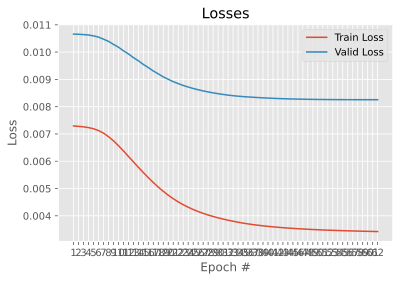

In [ ]:
#1
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

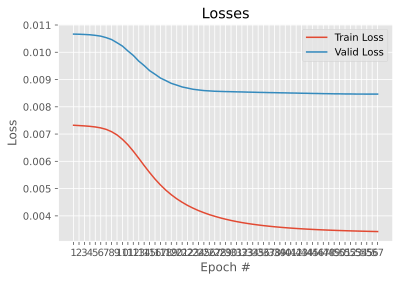

In [ ]:
#2
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

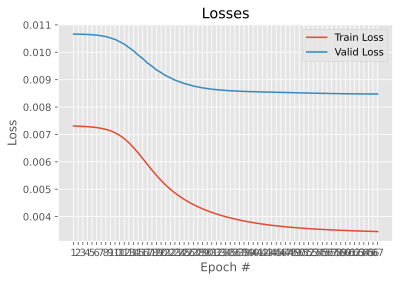

In [ ]:
#3
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

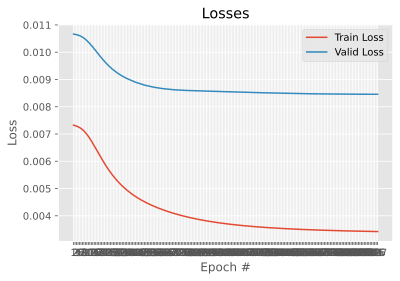

In [ ]:
#4
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

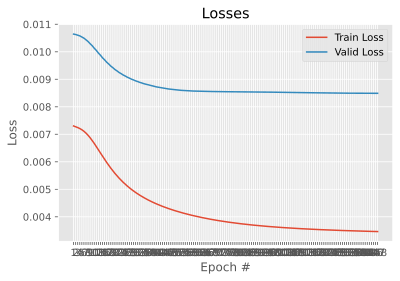

In [ ]:
#5
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

In [ ]:
#1
bow_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []
input_type = 'bow'

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = bow
        probs = bow_model(inputs)
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        57
           1       0.79      0.71      0.75        73

    accuracy                           0.73       130
   macro avg       0.73      0.73      0.73       130
weighted avg       0.74      0.73      0.73       130



In [ ]:
#2
bow_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []
input_type = 'bow'

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = bow
        probs = bow_model(inputs)
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.81      0.71        52
           1       0.84      0.69      0.76        78

    accuracy                           0.74       130
   macro avg       0.74      0.75      0.74       130
weighted avg       0.76      0.74      0.74       130



In [ ]:
#3
bow_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []
input_type = 'bow'

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = bow
        probs = bow_model(inputs)
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71        53
           1       0.83      0.69      0.75        77

    accuracy                           0.73       130
   macro avg       0.73      0.74      0.73       130
weighted avg       0.75      0.73      0.73       130



In [ ]:
#4
bow_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []
input_type = 'bow'

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = bow
        probs = bow_model(inputs)
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.82      0.71        50
           1       0.86      0.69      0.76        80

    accuracy                           0.74       130
   macro avg       0.74      0.75      0.74       130
weighted avg       0.77      0.74      0.74       130



In [ ]:
#5
bow_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []
input_type = 'bow'

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = bow
        probs = bow_model(inputs)
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        53
           1       0.84      0.70      0.77        77

    accuracy                           0.75       130
   macro avg       0.75      0.76      0.74       130
weighted avg       0.77      0.75      0.75       130



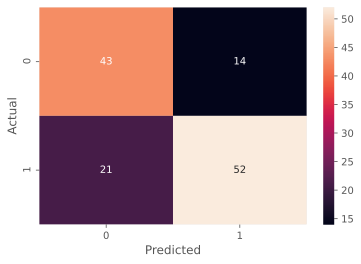

In [ ]:
#1
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

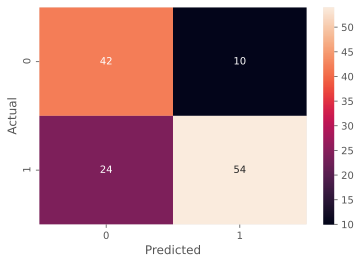

In [ ]:
#2
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

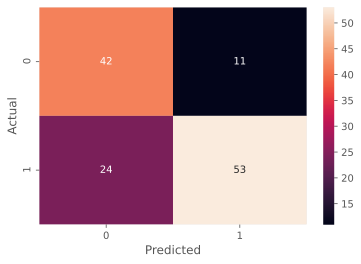

In [ ]:
#3
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

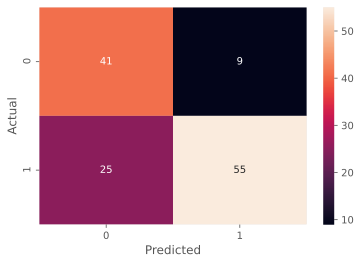

In [ ]:
#4
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

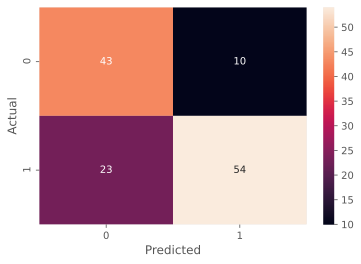

In [ ]:
#5
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
flatten = lambda x: [sublst for lst in x for sublst in lst]
seq_lst, bow_lst, tfidf_lst, target_lst, text_lst = zip(*test_loader)
seq_lst, bow_lst, tfidf_lst, target_lst, text_lst = map(flatten, [seq_lst, bow_lst, tfidf_lst, target_lst, text_lst])
test_examples = list(zip(seq_lst, bow_lst, tfidf_lst, target_lst, text_lst))

def print_random_prediction(model, n=5, input_type='bow'):
    to_emoji = lambda x: '😄' if x else '😡'
    model.eval()
    rows = []
    for i in range(n):
        with torch.no_grad():
            seq, bow, tdidf, target, text = random.choice(test_examples)
            target = target.item()
            
            inputs = bow
            if input_type == 'tdidf':
                inputs = tfidf

            probs = model([inputs])
            probs = probs.detach().cpu().numpy()
            prediction = np.argmax(probs, axis=1)[0]

            predicted = to_emoji(prediction)
            actual = to_emoji(target)
            
            row = f"""
            <tr>
            <td>{i+1}&nbsp;</td>
            <td>{text}&nbsp;</td>
            <td>{predicted}&nbsp;</td>
            <td>{actual}&nbsp;</td>
            </tr>
            """
            rows.append(row)
            
    rows_joined = '\n'.join(rows)
    table = f"""
    <table>
    <tbody>
    <tr>
    <td><b>Number</b>&nbsp;</td>
    <td><b>Review</b>&nbsp;</td>
    <td><b>Predicted</b>&nbsp;</td>
    <td><b>Actual</b>&nbsp;</td>
    </tr>{rows_joined}
    </tbody>
    </table>
    """
    display(HTML(table))

In [ ]:
#1 TEST
print_random_prediction(bow_model, n=5, input_type='bow')

In [ ]:
#2 TEST
print_random_prediction(bow_model, n=5, input_type='bow')

In [ ]:
#3 TEST
print_random_prediction(bow_model, n=5, input_type='bow')

In [ ]:
#4 TEST
print_random_prediction(bow_model, n=5, input_type='bow')

In [ ]:
#5 TEST
print_random_prediction(bow_model, n=5, input_type='bow')

In [ ]:
#################################################################################

In [ ]:
#################################################################################

In [ ]:
######5e - 5 = 5*10^-5

In [ ]:
#1
BATCH_SIZE = 100

In [ ]:
#2
BATCH_SIZE = 100

In [ ]:
#3
BATCH_SIZE = 100

In [ ]:
#4
BATCH_SIZE = 128

In [ ]:
#5
BATCH_SIZE = 128

In [ ]:
#1
HIDDEN1 = 200
HIDDEN2 = 100

In [ ]:
#2
HIDDEN1 = 200
HIDDEN2 = 100

In [ ]:
#3
HIDDEN1 = 100


In [ ]:
#4
HIDDEN1 = 100


In [ ]:
#5
HIDDEN1 = 100


In [ ]:
#1
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, hidden2, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu_2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        out = F.relu(self.fc2(out))
        out = self.relu_2(out)
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#2
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, hidden2, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu_2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        out = F.relu(self.fc2(out))
        out = self.relu_2(out)
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#3
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.Tanh()
        self.fc3 = nn.Linear(hidden1, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#4
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.SiLU()
        self.fc3 = nn.Linear(hidden1, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#5
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.relu_1 = nn.ReLU()
        self.fc3 = nn.Linear(hidden1, num_labels)
    
    def forward(self, out):
        batch_size = len(out)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        out = torch.FloatTensor(out)
        out = F.relu(self.fc1(out))
        out = self.relu_1(out)
        
        logits = torch.sigmoid(self.fc3(out))
        
        return logits

In [ ]:
#1
tfidf_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    hidden2=HIDDEN2,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
tfidf_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=100, bias=True)
  (relu_1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu_2): ReLU()
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [ ]:
#2
tfidf_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    hidden2=HIDDEN2,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
tfidf_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=200, bias=True)
  (relu_1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (relu_2): ReLU()
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
#3
tfidf_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
tfidf_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=100, bias=True)
  (relu_1): Tanh()
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
#4
tfidf_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
tfidf_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=100, bias=True)
  (relu_1): SiLU()
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
#5
tfidf_model = FeedfowardTextClassifier(
    vocab_size=len(dataset.token2idx),
    hidden1=HIDDEN1,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
tfidf_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=2378, out_features=100, bias=True)
  (relu_1): ReLU()
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
#1
LEARNING_RATE = 5e-5


In [ ]:
#2
LEARNING_RATE = 5e-5

In [ ]:
#3
LEARNING_RATE = 5e-5

In [ ]:
#4
LEARNING_RATE = 5e-5

In [ ]:
#5
LEARNING_RATE = 5e-5

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, tfidf_model.parameters()),
    lr=LEARNING_RATE,
)
scheduler = CosineAnnealingLR(optimizer, 1)

In [ ]:
#1
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(tfidf_model, optimizer, train_loader, input_type='tfidf')
    valid_loss = validate_epoch(tfidf_model, valid_loader, input_type='tfidf')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1




100%|█████████▉| 399219/400000 [40:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:51<00:00, 8250.32it/s]

epoch #  1	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  2	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  3	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [40:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:51<00:00, 10129.52it/s]



epoch #  4	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  5	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  6	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:51<00:00, 8250.32it/s]

epoch #  7	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  8	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  9	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:51<00:00, 8250.32it/s]

epoch # 10	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 11	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 12	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]


                                                          

epoch # 13	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 14	train_loss: 5.97e-03	valid_loss: 1.07e-02





100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:52<00:00, 10129.52it/s]



epoch # 15	train_loss: 5.97e-03	valid_loss: 1.06e-02

epoch # 16	train_loss: 5.97e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:52<00:00, 8250.32it/s]

epoch # 17	train_loss: 5.97e-03	valid_loss: 1.06e-02

epoch # 18	train_loss: 5.97e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]






epoch # 19	train_loss: 5.97e-03	valid_loss: 1.06e-02

epoch # 20	train_loss: 5.97e-03	valid_loss: 1.06e-02



100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:53<00:00, 8250.32it/s]

epoch # 21	train_loss: 5.97e-03	valid_loss: 1.06e-02

epoch # 22	train_loss: 5.97e-03	valid_loss: 1.06e-02

epoch # 23	train_loss: 5.97e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:53<00:00, 8250.32it/s]

epoch # 24	train_loss: 5.97e-03	valid_loss: 1.06e-02

epoch # 25	train_loss: 5.97e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:54<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [44:17<00:00, 28643.49it/s]

epoch # 26	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 27	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 28	train_loss: 5.96e-03	valid_loss: 1.06e-02




100%|█████████▉| 399219/400000 [40:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:54<00:00, 10129.52it/s]




                                                           

epoch # 29	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 30	train_loss: 5.96e-03	valid_loss: 1.06e-02



100%|█████████▉| 399219/400000 [40:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:54<00:00, 8250.32it/s]

epoch # 31	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 32	train_loss: 5.96e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:54<00:00, 10129.52it/s]






epoch # 33	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 34	train_loss: 5.96e-03	valid_loss: 1.06e-02



100%|█████████▉| 399219/400000 [40:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:54<00:00, 8250.32it/s]

epoch # 35	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 36	train_loss: 5.96e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:54<00:00, 8250.32it/s]

epoch # 37	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 38	train_loss: 5.96e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:54<00:00, 8250.32it/s]

epoch # 39	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 40	train_loss: 5.95e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:55<00:00, 8250.32it/s]

epoch # 41	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 42	train_loss: 5.95e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:55<00:00, 8250.32it/s]

epoch # 43	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 44	train_loss: 5.95e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:55<00:00, 8250.32it/s]

epoch # 45	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 46	train_loss: 5.95e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:55<00:00, 8250.32it/s]

epoch # 47	train_loss: 5.94e-03	valid_loss: 1.06e-02

epoch # 48	train_loss: 5.94e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:56<00:00, 8250.32it/s]

epoch # 49	train_loss: 5.94e-03	valid_loss: 1.06e-02

epoch # 50	train_loss: 5.94e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:56<00:00, 8250.32it/s]

epoch # 51	train_loss: 5.94e-03	valid_loss: 1.06e-02

epoch # 52	train_loss: 5.94e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:56<00:00, 8250.32it/s]

epoch # 53	train_loss: 5.93e-03	valid_loss: 1.06e-02

epoch # 54	train_loss: 5.93e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]




epoch # 55	train_loss: 5.93e-03	valid_loss: 1.06e-02

epoch # 56	train_loss: 5.93e-03	valid_loss: 1.06e-02





100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:56<00:00, 8250.32it/s]

epoch # 57	train_loss: 5.93e-03	valid_loss: 1.06e-02

epoch # 58	train_loss: 5.92e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:57<00:00, 8250.32it/s]

epoch # 59	train_loss: 5.92e-03	valid_loss: 1.06e-02

epoch # 60	train_loss: 5.92e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:57<00:00, 8250.32it/s]

epoch # 61	train_loss: 5.92e-03	valid_loss: 1.06e-02

epoch # 62	train_loss: 5.91e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:57<00:00, 8250.32it/s]

epoch # 63	train_loss: 5.91e-03	valid_loss: 1.06e-02

epoch # 64	train_loss: 5.91e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [40:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:57<00:00, 8250.32it/s]

epoch # 65	train_loss: 5.91e-03	valid_loss: 1.06e-02

epoch # 66	train_loss: 5.90e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [40:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:58<00:00, 10129.52it/s]

epoch # 67	train_loss: 5.90e-03	valid_loss: 1.05e-02

epoch # 68	train_loss: 5.90e-03	valid_loss: 1.05e-02

epoch # 69	train_loss: 5.89e-03	valid_loss: 1.05e-02








100%|█████████▉| 399219/400000 [40:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:58<00:00, 8250.32it/s]

epoch # 70	train_loss: 5.89e-03	valid_loss: 1.05e-02

epoch # 71	train_loss: 5.89e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [40:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:58<00:00, 8250.32it/s]

epoch # 72	train_loss: 5.88e-03	valid_loss: 1.05e-02

epoch # 73	train_loss: 5.88e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [40:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:58<00:00, 8250.32it/s]

epoch # 74	train_loss: 5.88e-03	valid_loss: 1.05e-02

epoch # 75	train_loss: 5.87e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [40:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:58<00:00, 8250.32it/s]

epoch # 76	train_loss: 5.87e-03	valid_loss: 1.05e-02

epoch # 77	train_loss: 5.87e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [40:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:59<00:00, 10129.52it/s]



epoch # 78	train_loss: 5.86e-03	valid_loss: 1.05e-02

epoch # 79	train_loss: 5.86e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [40:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [40:59<00:00, 10129.52it/s]




epoch # 80	train_loss: 5.85e-03	valid_loss: 1.05e-02

epoch # 81	train_loss: 5.85e-03	valid_loss: 1.05e-02





100%|█████████▉| 399219/400000 [41:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [31:59<00:00, 8250.32it/s]

epoch # 82	train_loss: 5.85e-03	valid_loss: 1.05e-02

epoch # 83	train_loss: 5.84e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [41:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:00<00:00, 10129.52it/s]



epoch # 84	train_loss: 5.84e-03	valid_loss: 1.05e-02

epoch # 85	train_loss: 5.83e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [41:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:00<00:00, 8250.32it/s]

epoch # 86	train_loss: 5.83e-03	valid_loss: 1.04e-02

epoch # 87	train_loss: 5.82e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [41:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:00<00:00, 8250.32it/s]

epoch # 88	train_loss: 5.82e-03	valid_loss: 1.04e-02

epoch # 89	train_loss: 5.82e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [41:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:00<00:00, 8250.32it/s]

epoch # 90	train_loss: 5.81e-03	valid_loss: 1.04e-02

epoch # 91	train_loss: 5.81e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [41:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:00<00:00, 8250.32it/s]

epoch # 92	train_loss: 5.80e-03	valid_loss: 1.04e-02

epoch # 93	train_loss: 5.80e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [41:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:00<00:00, 8250.32it/s]

epoch # 94	train_loss: 5.79e-03	valid_loss: 1.04e-02

epoch # 95	train_loss: 5.79e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [41:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:01<00:00, 10129.52it/s]




                                                           

epoch # 96	train_loss: 5.78e-03	valid_loss: 1.04e-02

epoch # 97	train_loss: 5.78e-03	valid_loss: 1.04e-02



100%|█████████▉| 399219/400000 [41:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:01<00:00, 8250.32it/s]

epoch # 98	train_loss: 5.77e-03	valid_loss: 1.04e-02

epoch # 99	train_loss: 5.77e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [41:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:01<00:00, 8250.32it/s]

epoch #100	train_loss: 5.76e-03	valid_loss: 1.04e-02

epoch #101	train_loss: 5.75e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [41:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:01<00:00, 8250.32it/s]

epoch #102	train_loss: 5.75e-03	valid_loss: 1.03e-02

epoch #103	train_loss: 5.74e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [41:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:02<00:00, 8250.32it/s]

epoch #104	train_loss: 5.74e-03	valid_loss: 1.03e-02

epoch #105	train_loss: 5.73e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [41:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:02<00:00, 8250.32it/s]

epoch #106	train_loss: 5.73e-03	valid_loss: 1.03e-02

epoch #107	train_loss: 5.72e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [41:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:02<00:00, 8250.32it/s]

epoch #108	train_loss: 5.71e-03	valid_loss: 1.03e-02

epoch #109	train_loss: 5.71e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [41:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:02<00:00, 8250.32it/s]

epoch #110	train_loss: 5.70e-03	valid_loss: 1.03e-02

epoch #111	train_loss: 5.69e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [41:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:02<00:00, 8250.32it/s]

epoch #112	train_loss: 5.69e-03	valid_loss: 1.03e-02

epoch #113	train_loss: 5.68e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [41:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:03<00:00, 8250.32it/s]

epoch #114	train_loss: 5.68e-03	valid_loss: 1.02e-02

epoch #115	train_loss: 5.67e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [41:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:03<00:00, 8250.32it/s]

epoch #116	train_loss: 5.66e-03	valid_loss: 1.02e-02

epoch #117	train_loss: 5.66e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]

                                                          

epoch #118	train_loss: 5.65e-03	valid_loss: 1.02e-02

epoch #119	train_loss: 5.64e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:03<00:00, 8250.32it/s]

epoch #120	train_loss: 5.64e-03	valid_loss: 1.02e-02

epoch #121	train_loss: 5.63e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:04<00:00, 8250.32it/s]

epoch #122	train_loss: 5.62e-03	valid_loss: 1.02e-02

epoch #123	train_loss: 5.61e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:04<00:00, 8250.32it/s]

epoch #124	train_loss: 5.61e-03	valid_loss: 1.01e-02

epoch #125	train_loss: 5.60e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:04<00:00, 8250.32it/s]

epoch #126	train_loss: 5.59e-03	valid_loss: 1.01e-02

epoch #127	train_loss: 5.59e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [41:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:04<00:00, 8250.32it/s]

epoch #128	train_loss: 5.58e-03	valid_loss: 1.01e-02

epoch #129	train_loss: 5.57e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [41:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:04<00:00, 8250.32it/s]

epoch #130	train_loss: 5.56e-03	valid_loss: 1.01e-02

epoch #131	train_loss: 5.55e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [41:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:05<00:00, 8250.32it/s]

epoch #132	train_loss: 5.55e-03	valid_loss: 1.01e-02

epoch #133	train_loss: 5.54e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [41:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:05<00:00, 8250.32it/s]

epoch #134	train_loss: 5.53e-03	valid_loss: 1.00e-02

epoch #135	train_loss: 5.52e-03	valid_loss: 1.00e-02






100%|█████████▉| 399219/400000 [41:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:05<00:00, 8250.32it/s]

epoch #136	train_loss: 5.51e-03	valid_loss: 1.00e-02

epoch #137	train_loss: 5.51e-03	valid_loss: 1.00e-02






100%|█████████▉| 399219/400000 [41:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:05<00:00, 8250.32it/s]

epoch #138	train_loss: 5.50e-03	valid_loss: 1.00e-02

epoch #139	train_loss: 5.49e-03	valid_loss: 9.99e-03






100%|█████████▉| 399219/400000 [41:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:06<00:00, 8250.32it/s]

epoch #140	train_loss: 5.48e-03	valid_loss: 9.98e-03

epoch #141	train_loss: 5.47e-03	valid_loss: 9.97e-03






100%|█████████▉| 399219/400000 [41:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:06<00:00, 8250.32it/s]

epoch #142	train_loss: 5.46e-03	valid_loss: 9.96e-03

epoch #143	train_loss: 5.45e-03	valid_loss: 9.95e-03






100%|█████████▉| 399219/400000 [41:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:06<00:00, 8250.32it/s]

epoch #144	train_loss: 5.44e-03	valid_loss: 9.94e-03

epoch #145	train_loss: 5.44e-03	valid_loss: 9.93e-03






100%|█████████▉| 399219/400000 [41:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:06<00:00, 8250.32it/s]

epoch #146	train_loss: 5.43e-03	valid_loss: 9.92e-03

epoch #147	train_loss: 5.42e-03	valid_loss: 9.90e-03






100%|█████████▉| 399219/400000 [41:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:06<00:00, 8250.32it/s]

epoch #148	train_loss: 5.41e-03	valid_loss: 9.89e-03

epoch #149	train_loss: 5.40e-03	valid_loss: 9.88e-03






100%|█████████▉| 399219/400000 [41:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:07<00:00, 8250.32it/s]

epoch #150	train_loss: 5.39e-03	valid_loss: 9.87e-03

epoch #151	train_loss: 5.38e-03	valid_loss: 9.86e-03






100%|█████████▉| 399219/400000 [41:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:07<00:00, 8250.32it/s]

epoch #152	train_loss: 5.37e-03	valid_loss: 9.85e-03

epoch #153	train_loss: 5.36e-03	valid_loss: 9.83e-03






100%|█████████▉| 399219/400000 [41:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:07<00:00, 8250.32it/s]

epoch #154	train_loss: 5.35e-03	valid_loss: 9.82e-03

epoch #155	train_loss: 5.34e-03	valid_loss: 9.81e-03






100%|█████████▉| 399219/400000 [41:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:07<00:00, 8250.32it/s]

epoch #156	train_loss: 5.33e-03	valid_loss: 9.80e-03

epoch #157	train_loss: 5.32e-03	valid_loss: 9.78e-03






100%|█████████▉| 399219/400000 [41:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:08<00:00, 8250.32it/s]

epoch #158	train_loss: 5.31e-03	valid_loss: 9.77e-03

epoch #159	train_loss: 5.30e-03	valid_loss: 9.76e-03






100%|█████████▉| 399219/400000 [41:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:08<00:00, 8250.32it/s]

epoch #160	train_loss: 5.29e-03	valid_loss: 9.75e-03

epoch #161	train_loss: 5.28e-03	valid_loss: 9.74e-03






100%|█████████▉| 399219/400000 [41:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:08<00:00, 8250.32it/s]

epoch #162	train_loss: 5.27e-03	valid_loss: 9.72e-03

epoch #163	train_loss: 5.26e-03	valid_loss: 9.71e-03






100%|█████████▉| 399219/400000 [41:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:08<00:00, 8250.32it/s]

epoch #164	train_loss: 5.25e-03	valid_loss: 9.70e-03

epoch #165	train_loss: 5.24e-03	valid_loss: 9.69e-03






100%|█████████▉| 399219/400000 [41:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:09<00:00, 8250.32it/s]

epoch #166	train_loss: 5.23e-03	valid_loss: 9.67e-03

epoch #167	train_loss: 5.22e-03	valid_loss: 9.66e-03






100%|█████████▉| 399219/400000 [41:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:09<00:00, 8250.32it/s]

epoch #168	train_loss: 5.21e-03	valid_loss: 9.65e-03

epoch #169	train_loss: 5.20e-03	valid_loss: 9.64e-03






100%|█████████▉| 399219/400000 [41:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:09<00:00, 8250.32it/s]

epoch #170	train_loss: 5.19e-03	valid_loss: 9.62e-03

epoch #171	train_loss: 5.18e-03	valid_loss: 9.61e-03






100%|█████████▉| 399219/400000 [41:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:09<00:00, 8250.32it/s]

epoch #172	train_loss: 5.17e-03	valid_loss: 9.60e-03

epoch #173	train_loss: 5.16e-03	valid_loss: 9.58e-03






100%|█████████▉| 399219/400000 [41:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:10<00:00, 8250.32it/s]

epoch #174	train_loss: 5.14e-03	valid_loss: 9.57e-03

epoch #175	train_loss: 5.13e-03	valid_loss: 9.56e-03






100%|█████████▉| 399219/400000 [41:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:10<00:00, 8250.32it/s]

epoch #176	train_loss: 5.12e-03	valid_loss: 9.55e-03

epoch #177	train_loss: 5.11e-03	valid_loss: 9.53e-03






100%|█████████▉| 399219/400000 [41:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:10<00:00, 8250.32it/s]

epoch #178	train_loss: 5.10e-03	valid_loss: 9.52e-03

epoch #179	train_loss: 5.09e-03	valid_loss: 9.51e-03






100%|█████████▉| 399219/400000 [41:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:10<00:00, 8250.32it/s]

epoch #180	train_loss: 5.08e-03	valid_loss: 9.50e-03

epoch #181	train_loss: 5.07e-03	valid_loss: 9.48e-03






100%|█████████▉| 399219/400000 [41:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:11<00:00, 8250.32it/s]

epoch #182	train_loss: 5.06e-03	valid_loss: 9.47e-03

epoch #183	train_loss: 5.05e-03	valid_loss: 9.45e-03






100%|█████████▉| 399219/400000 [41:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:11<00:00, 8250.32it/s]

epoch #184	train_loss: 5.04e-03	valid_loss: 9.44e-03

epoch #185	train_loss: 5.02e-03	valid_loss: 9.43e-03






100%|█████████▉| 399219/400000 [41:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:11<00:00, 8250.32it/s]

epoch #186	train_loss: 5.01e-03	valid_loss: 9.41e-03

epoch #187	train_loss: 5.00e-03	valid_loss: 9.40e-03






100%|█████████▉| 399219/400000 [41:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:11<00:00, 8250.32it/s]

epoch #188	train_loss: 4.99e-03	valid_loss: 9.38e-03

epoch #189	train_loss: 4.98e-03	valid_loss: 9.37e-03






100%|█████████▉| 399219/400000 [41:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:12<00:00, 8250.32it/s]

epoch #190	train_loss: 4.96e-03	valid_loss: 9.36e-03

epoch #191	train_loss: 4.95e-03	valid_loss: 9.34e-03






100%|█████████▉| 399219/400000 [41:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:12<00:00, 8250.32it/s]

epoch #192	train_loss: 4.94e-03	valid_loss: 9.33e-03

epoch #193	train_loss: 4.93e-03	valid_loss: 9.31e-03






100%|█████████▉| 399219/400000 [41:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:12<00:00, 8250.32it/s]

epoch #194	train_loss: 4.92e-03	valid_loss: 9.30e-03

epoch #195	train_loss: 4.91e-03	valid_loss: 9.29e-03






100%|█████████▉| 399219/400000 [41:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:12<00:00, 8250.32it/s]

epoch #196	train_loss: 4.89e-03	valid_loss: 9.28e-03

epoch #197	train_loss: 4.88e-03	valid_loss: 9.26e-03






100%|█████████▉| 399219/400000 [41:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:12<00:00, 8250.32it/s]

epoch #198	train_loss: 4.87e-03	valid_loss: 9.25e-03

epoch #199	train_loss: 4.86e-03	valid_loss: 9.23e-03






100%|█████████▉| 399219/400000 [41:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:13<00:00, 8250.32it/s]

epoch #200	train_loss: 4.84e-03	valid_loss: 9.22e-03

epoch #201	train_loss: 4.83e-03	valid_loss: 9.20e-03






100%|█████████▉| 399219/400000 [41:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:13<00:00, 8250.32it/s]

epoch #202	train_loss: 4.82e-03	valid_loss: 9.19e-03

epoch #203	train_loss: 4.81e-03	valid_loss: 9.18e-03






100%|█████████▉| 399219/400000 [41:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:13<00:00, 8250.32it/s]

epoch #204	train_loss: 4.80e-03	valid_loss: 9.16e-03

epoch #205	train_loss: 4.78e-03	valid_loss: 9.15e-03






100%|█████████▉| 399219/400000 [41:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:13<00:00, 8250.32it/s]

epoch #206	train_loss: 4.77e-03	valid_loss: 9.13e-03

epoch #207	train_loss: 4.76e-03	valid_loss: 9.12e-03






100%|█████████▉| 399219/400000 [41:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:14<00:00, 8250.32it/s]

epoch #208	train_loss: 4.75e-03	valid_loss: 9.11e-03

epoch #209	train_loss: 4.73e-03	valid_loss: 9.09e-03






100%|█████████▉| 399219/400000 [41:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:14<00:00, 8250.32it/s]

epoch #210	train_loss: 4.72e-03	valid_loss: 9.08e-03

epoch #211	train_loss: 4.71e-03	valid_loss: 9.06e-03






100%|█████████▉| 399219/400000 [41:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:14<00:00, 8250.32it/s]

epoch #212	train_loss: 4.70e-03	valid_loss: 9.05e-03

epoch #213	train_loss: 4.69e-03	valid_loss: 9.04e-03






100%|█████████▉| 399219/400000 [41:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:14<00:00, 8250.32it/s]

epoch #214	train_loss: 4.67e-03	valid_loss: 9.02e-03

epoch #215	train_loss: 4.66e-03	valid_loss: 9.01e-03






100%|█████████▉| 399219/400000 [41:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:15<00:00, 8250.32it/s]

epoch #216	train_loss: 4.65e-03	valid_loss: 9.00e-03

epoch #217	train_loss: 4.64e-03	valid_loss: 8.98e-03






100%|█████████▉| 399219/400000 [41:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:15<00:00, 8250.32it/s]

epoch #218	train_loss: 4.63e-03	valid_loss: 8.97e-03

epoch #219	train_loss: 4.62e-03	valid_loss: 8.96e-03






100%|█████████▉| 399219/400000 [41:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:15<00:00, 8250.32it/s]

epoch #220	train_loss: 4.60e-03	valid_loss: 8.94e-03

epoch #221	train_loss: 4.59e-03	valid_loss: 8.93e-03






100%|█████████▉| 399219/400000 [41:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:15<00:00, 8250.32it/s]

epoch #222	train_loss: 4.58e-03	valid_loss: 8.92e-03

epoch #223	train_loss: 4.57e-03	valid_loss: 8.90e-03






100%|█████████▉| 399219/400000 [41:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:15<00:00, 8250.32it/s]

epoch #224	train_loss: 4.56e-03	valid_loss: 8.89e-03

epoch #225	train_loss: 4.55e-03	valid_loss: 8.88e-03






100%|█████████▉| 399219/400000 [41:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:16<00:00, 8250.32it/s]

epoch #226	train_loss: 4.53e-03	valid_loss: 8.87e-03

epoch #227	train_loss: 4.52e-03	valid_loss: 8.85e-03






100%|█████████▉| 399219/400000 [41:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:16<00:00, 8250.32it/s]

epoch #228	train_loss: 4.51e-03	valid_loss: 8.84e-03

epoch #229	train_loss: 4.50e-03	valid_loss: 8.83e-03






100%|█████████▉| 399219/400000 [41:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:16<00:00, 8250.32it/s]

epoch #230	train_loss: 4.49e-03	valid_loss: 8.82e-03

epoch #231	train_loss: 4.48e-03	valid_loss: 8.80e-03






100%|█████████▉| 399219/400000 [41:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:16<00:00, 8250.32it/s]

epoch #232	train_loss: 4.47e-03	valid_loss: 8.79e-03

epoch #233	train_loss: 4.45e-03	valid_loss: 8.78e-03






100%|█████████▉| 399219/400000 [41:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:17<00:00, 8250.32it/s]

epoch #234	train_loss: 4.44e-03	valid_loss: 8.77e-03

epoch #235	train_loss: 4.43e-03	valid_loss: 8.76e-03






100%|█████████▉| 399219/400000 [41:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:17<00:00, 8250.32it/s]

epoch #236	train_loss: 4.42e-03	valid_loss: 8.75e-03

epoch #237	train_loss: 4.41e-03	valid_loss: 8.73e-03






100%|█████████▉| 399219/400000 [41:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:17<00:00, 8250.32it/s]

epoch #238	train_loss: 4.40e-03	valid_loss: 8.72e-03

epoch #239	train_loss: 4.39e-03	valid_loss: 8.71e-03






100%|█████████▉| 399219/400000 [41:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:17<00:00, 8250.32it/s]

epoch #240	train_loss: 4.38e-03	valid_loss: 8.70e-03

epoch #241	train_loss: 4.37e-03	valid_loss: 8.69e-03






100%|█████████▉| 399219/400000 [41:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:18<00:00, 8250.32it/s]

epoch #242	train_loss: 4.36e-03	valid_loss: 8.68e-03

epoch #243	train_loss: 4.35e-03	valid_loss: 8.66e-03






100%|█████████▉| 399219/400000 [41:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:18<00:00, 8250.32it/s]

epoch #244	train_loss: 4.34e-03	valid_loss: 8.65e-03

epoch #245	train_loss: 4.32e-03	valid_loss: 8.64e-03






100%|█████████▉| 399219/400000 [41:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:18<00:00, 8250.32it/s]

epoch #246	train_loss: 4.31e-03	valid_loss: 8.63e-03

epoch #247	train_loss: 4.30e-03	valid_loss: 8.62e-03






100%|█████████▉| 399219/400000 [41:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:18<00:00, 8250.32it/s]

epoch #248	train_loss: 4.29e-03	valid_loss: 8.61e-03

epoch #249	train_loss: 4.28e-03	valid_loss: 8.60e-03






100%|█████████▉| 399219/400000 [41:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:18<00:00, 8250.32it/s]

epoch #250	train_loss: 4.27e-03	valid_loss: 8.59e-03

epoch #251	train_loss: 4.26e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [41:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:19<00:00, 8250.32it/s]

epoch #252	train_loss: 4.25e-03	valid_loss: 8.57e-03

epoch #253	train_loss: 4.24e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [41:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:19<00:00, 8250.32it/s]

epoch #254	train_loss: 4.23e-03	valid_loss: 8.55e-03

epoch #255	train_loss: 4.22e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [41:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:19<00:00, 8250.32it/s]

epoch #256	train_loss: 4.21e-03	valid_loss: 8.53e-03

epoch #257	train_loss: 4.20e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [41:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:19<00:00, 8250.32it/s]

epoch #258	train_loss: 4.19e-03	valid_loss: 8.51e-03

epoch #259	train_loss: 4.18e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [41:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:20<00:00, 8250.32it/s]

epoch #260	train_loss: 4.17e-03	valid_loss: 8.49e-03

epoch #261	train_loss: 4.16e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [41:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:20<00:00, 8250.32it/s]

epoch #262	train_loss: 4.15e-03	valid_loss: 8.47e-03

epoch #263	train_loss: 4.14e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [41:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:20<00:00, 8250.32it/s]

epoch #264	train_loss: 4.14e-03	valid_loss: 8.45e-03

epoch #265	train_loss: 4.13e-03	valid_loss: 8.44e-03






100%|█████████▉| 399219/400000 [41:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:20<00:00, 8250.32it/s]

epoch #266	train_loss: 4.12e-03	valid_loss: 8.43e-03

epoch #267	train_loss: 4.11e-03	valid_loss: 8.42e-03






100%|█████████▉| 399219/400000 [41:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:21<00:00, 8250.32it/s]

epoch #268	train_loss: 4.10e-03	valid_loss: 8.41e-03

epoch #269	train_loss: 4.09e-03	valid_loss: 8.40e-03






100%|█████████▉| 399219/400000 [41:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:21<00:00, 8250.32it/s]

epoch #270	train_loss: 4.08e-03	valid_loss: 8.39e-03

epoch #271	train_loss: 4.07e-03	valid_loss: 8.38e-03






100%|█████████▉| 399219/400000 [41:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:21<00:00, 8250.32it/s]

epoch #272	train_loss: 4.06e-03	valid_loss: 8.37e-03

epoch #273	train_loss: 4.05e-03	valid_loss: 8.36e-03






100%|█████████▉| 399219/400000 [41:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:21<00:00, 8250.32it/s]

epoch #274	train_loss: 4.04e-03	valid_loss: 8.36e-03

epoch #275	train_loss: 4.04e-03	valid_loss: 8.35e-03






100%|█████████▉| 399219/400000 [41:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:22<00:00, 8250.32it/s]

epoch #276	train_loss: 4.03e-03	valid_loss: 8.34e-03

epoch #277	train_loss: 4.02e-03	valid_loss: 8.33e-03






100%|█████████▉| 399219/400000 [41:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:22<00:00, 8250.32it/s]

epoch #278	train_loss: 4.01e-03	valid_loss: 8.32e-03

epoch #279	train_loss: 4.00e-03	valid_loss: 8.31e-03






100%|█████████▉| 399219/400000 [41:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:22<00:00, 8250.32it/s]

epoch #280	train_loss: 3.99e-03	valid_loss: 8.30e-03

epoch #281	train_loss: 3.98e-03	valid_loss: 8.30e-03






100%|█████████▉| 399219/400000 [41:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:22<00:00, 8250.32it/s]

epoch #282	train_loss: 3.98e-03	valid_loss: 8.29e-03

epoch #283	train_loss: 3.97e-03	valid_loss: 8.28e-03






100%|█████████▉| 399219/400000 [41:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:23<00:00, 8250.32it/s]

epoch #284	train_loss: 3.96e-03	valid_loss: 8.27e-03

epoch #285	train_loss: 3.95e-03	valid_loss: 8.26e-03






100%|█████████▉| 399219/400000 [41:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:23<00:00, 8250.32it/s]

epoch #286	train_loss: 3.94e-03	valid_loss: 8.26e-03

epoch #287	train_loss: 3.94e-03	valid_loss: 8.25e-03






100%|█████████▉| 399219/400000 [41:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:23<00:00, 8250.32it/s]

epoch #288	train_loss: 3.93e-03	valid_loss: 8.24e-03

epoch #289	train_loss: 3.92e-03	valid_loss: 8.23e-03






100%|█████████▉| 399219/400000 [41:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:23<00:00, 8250.32it/s]

epoch #290	train_loss: 3.91e-03	valid_loss: 8.23e-03

epoch #291	train_loss: 3.90e-03	valid_loss: 8.22e-03






100%|█████████▉| 399219/400000 [41:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:23<00:00, 8250.32it/s]

epoch #292	train_loss: 3.90e-03	valid_loss: 8.21e-03

epoch #293	train_loss: 3.89e-03	valid_loss: 8.20e-03






100%|█████████▉| 399219/400000 [41:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:24<00:00, 8250.32it/s]

epoch #294	train_loss: 3.88e-03	valid_loss: 8.20e-03

epoch #295	train_loss: 3.87e-03	valid_loss: 8.19e-03






100%|█████████▉| 399219/400000 [41:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:24<00:00, 8250.32it/s]

epoch #296	train_loss: 3.87e-03	valid_loss: 8.18e-03

epoch #297	train_loss: 3.86e-03	valid_loss: 8.18e-03






100%|█████████▉| 399219/400000 [41:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:24<00:00, 8250.32it/s]

epoch #298	train_loss: 3.85e-03	valid_loss: 8.17e-03

epoch #299	train_loss: 3.84e-03	valid_loss: 8.16e-03






100%|█████████▉| 399219/400000 [41:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:24<00:00, 8250.32it/s]

epoch #300	train_loss: 3.84e-03	valid_loss: 8.16e-03

epoch #301	train_loss: 3.83e-03	valid_loss: 8.15e-03






100%|█████████▉| 399219/400000 [41:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:25<00:00, 8250.32it/s]

epoch #302	train_loss: 3.82e-03	valid_loss: 8.14e-03

epoch #303	train_loss: 3.81e-03	valid_loss: 8.13e-03






100%|█████████▉| 399219/400000 [41:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:25<00:00, 8250.32it/s]

epoch #304	train_loss: 3.81e-03	valid_loss: 8.13e-03

epoch #305	train_loss: 3.80e-03	valid_loss: 8.12e-03






100%|█████████▉| 399219/400000 [41:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:25<00:00, 8250.32it/s]

epoch #306	train_loss: 3.79e-03	valid_loss: 8.12e-03

epoch #307	train_loss: 3.79e-03	valid_loss: 8.11e-03






100%|█████████▉| 399219/400000 [41:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:25<00:00, 8250.32it/s]

epoch #308	train_loss: 3.78e-03	valid_loss: 8.10e-03

epoch #309	train_loss: 3.77e-03	valid_loss: 8.10e-03






100%|█████████▉| 399219/400000 [41:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:26<00:00, 8250.32it/s]

epoch #310	train_loss: 3.77e-03	valid_loss: 8.09e-03

epoch #311	train_loss: 3.76e-03	valid_loss: 8.09e-03






100%|█████████▉| 399219/400000 [41:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:26<00:00, 8250.32it/s]

epoch #312	train_loss: 3.75e-03	valid_loss: 8.08e-03

epoch #313	train_loss: 3.75e-03	valid_loss: 8.07e-03






100%|█████████▉| 399219/400000 [41:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:26<00:00, 8250.32it/s]

epoch #314	train_loss: 3.74e-03	valid_loss: 8.07e-03

epoch #315	train_loss: 3.73e-03	valid_loss: 8.06e-03






100%|█████████▉| 399219/400000 [41:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:26<00:00, 8250.32it/s]

epoch #316	train_loss: 3.73e-03	valid_loss: 8.06e-03

epoch #317	train_loss: 3.72e-03	valid_loss: 8.05e-03






100%|█████████▉| 399219/400000 [41:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:27<00:00, 8250.32it/s]

epoch #318	train_loss: 3.71e-03	valid_loss: 8.05e-03

epoch #319	train_loss: 3.71e-03	valid_loss: 8.04e-03






100%|█████████▉| 399219/400000 [41:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:27<00:00, 8250.32it/s]

epoch #320	train_loss: 3.70e-03	valid_loss: 8.04e-03

epoch #321	train_loss: 3.70e-03	valid_loss: 8.03e-03






100%|█████████▉| 399219/400000 [41:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:27<00:00, 8250.32it/s]

epoch #322	train_loss: 3.69e-03	valid_loss: 8.03e-03

epoch #323	train_loss: 3.68e-03	valid_loss: 8.02e-03






100%|█████████▉| 399219/400000 [41:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:27<00:00, 8250.32it/s]

epoch #324	train_loss: 3.68e-03	valid_loss: 8.02e-03

epoch #325	train_loss: 3.67e-03	valid_loss: 8.01e-03






100%|█████████▉| 399219/400000 [41:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:28<00:00, 8250.32it/s]

epoch #326	train_loss: 3.67e-03	valid_loss: 8.01e-03

epoch #327	train_loss: 3.66e-03	valid_loss: 8.00e-03






100%|█████████▉| 399219/400000 [41:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:28<00:00, 8250.32it/s]

epoch #328	train_loss: 3.65e-03	valid_loss: 8.00e-03

epoch #329	train_loss: 3.65e-03	valid_loss: 7.99e-03






100%|█████████▉| 399219/400000 [41:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:28<00:00, 8250.32it/s]

epoch #330	train_loss: 3.64e-03	valid_loss: 7.99e-03

epoch #331	train_loss: 3.64e-03	valid_loss: 7.98e-03






100%|█████████▉| 399219/400000 [41:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:28<00:00, 8250.32it/s]

epoch #332	train_loss: 3.63e-03	valid_loss: 7.98e-03

epoch #333	train_loss: 3.63e-03	valid_loss: 7.97e-03






100%|█████████▉| 399219/400000 [41:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:29<00:00, 8250.32it/s]

epoch #334	train_loss: 3.62e-03	valid_loss: 7.97e-03

epoch #335	train_loss: 3.61e-03	valid_loss: 7.96e-03






100%|█████████▉| 399219/400000 [41:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:29<00:00, 8250.32it/s]

epoch #336	train_loss: 3.61e-03	valid_loss: 7.96e-03

epoch #337	train_loss: 3.60e-03	valid_loss: 7.95e-03






100%|█████████▉| 399219/400000 [41:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:29<00:00, 8250.32it/s]

epoch #338	train_loss: 3.60e-03	valid_loss: 7.95e-03

epoch #339	train_loss: 3.59e-03	valid_loss: 7.95e-03






100%|█████████▉| 399219/400000 [41:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:29<00:00, 8250.32it/s]

epoch #340	train_loss: 3.59e-03	valid_loss: 7.94e-03

epoch #341	train_loss: 3.58e-03	valid_loss: 7.94e-03






100%|█████████▉| 399219/400000 [41:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:30<00:00, 8250.32it/s]

epoch #342	train_loss: 3.58e-03	valid_loss: 7.93e-03

epoch #343	train_loss: 3.57e-03	valid_loss: 7.93e-03






100%|█████████▉| 399219/400000 [41:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:30<00:00, 8250.32it/s]

epoch #344	train_loss: 3.57e-03	valid_loss: 7.93e-03

epoch #345	train_loss: 3.56e-03	valid_loss: 7.92e-03






100%|█████████▉| 399219/400000 [41:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:30<00:00, 8250.32it/s]

epoch #346	train_loss: 3.56e-03	valid_loss: 7.92e-03

epoch #347	train_loss: 3.55e-03	valid_loss: 7.92e-03






100%|█████████▉| 399219/400000 [41:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:30<00:00, 8250.32it/s]

epoch #348	train_loss: 3.55e-03	valid_loss: 7.91e-03

epoch #349	train_loss: 3.54e-03	valid_loss: 7.91e-03






100%|█████████▉| 399219/400000 [41:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:31<00:00, 8250.32it/s]

epoch #350	train_loss: 3.54e-03	valid_loss: 7.91e-03

epoch #351	train_loss: 3.53e-03	valid_loss: 7.90e-03






100%|█████████▉| 399219/400000 [41:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:31<00:00, 8250.32it/s]

epoch #352	train_loss: 3.53e-03	valid_loss: 7.90e-03

epoch #353	train_loss: 3.52e-03	valid_loss: 7.89e-03






100%|█████████▉| 399219/400000 [41:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:31<00:00, 8250.32it/s]

epoch #354	train_loss: 3.52e-03	valid_loss: 7.89e-03

epoch #355	train_loss: 3.51e-03	valid_loss: 7.89e-03






100%|█████████▉| 399219/400000 [41:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:31<00:00, 8250.32it/s]

epoch #356	train_loss: 3.51e-03	valid_loss: 7.89e-03

epoch #357	train_loss: 3.50e-03	valid_loss: 7.88e-03






100%|█████████▉| 399219/400000 [41:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:32<00:00, 8250.32it/s]

epoch #358	train_loss: 3.50e-03	valid_loss: 7.88e-03

epoch #359	train_loss: 3.49e-03	valid_loss: 7.88e-03






100%|█████████▉| 399219/400000 [41:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:32<00:00, 8250.32it/s]

epoch #360	train_loss: 3.49e-03	valid_loss: 7.87e-03

epoch #361	train_loss: 3.48e-03	valid_loss: 7.87e-03






100%|█████████▉| 399219/400000 [41:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:32<00:00, 8250.32it/s]

epoch #362	train_loss: 3.48e-03	valid_loss: 7.87e-03

epoch #363	train_loss: 3.47e-03	valid_loss: 7.86e-03






100%|█████████▉| 399219/400000 [41:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:32<00:00, 8250.32it/s]

epoch #364	train_loss: 3.47e-03	valid_loss: 7.86e-03

epoch #365	train_loss: 3.47e-03	valid_loss: 7.86e-03






100%|█████████▉| 399219/400000 [41:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:33<00:00, 8250.32it/s]

epoch #366	train_loss: 3.46e-03	valid_loss: 7.86e-03

epoch #367	train_loss: 3.46e-03	valid_loss: 7.85e-03






100%|█████████▉| 399219/400000 [41:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:33<00:00, 8250.32it/s]

epoch #368	train_loss: 3.45e-03	valid_loss: 7.85e-03

epoch #369	train_loss: 3.45e-03	valid_loss: 7.85e-03






100%|█████████▉| 399219/400000 [41:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:33<00:00, 8250.32it/s]

epoch #370	train_loss: 3.44e-03	valid_loss: 7.84e-03

epoch #371	train_loss: 3.44e-03	valid_loss: 7.84e-03






100%|█████████▉| 399219/400000 [41:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:33<00:00, 8250.32it/s]

epoch #372	train_loss: 3.44e-03	valid_loss: 7.84e-03

epoch #373	train_loss: 3.43e-03	valid_loss: 7.84e-03






100%|█████████▉| 399219/400000 [41:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:34<00:00, 8250.32it/s]

epoch #374	train_loss: 3.43e-03	valid_loss: 7.83e-03

epoch #375	train_loss: 3.42e-03	valid_loss: 7.83e-03






100%|█████████▉| 399219/400000 [41:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:34<00:00, 8250.32it/s]

epoch #376	train_loss: 3.42e-03	valid_loss: 7.83e-03

epoch #377	train_loss: 3.42e-03	valid_loss: 7.83e-03






100%|█████████▉| 399219/400000 [41:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:34<00:00, 8250.32it/s]

epoch #378	train_loss: 3.41e-03	valid_loss: 7.82e-03

epoch #379	train_loss: 3.41e-03	valid_loss: 7.82e-03






100%|█████████▉| 399219/400000 [41:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:34<00:00, 8250.32it/s]

epoch #380	train_loss: 3.40e-03	valid_loss: 7.82e-03

epoch #381	train_loss: 3.40e-03	valid_loss: 7.82e-03






100%|█████████▉| 399219/400000 [41:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:35<00:00, 8250.32it/s]

epoch #382	train_loss: 3.40e-03	valid_loss: 7.82e-03

epoch #383	train_loss: 3.39e-03	valid_loss: 7.81e-03






100%|█████████▉| 399219/400000 [41:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:35<00:00, 8250.32it/s]

epoch #384	train_loss: 3.39e-03	valid_loss: 7.81e-03

epoch #385	train_loss: 3.38e-03	valid_loss: 7.81e-03






100%|█████████▉| 399219/400000 [41:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:35<00:00, 8250.32it/s]

epoch #386	train_loss: 3.38e-03	valid_loss: 7.81e-03

epoch #387	train_loss: 3.38e-03	valid_loss: 7.81e-03






100%|█████████▉| 399219/400000 [41:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:35<00:00, 8250.32it/s]

epoch #388	train_loss: 3.37e-03	valid_loss: 7.80e-03

epoch #389	train_loss: 3.37e-03	valid_loss: 7.80e-03






100%|█████████▉| 399219/400000 [41:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:36<00:00, 8250.32it/s]

epoch #390	train_loss: 3.37e-03	valid_loss: 7.80e-03

epoch #391	train_loss: 3.36e-03	valid_loss: 7.80e-03






100%|█████████▉| 399219/400000 [41:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:36<00:00, 8250.32it/s]

epoch #392	train_loss: 3.36e-03	valid_loss: 7.80e-03

epoch #393	train_loss: 3.35e-03	valid_loss: 7.79e-03






100%|█████████▉| 399219/400000 [41:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:36<00:00, 8250.32it/s]

epoch #394	train_loss: 3.35e-03	valid_loss: 7.79e-03

epoch #395	train_loss: 3.35e-03	valid_loss: 7.79e-03






100%|█████████▉| 399219/400000 [41:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:36<00:00, 8250.32it/s]

epoch #396	train_loss: 3.34e-03	valid_loss: 7.79e-03

epoch #397	train_loss: 3.34e-03	valid_loss: 7.79e-03






100%|█████████▉| 399219/400000 [41:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:37<00:00, 8250.32it/s]

epoch #398	train_loss: 3.34e-03	valid_loss: 7.79e-03

epoch #399	train_loss: 3.33e-03	valid_loss: 7.78e-03






100%|█████████▉| 399219/400000 [41:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:37<00:00, 8250.32it/s]

epoch #400	train_loss: 3.33e-03	valid_loss: 7.78e-03

epoch #401	train_loss: 3.33e-03	valid_loss: 7.78e-03






100%|█████████▉| 399219/400000 [41:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:37<00:00, 8250.32it/s]

epoch #402	train_loss: 3.32e-03	valid_loss: 7.78e-03

epoch #403	train_loss: 3.32e-03	valid_loss: 7.78e-03






100%|█████████▉| 399219/400000 [41:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:37<00:00, 8250.32it/s]

epoch #404	train_loss: 3.32e-03	valid_loss: 7.78e-03

epoch #405	train_loss: 3.31e-03	valid_loss: 7.78e-03






100%|█████████▉| 399219/400000 [41:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:38<00:00, 8250.32it/s]

epoch #406	train_loss: 3.31e-03	valid_loss: 7.77e-03

epoch #407	train_loss: 3.31e-03	valid_loss: 7.77e-03






100%|█████████▉| 399219/400000 [41:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:38<00:00, 8250.32it/s]

epoch #408	train_loss: 3.30e-03	valid_loss: 7.77e-03

epoch #409	train_loss: 3.30e-03	valid_loss: 7.77e-03






100%|█████████▉| 399219/400000 [41:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:38<00:00, 8250.32it/s]

epoch #410	train_loss: 3.30e-03	valid_loss: 7.77e-03

epoch #411	train_loss: 3.29e-03	valid_loss: 7.77e-03






100%|█████████▉| 399219/400000 [41:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:39<00:00, 8250.32it/s]

epoch #412	train_loss: 3.29e-03	valid_loss: 7.77e-03

epoch #413	train_loss: 3.29e-03	valid_loss: 7.77e-03






100%|█████████▉| 399219/400000 [41:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:39<00:00, 8250.32it/s]

epoch #414	train_loss: 3.28e-03	valid_loss: 7.76e-03

epoch #415	train_loss: 3.28e-03	valid_loss: 7.76e-03






100%|█████████▉| 399219/400000 [41:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:39<00:00, 8250.32it/s]

epoch #416	train_loss: 3.28e-03	valid_loss: 7.76e-03

epoch #417	train_loss: 3.28e-03	valid_loss: 7.76e-03






100%|█████████▉| 399219/400000 [41:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:39<00:00, 8250.32it/s]

epoch #418	train_loss: 3.27e-03	valid_loss: 7.76e-03

epoch #419	train_loss: 3.27e-03	valid_loss: 7.76e-03






100%|█████████▉| 399219/400000 [41:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:40<00:00, 8250.32it/s]

epoch #420	train_loss: 3.27e-03	valid_loss: 7.76e-03

epoch #421	train_loss: 3.26e-03	valid_loss: 7.76e-03






100%|█████████▉| 399219/400000 [41:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:40<00:00, 8250.32it/s]

epoch #422	train_loss: 3.26e-03	valid_loss: 7.75e-03

epoch #423	train_loss: 3.26e-03	valid_loss: 7.75e-03






100%|█████████▉| 399219/400000 [41:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:40<00:00, 8250.32it/s]

epoch #424	train_loss: 3.25e-03	valid_loss: 7.75e-03

epoch #425	train_loss: 3.25e-03	valid_loss: 7.75e-03






100%|█████████▉| 399219/400000 [41:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:40<00:00, 8250.32it/s]

epoch #426	train_loss: 3.25e-03	valid_loss: 7.75e-03

epoch #427	train_loss: 3.25e-03	valid_loss: 7.75e-03






100%|█████████▉| 399219/400000 [41:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:41<00:00, 8250.32it/s]

epoch #428	train_loss: 3.24e-03	valid_loss: 7.75e-03

epoch #429	train_loss: 3.24e-03	valid_loss: 7.75e-03






100%|█████████▉| 399219/400000 [41:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:41<00:00, 8250.32it/s]

epoch #430	train_loss: 3.24e-03	valid_loss: 7.75e-03

epoch #431	train_loss: 3.23e-03	valid_loss: 7.75e-03






100%|█████████▉| 399219/400000 [41:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:41<00:00, 8250.32it/s]

epoch #432	train_loss: 3.23e-03	valid_loss: 7.75e-03

epoch #433	train_loss: 3.23e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [41:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:41<00:00, 8250.32it/s]

epoch #434	train_loss: 3.23e-03	valid_loss: 7.74e-03

epoch #435	train_loss: 3.22e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [41:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:42<00:00, 8250.32it/s]

epoch #436	train_loss: 3.22e-03	valid_loss: 7.74e-03

epoch #437	train_loss: 3.22e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [41:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:42<00:00, 8250.32it/s]

epoch #438	train_loss: 3.22e-03	valid_loss: 7.74e-03

epoch #439	train_loss: 3.21e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [41:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:42<00:00, 8250.32it/s]

epoch #440	train_loss: 3.21e-03	valid_loss: 7.74e-03

epoch #441	train_loss: 3.21e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [41:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:43<00:00, 8250.32it/s]

epoch #442	train_loss: 3.20e-03	valid_loss: 7.74e-03

epoch #443	train_loss: 3.20e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [41:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:43<00:00, 8250.32it/s]

epoch #444	train_loss: 3.20e-03	valid_loss: 7.74e-03

epoch #445	train_loss: 3.20e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [41:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:43<00:00, 8250.32it/s]

epoch #446	train_loss: 3.19e-03	valid_loss: 7.74e-03

epoch #447	train_loss: 3.19e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [41:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:43<00:00, 8250.32it/s]

epoch #448	train_loss: 3.19e-03	valid_loss: 7.73e-03

epoch #449	train_loss: 3.19e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:44<00:00, 8250.32it/s]

epoch #450	train_loss: 3.18e-03	valid_loss: 7.73e-03

epoch #451	train_loss: 3.18e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:44<00:00, 8250.32it/s]

epoch #452	train_loss: 3.18e-03	valid_loss: 7.73e-03

epoch #453	train_loss: 3.18e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:44<00:00, 8250.32it/s]

epoch #454	train_loss: 3.17e-03	valid_loss: 7.73e-03

epoch #455	train_loss: 3.17e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:44<00:00, 8250.32it/s]

epoch #456	train_loss: 3.17e-03	valid_loss: 7.73e-03

epoch #457	train_loss: 3.17e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:45<00:00, 8250.32it/s]

epoch #458	train_loss: 3.16e-03	valid_loss: 7.73e-03

epoch #459	train_loss: 3.16e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:45<00:00, 8250.32it/s]

epoch #460	train_loss: 3.16e-03	valid_loss: 7.73e-03

epoch #461	train_loss: 3.16e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:45<00:00, 8250.32it/s]

epoch #462	train_loss: 3.16e-03	valid_loss: 7.73e-03

epoch #463	train_loss: 3.15e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:46<00:00, 8250.32it/s]

epoch #464	train_loss: 3.15e-03	valid_loss: 7.73e-03

epoch #465	train_loss: 3.15e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:46<00:00, 8250.32it/s]

epoch #466	train_loss: 3.15e-03	valid_loss: 7.73e-03

epoch #467	train_loss: 3.14e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:46<00:00, 8250.32it/s]

epoch #468	train_loss: 3.14e-03	valid_loss: 7.73e-03

epoch #469	train_loss: 3.14e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:46<00:00, 8250.32it/s]

epoch #470	train_loss: 3.14e-03	valid_loss: 7.73e-03

epoch #471	train_loss: 3.14e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [41:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [41:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [32:47<00:00, 8250.32it/s]

epoch #472	train_loss: 3.13e-03	valid_loss: 7.73e-03

epoch #473	train_loss: 3.13e-03	valid_loss: 7.73e-03

Stopping early


In [ ]:
#2
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(tfidf_model, optimizer, train_loader, input_type='tfidf')
    valid_loss = validate_epoch(tfidf_model, valid_loader, input_type='tfidf')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1

epoch #  1	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch #  2	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch #  3	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch #  4	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch #  5	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch #  6	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch #  7	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch #  8	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch #  9	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch # 10	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch # 11	train_loss: 7.29e-03	valid_loss: 1.07e-02

epoch # 12	train_loss: 7.29e-03	valid_loss: 1.07e-02

epoch # 13	train_loss: 7.29e-03	valid_loss: 1.06e-02

epoch # 14	train_loss: 7.29e-03	valid_loss: 1.06e-02

epoch # 15	train_loss: 7.29e-03	valid_loss: 1.06e-02

epoch # 16	train_loss: 7.29e-03	valid_loss: 1.06e-02

epoch # 17	train_loss: 7.28e-03	valid_loss: 1.06e-02

epoch # 18	train_loss: 7.28e-03	valid_loss: 1.06e-02

epoch # 19	train_loss: 7.28e

In [ ]:
#3
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(tfidf_model, optimizer, train_loader, input_type='tfidf')
    valid_loss = validate_epoch(tfidf_model, valid_loader, input_type='tfidf')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1

epoch #  1	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  2	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  3	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  4	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  5	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  6	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  7	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  8	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  9	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch # 10	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch # 11	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 12	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 13	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 14	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 15	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 16	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 17	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 18	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 19	train_loss: 7.30e

In [ ]:
#4
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(tfidf_model, optimizer, train_loader, input_type='tfidf')
    valid_loss = validate_epoch(tfidf_model, valid_loader, input_type='tfidf')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1




100%|█████████▉| 399219/400000 [1:04:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:33<00:00, 8250.32it/s]

epoch #  1	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  2	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  3	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:33<00:00, 8250.32it/s]

epoch #  4	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  5	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  6	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]



epoch #  7	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  8	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch #  9	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [1:07:58<00:00, 28643.49it/s]

epoch # 10	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 11	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 12	train_loss: 5.97e-03	valid_loss: 1.07e-02




100%|█████████▉| 399219/400000 [1:04:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]



epoch # 13	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 14	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 15	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:35<00:00, 8250.32it/s]

epoch # 16	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 17	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 18	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [1:07:59<00:00, 28643.49it/s]


epoch # 19	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 20	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 21	train_loss: 5.97e-03	valid_loss: 1.07e-02



100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:35<00:00, 8250.32it/s]

epoch # 22	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 23	train_loss: 5.97e-03	valid_loss: 1.07e-02

epoch # 24	train_loss: 5.97e-03	valid_loss: 1.07e-02






100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:35<00:00, 8250.32it/s]

epoch # 25	train_loss: 5.97e-03	valid_loss: 1.06e-02

epoch # 26	train_loss: 5.97e-03	valid_loss: 1.06e-02

epoch # 27	train_loss: 5.96e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:36<00:00, 8250.32it/s]

epoch # 28	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 29	train_loss: 5.96e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:36<00:00, 10129.52it/s]

epoch # 30	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 31	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 32	train_loss: 5.96e-03	valid_loss: 1.06e-02








100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]




epoch # 33	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 34	train_loss: 5.96e-03	valid_loss: 1.06e-02





100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]




epoch # 35	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 36	train_loss: 5.96e-03	valid_loss: 1.06e-02





100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:37<00:00, 8250.32it/s]

epoch # 37	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 38	train_loss: 5.96e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:37<00:00, 8250.32it/s]

epoch # 39	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 40	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 41	train_loss: 5.96e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [1:04:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:37<00:00, 8250.32it/s]

epoch # 42	train_loss: 5.96e-03	valid_loss: 1.06e-02

epoch # 43	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 44	train_loss: 5.95e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]


                                                            

epoch # 45	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 46	train_loss: 5.95e-03	valid_loss: 1.06e-02





100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:38<00:00, 8250.32it/s]

epoch # 47	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 48	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 49	train_loss: 5.95e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [1:08:02<00:00, 28643.49it/s]


epoch # 50	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 51	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 52	train_loss: 5.95e-03	valid_loss: 1.06e-02



100%|█████████▉| 399219/400000 [1:04:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]

epoch # 53	train_loss: 5.95e-03	valid_loss: 1.06e-02

epoch # 54	train_loss: 5.94e-03	valid_loss: 1.06e-02

epoch # 55	train_loss: 5.94e-03	valid_loss: 1.06e-02








100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]

epoch # 56	train_loss: 5.94e-03	valid_loss: 1.06e-02

epoch # 57	train_loss: 5.94e-03	valid_loss: 1.06e-02

epoch # 58	train_loss: 5.94e-03	valid_loss: 1.06e-02








100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]



epoch # 59	train_loss: 5.94e-03	valid_loss: 1.06e-02

epoch # 60	train_loss: 5.94e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:39<00:00, 10129.52it/s]




epoch # 61	train_loss: 5.94e-03	valid_loss: 1.06e-02

epoch # 62	train_loss: 5.94e-03	valid_loss: 1.06e-02





100%|█████████▉| 399219/400000 [1:04:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:40<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [1:08:03<00:00, 28643.49it/s]

epoch # 63	train_loss: 5.93e-03	valid_loss: 1.06e-02

epoch # 64	train_loss: 5.93e-03	valid_loss: 1.06e-02

epoch # 65	train_loss: 5.93e-03	valid_loss: 1.06e-02




100%|█████████▉| 399219/400000 [1:04:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:40<00:00, 10129.52it/s]

epoch # 66	train_loss: 5.93e-03	valid_loss: 1.06e-02

epoch # 67	train_loss: 5.93e-03	valid_loss: 1.06e-02

epoch # 68	train_loss: 5.93e-03	valid_loss: 1.06e-02








100%|█████████▉| 399219/400000 [1:04:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:40<00:00, 8250.32it/s]

epoch # 69	train_loss: 5.93e-03	valid_loss: 1.06e-02

epoch # 70	train_loss: 5.93e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [1:04:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]




epoch # 71	train_loss: 5.92e-03	valid_loss: 1.06e-02

epoch # 72	train_loss: 5.92e-03	valid_loss: 1.06e-02





100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]




epoch # 73	train_loss: 5.92e-03	valid_loss: 1.06e-02

epoch # 74	train_loss: 5.92e-03	valid_loss: 1.06e-02





100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]






epoch # 75	train_loss: 5.92e-03	valid_loss: 1.06e-02

epoch # 76	train_loss: 5.92e-03	valid_loss: 1.06e-02



100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]




                                                           

epoch # 77	train_loss: 5.92e-03	valid_loss: 1.06e-02

epoch # 78	train_loss: 5.91e-03	valid_loss: 1.06e-02

epoch # 79	train_loss: 5.91e-03	valid_loss: 1.06e-02



100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:41<00:00, 10129.52it/s]


                                                            

epoch # 80	train_loss: 5.91e-03	valid_loss: 1.06e-02

epoch # 81	train_loss: 5.91e-03	valid_loss: 1.06e-02





100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [1:08:05<00:00, 28643.49it/s]


epoch # 82	train_loss: 5.91e-03	valid_loss: 1.06e-02

epoch # 83	train_loss: 5.91e-03	valid_loss: 1.06e-02

epoch # 84	train_loss: 5.90e-03	valid_loss: 1.06e-02



100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:42<00:00, 8250.32it/s]

epoch # 85	train_loss: 5.90e-03	valid_loss: 1.06e-02

epoch # 86	train_loss: 5.90e-03	valid_loss: 1.06e-02

epoch # 87	train_loss: 5.90e-03	valid_loss: 1.06e-02






100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [1:08:06<00:00, 28643.49it/s]

epoch # 88	train_loss: 5.90e-03	valid_loss: 1.06e-02

epoch # 89	train_loss: 5.90e-03	valid_loss: 1.05e-02

epoch # 90	train_loss: 5.89e-03	valid_loss: 1.05e-02




100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [1:08:06<00:00, 28643.49it/s]

epoch # 91	train_loss: 5.89e-03	valid_loss: 1.05e-02

epoch # 92	train_loss: 5.89e-03	valid_loss: 1.05e-02

epoch # 93	train_loss: 5.89e-03	valid_loss: 1.05e-02




100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [1:08:07<00:00, 28643.49it/s]


epoch # 94	train_loss: 5.89e-03	valid_loss: 1.05e-02

epoch # 95	train_loss: 5.88e-03	valid_loss: 1.05e-02

epoch # 96	train_loss: 5.88e-03	valid_loss: 1.05e-02



100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:43<00:00, 8250.32it/s]

epoch # 97	train_loss: 5.88e-03	valid_loss: 1.05e-02

epoch # 98	train_loss: 5.88e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]




100%|█████████▉| 399896/400000 [1:08:07<00:00, 28643.49it/s]


epoch # 99	train_loss: 5.88e-03	valid_loss: 1.05e-02

epoch #100	train_loss: 5.88e-03	valid_loss: 1.05e-02

epoch #101	train_loss: 5.87e-03	valid_loss: 1.05e-02



100%|█████████▉| 399219/400000 [1:04:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:43<00:00, 8250.32it/s]

epoch #102	train_loss: 5.87e-03	valid_loss: 1.05e-02

epoch #103	train_loss: 5.87e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [1:04:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:43<00:00, 8250.32it/s]

epoch #104	train_loss: 5.87e-03	valid_loss: 1.05e-02

epoch #105	train_loss: 5.87e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [1:04:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:44<00:00, 10129.52it/s]




                                                           

epoch #106	train_loss: 5.86e-03	valid_loss: 1.05e-02

epoch #107	train_loss: 5.86e-03	valid_loss: 1.05e-02



100%|█████████▉| 399219/400000 [1:04:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:44<00:00, 8250.32it/s]

epoch #108	train_loss: 5.86e-03	valid_loss: 1.05e-02

epoch #109	train_loss: 5.86e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [1:04:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]



epoch #110	train_loss: 5.85e-03	valid_loss: 1.05e-02

epoch #111	train_loss: 5.85e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]






epoch #112	train_loss: 5.85e-03	valid_loss: 1.05e-02

epoch #113	train_loss: 5.85e-03	valid_loss: 1.05e-02



100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:44<00:00, 8250.32it/s]

epoch #114	train_loss: 5.85e-03	valid_loss: 1.05e-02

epoch #115	train_loss: 5.84e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]




epoch #116	train_loss: 5.84e-03	valid_loss: 1.05e-02

epoch #117	train_loss: 5.84e-03	valid_loss: 1.05e-02





100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:45<00:00, 8250.32it/s]

epoch #118	train_loss: 5.84e-03	valid_loss: 1.05e-02

epoch #119	train_loss: 5.84e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [1:04:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:45<00:00, 8250.32it/s]

epoch #120	train_loss: 5.83e-03	valid_loss: 1.05e-02

epoch #121	train_loss: 5.83e-03	valid_loss: 1.05e-02






100%|█████████▉| 399219/400000 [1:04:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:45<00:00, 8250.32it/s]

epoch #122	train_loss: 5.83e-03	valid_loss: 1.05e-02

epoch #123	train_loss: 5.83e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:46<00:00, 10129.52it/s]




epoch #124	train_loss: 5.82e-03	valid_loss: 1.04e-02

epoch #125	train_loss: 5.82e-03	valid_loss: 1.04e-02





100%|█████████▉| 399219/400000 [1:04:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:46<00:00, 8250.32it/s]

epoch #126	train_loss: 5.82e-03	valid_loss: 1.04e-02

epoch #127	train_loss: 5.82e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:46<00:00, 8250.32it/s]

epoch #128	train_loss: 5.81e-03	valid_loss: 1.04e-02

epoch #129	train_loss: 5.81e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:46<00:00, 8250.32it/s]

epoch #130	train_loss: 5.81e-03	valid_loss: 1.04e-02

epoch #131	train_loss: 5.81e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]



epoch #132	train_loss: 5.80e-03	valid_loss: 1.04e-02

epoch #133	train_loss: 5.80e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]

epoch #134	train_loss: 5.80e-03	valid_loss: 1.04e-02

epoch #135	train_loss: 5.80e-03	valid_loss: 1.04e-02

epoch #136	train_loss: 5.80e-03	valid_loss: 1.04e-02








100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:47<00:00, 8250.32it/s]

epoch #137	train_loss: 5.79e-03	valid_loss: 1.04e-02

epoch #138	train_loss: 5.79e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:48<00:00, 10129.52it/s]




epoch #139	train_loss: 5.79e-03	valid_loss: 1.04e-02

epoch #140	train_loss: 5.79e-03	valid_loss: 1.04e-02





100%|█████████▉| 399219/400000 [1:04:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:48<00:00, 10129.52it/s]






epoch #141	train_loss: 5.78e-03	valid_loss: 1.04e-02

epoch #142	train_loss: 5.78e-03	valid_loss: 1.04e-02



100%|█████████▉| 399219/400000 [1:04:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:48<00:00, 8250.32it/s]

epoch #143	train_loss: 5.78e-03	valid_loss: 1.04e-02

epoch #144	train_loss: 5.78e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:48<00:00, 8250.32it/s]

epoch #145	train_loss: 5.77e-03	valid_loss: 1.04e-02

epoch #146	train_loss: 5.77e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:48<00:00, 10129.52it/s]



epoch #147	train_loss: 5.77e-03	valid_loss: 1.04e-02

epoch #148	train_loss: 5.77e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:48<00:00, 8250.32it/s]

epoch #149	train_loss: 5.76e-03	valid_loss: 1.04e-02

epoch #150	train_loss: 5.76e-03	valid_loss: 1.04e-02






100%|█████████▉| 399219/400000 [1:04:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:49<00:00, 10129.52it/s]


                                                            

epoch #151	train_loss: 5.76e-03	valid_loss: 1.04e-02

epoch #152	train_loss: 5.75e-03	valid_loss: 1.04e-02





100%|█████████▉| 399219/400000 [1:04:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:49<00:00, 10129.52it/s]




epoch #153	train_loss: 5.75e-03	valid_loss: 1.03e-02

epoch #154	train_loss: 5.75e-03	valid_loss: 1.03e-02





100%|█████████▉| 399219/400000 [1:04:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:49<00:00, 8250.32it/s]

epoch #155	train_loss: 5.75e-03	valid_loss: 1.03e-02

epoch #156	train_loss: 5.74e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:49<00:00, 8250.32it/s]

epoch #157	train_loss: 5.74e-03	valid_loss: 1.03e-02

epoch #158	train_loss: 5.74e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:49<00:00, 8250.32it/s]

epoch #159	train_loss: 5.74e-03	valid_loss: 1.03e-02

epoch #160	train_loss: 5.73e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:50<00:00, 8250.32it/s]

epoch #161	train_loss: 5.73e-03	valid_loss: 1.03e-02

epoch #162	train_loss: 5.73e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:50<00:00, 8250.32it/s]

epoch #163	train_loss: 5.73e-03	valid_loss: 1.03e-02

epoch #164	train_loss: 5.72e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:50<00:00, 8250.32it/s]

epoch #165	train_loss: 5.72e-03	valid_loss: 1.03e-02

epoch #166	train_loss: 5.72e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:50<00:00, 8250.32it/s]

epoch #167	train_loss: 5.71e-03	valid_loss: 1.03e-02

epoch #168	train_loss: 5.71e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:50<00:00, 8250.32it/s]

epoch #169	train_loss: 5.71e-03	valid_loss: 1.03e-02

epoch #170	train_loss: 5.71e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:51<00:00, 8250.32it/s]

epoch #171	train_loss: 5.70e-03	valid_loss: 1.03e-02

epoch #172	train_loss: 5.70e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:51<00:00, 8250.32it/s]

epoch #173	train_loss: 5.70e-03	valid_loss: 1.03e-02

epoch #174	train_loss: 5.69e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:51<00:00, 8250.32it/s]

epoch #175	train_loss: 5.69e-03	valid_loss: 1.03e-02

epoch #176	train_loss: 5.69e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:51<00:00, 8250.32it/s]

epoch #177	train_loss: 5.69e-03	valid_loss: 1.03e-02

epoch #178	train_loss: 5.68e-03	valid_loss: 1.03e-02






100%|█████████▉| 399219/400000 [1:04:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:52<00:00, 8250.32it/s]

epoch #179	train_loss: 5.68e-03	valid_loss: 1.02e-02

epoch #180	train_loss: 5.68e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [1:04:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:52<00:00, 8250.32it/s]

epoch #181	train_loss: 5.67e-03	valid_loss: 1.02e-02

epoch #182	train_loss: 5.67e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [1:04:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:53<00:00, 10129.52it/s]




epoch #183	train_loss: 5.67e-03	valid_loss: 1.02e-02

epoch #184	train_loss: 5.67e-03	valid_loss: 1.02e-02





100%|█████████▉| 399219/400000 [1:04:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:52<00:00, 8250.32it/s]

epoch #185	train_loss: 5.66e-03	valid_loss: 1.02e-02

epoch #186	train_loss: 5.66e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [1:04:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:52<00:00, 8250.32it/s]

epoch #187	train_loss: 5.66e-03	valid_loss: 1.02e-02

epoch #188	train_loss: 5.65e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [1:04:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:53<00:00, 10129.52it/s]




epoch #189	train_loss: 5.65e-03	valid_loss: 1.02e-02

epoch #190	train_loss: 5.65e-03	valid_loss: 1.02e-02





100%|█████████▉| 399219/400000 [1:04:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:53<00:00, 8250.32it/s]

epoch #191	train_loss: 5.65e-03	valid_loss: 1.02e-02

epoch #192	train_loss: 5.64e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [1:04:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:53<00:00, 8250.32it/s]

epoch #193	train_loss: 5.64e-03	valid_loss: 1.02e-02

epoch #194	train_loss: 5.64e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [1:04:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:54<00:00, 10129.52it/s]






epoch #195	train_loss: 5.63e-03	valid_loss: 1.02e-02

epoch #196	train_loss: 5.63e-03	valid_loss: 1.02e-02



100%|█████████▉| 399219/400000 [1:04:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:54<00:00, 10129.52it/s]



epoch #197	train_loss: 5.63e-03	valid_loss: 1.02e-02

epoch #198	train_loss: 5.62e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [1:04:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:54<00:00, 8250.32it/s]

epoch #199	train_loss: 5.62e-03	valid_loss: 1.02e-02

epoch #200	train_loss: 5.62e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [1:04:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:54<00:00, 8250.32it/s]

epoch #201	train_loss: 5.62e-03	valid_loss: 1.02e-02

epoch #202	train_loss: 5.61e-03	valid_loss: 1.02e-02






100%|█████████▉| 399219/400000 [1:04:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:54<00:00, 8250.32it/s]

epoch #203	train_loss: 5.61e-03	valid_loss: 1.01e-02

epoch #204	train_loss: 5.61e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:54<00:00, 8250.32it/s]

epoch #205	train_loss: 5.60e-03	valid_loss: 1.01e-02

epoch #206	train_loss: 5.60e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:55<00:00, 8250.32it/s]

epoch #207	train_loss: 5.60e-03	valid_loss: 1.01e-02

epoch #208	train_loss: 5.59e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:55<00:00, 8250.32it/s]

epoch #209	train_loss: 5.59e-03	valid_loss: 1.01e-02

epoch #210	train_loss: 5.59e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:55<00:00, 8250.32it/s]

epoch #211	train_loss: 5.58e-03	valid_loss: 1.01e-02

epoch #212	train_loss: 5.58e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:56<00:00, 10129.52it/s]




epoch #213	train_loss: 5.58e-03	valid_loss: 1.01e-02

epoch #214	train_loss: 5.57e-03	valid_loss: 1.01e-02





100%|█████████▉| 399219/400000 [1:04:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:56<00:00, 8250.32it/s]

epoch #215	train_loss: 5.57e-03	valid_loss: 1.01e-02

epoch #216	train_loss: 5.57e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:56<00:00, 8250.32it/s]

epoch #217	train_loss: 5.57e-03	valid_loss: 1.01e-02

epoch #218	train_loss: 5.56e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:56<00:00, 8250.32it/s]

epoch #219	train_loss: 5.56e-03	valid_loss: 1.01e-02

epoch #220	train_loss: 5.56e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:56<00:00, 8250.32it/s]

epoch #221	train_loss: 5.55e-03	valid_loss: 1.01e-02

epoch #222	train_loss: 5.55e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:57<00:00, 10129.52it/s]




epoch #223	train_loss: 5.55e-03	valid_loss: 1.01e-02

epoch #224	train_loss: 5.54e-03	valid_loss: 1.01e-02





100%|█████████▉| 399219/400000 [1:04:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:57<00:00, 8250.32it/s]

epoch #225	train_loss: 5.54e-03	valid_loss: 1.01e-02

epoch #226	train_loss: 5.54e-03	valid_loss: 1.01e-02






100%|█████████▉| 399219/400000 [1:04:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:57<00:00, 8250.32it/s]

epoch #227	train_loss: 5.53e-03	valid_loss: 1.00e-02

epoch #228	train_loss: 5.53e-03	valid_loss: 1.00e-02






100%|█████████▉| 399219/400000 [1:04:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:57<00:00, 8250.32it/s]

epoch #229	train_loss: 5.53e-03	valid_loss: 1.00e-02

epoch #230	train_loss: 5.52e-03	valid_loss: 1.00e-02






100%|█████████▉| 399219/400000 [1:04:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:57<00:00, 8250.32it/s]

epoch #231	train_loss: 5.52e-03	valid_loss: 1.00e-02

epoch #232	train_loss: 5.52e-03	valid_loss: 1.00e-02






100%|█████████▉| 399219/400000 [1:04:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:58<00:00, 8250.32it/s]

epoch #233	train_loss: 5.51e-03	valid_loss: 1.00e-02

epoch #234	train_loss: 5.51e-03	valid_loss: 1.00e-02






100%|█████████▉| 399219/400000 [1:04:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:58<00:00, 8250.32it/s]

epoch #235	train_loss: 5.51e-03	valid_loss: 1.00e-02

epoch #236	train_loss: 5.50e-03	valid_loss: 1.00e-02






100%|█████████▉| 399219/400000 [1:04:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:58<00:00, 8250.32it/s]

epoch #237	train_loss: 5.50e-03	valid_loss: 1.00e-02

epoch #238	train_loss: 5.50e-03	valid_loss: 1.00e-02






100%|█████████▉| 399219/400000 [1:04:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:58<00:00, 8250.32it/s]

epoch #239	train_loss: 5.49e-03	valid_loss: 9.99e-03

epoch #240	train_loss: 5.49e-03	valid_loss: 9.99e-03






100%|█████████▉| 399219/400000 [1:04:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:58<00:00, 8250.32it/s]

epoch #241	train_loss: 5.49e-03	valid_loss: 9.98e-03

epoch #242	train_loss: 5.48e-03	valid_loss: 9.98e-03






100%|█████████▉| 399219/400000 [1:04:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:59<00:00, 10129.52it/s]



epoch #243	train_loss: 5.48e-03	valid_loss: 9.97e-03

epoch #244	train_loss: 5.48e-03	valid_loss: 9.97e-03






100%|█████████▉| 399219/400000 [1:04:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:04:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:59<00:00, 8250.32it/s]

epoch #245	train_loss: 5.47e-03	valid_loss: 9.96e-03

epoch #246	train_loss: 5.47e-03	valid_loss: 9.96e-03






100%|█████████▉| 399219/400000 [1:05:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [55:59<00:00, 8250.32it/s]

epoch #247	train_loss: 5.47e-03	valid_loss: 9.95e-03

epoch #248	train_loss: 5.46e-03	valid_loss: 9.95e-03






100%|█████████▉| 399219/400000 [1:05:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:00<00:00, 10129.52it/s]




epoch #249	train_loss: 5.46e-03	valid_loss: 9.95e-03

epoch #250	train_loss: 5.46e-03	valid_loss: 9.94e-03





100%|█████████▉| 399219/400000 [1:05:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:00<00:00, 8250.32it/s]

epoch #251	train_loss: 5.45e-03	valid_loss: 9.94e-03

epoch #252	train_loss: 5.45e-03	valid_loss: 9.93e-03






100%|█████████▉| 399219/400000 [1:05:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:00<00:00, 8250.32it/s]

epoch #253	train_loss: 5.45e-03	valid_loss: 9.93e-03

epoch #254	train_loss: 5.44e-03	valid_loss: 9.92e-03






100%|█████████▉| 399219/400000 [1:05:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:00<00:00, 8250.32it/s]

epoch #255	train_loss: 5.44e-03	valid_loss: 9.92e-03

epoch #256	train_loss: 5.44e-03	valid_loss: 9.91e-03






100%|█████████▉| 399219/400000 [1:05:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:00<00:00, 8250.32it/s]

epoch #257	train_loss: 5.43e-03	valid_loss: 9.91e-03

epoch #258	train_loss: 5.43e-03	valid_loss: 9.90e-03






100%|█████████▉| 399219/400000 [1:05:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:01<00:00, 8250.32it/s]

epoch #259	train_loss: 5.43e-03	valid_loss: 9.90e-03

epoch #260	train_loss: 5.42e-03	valid_loss: 9.89e-03






100%|█████████▉| 399219/400000 [1:05:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:01<00:00, 8250.32it/s]

epoch #261	train_loss: 5.42e-03	valid_loss: 9.89e-03

epoch #262	train_loss: 5.42e-03	valid_loss: 9.89e-03






100%|█████████▉| 399219/400000 [1:05:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:01<00:00, 8250.32it/s]

epoch #263	train_loss: 5.41e-03	valid_loss: 9.88e-03

epoch #264	train_loss: 5.41e-03	valid_loss: 9.88e-03






100%|█████████▉| 399219/400000 [1:05:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:01<00:00, 8250.32it/s]

epoch #265	train_loss: 5.41e-03	valid_loss: 9.87e-03

epoch #266	train_loss: 5.40e-03	valid_loss: 9.87e-03






100%|█████████▉| 399219/400000 [1:05:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:02<00:00, 8250.32it/s]

epoch #267	train_loss: 5.40e-03	valid_loss: 9.86e-03

epoch #268	train_loss: 5.40e-03	valid_loss: 9.86e-03






100%|█████████▉| 399219/400000 [1:05:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:02<00:00, 8250.32it/s]

epoch #269	train_loss: 5.39e-03	valid_loss: 9.85e-03

epoch #270	train_loss: 5.39e-03	valid_loss: 9.85e-03






100%|█████████▉| 399219/400000 [1:05:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:02<00:00, 8250.32it/s]

epoch #271	train_loss: 5.39e-03	valid_loss: 9.84e-03

epoch #272	train_loss: 5.38e-03	valid_loss: 9.84e-03






100%|█████████▉| 399219/400000 [1:05:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:02<00:00, 8250.32it/s]

epoch #273	train_loss: 5.38e-03	valid_loss: 9.83e-03

epoch #274	train_loss: 5.37e-03	valid_loss: 9.83e-03






100%|█████████▉| 399219/400000 [1:05:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:03<00:00, 8250.32it/s]

epoch #275	train_loss: 5.37e-03	valid_loss: 9.82e-03

epoch #276	train_loss: 5.37e-03	valid_loss: 9.82e-03






100%|█████████▉| 399219/400000 [1:05:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:03<00:00, 8250.32it/s]

epoch #277	train_loss: 5.36e-03	valid_loss: 9.81e-03

epoch #278	train_loss: 5.36e-03	valid_loss: 9.81e-03






100%|█████████▉| 399219/400000 [1:05:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:03<00:00, 8250.32it/s]

epoch #279	train_loss: 5.36e-03	valid_loss: 9.80e-03

epoch #280	train_loss: 5.35e-03	valid_loss: 9.80e-03






100%|█████████▉| 399219/400000 [1:05:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:03<00:00, 8250.32it/s]

epoch #281	train_loss: 5.35e-03	valid_loss: 9.79e-03

epoch #282	train_loss: 5.35e-03	valid_loss: 9.79e-03






100%|█████████▉| 399219/400000 [1:05:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:04<00:00, 8250.32it/s]

epoch #283	train_loss: 5.34e-03	valid_loss: 9.79e-03

epoch #284	train_loss: 5.34e-03	valid_loss: 9.78e-03






100%|█████████▉| 399219/400000 [1:05:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:04<00:00, 8250.32it/s]

epoch #285	train_loss: 5.34e-03	valid_loss: 9.78e-03

epoch #286	train_loss: 5.33e-03	valid_loss: 9.77e-03






100%|█████████▉| 399219/400000 [1:05:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:04<00:00, 8250.32it/s]

epoch #287	train_loss: 5.33e-03	valid_loss: 9.77e-03

epoch #288	train_loss: 5.33e-03	valid_loss: 9.76e-03






100%|█████████▉| 399219/400000 [1:05:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:04<00:00, 8250.32it/s]

epoch #289	train_loss: 5.32e-03	valid_loss: 9.76e-03

epoch #290	train_loss: 5.32e-03	valid_loss: 9.75e-03






100%|█████████▉| 399219/400000 [1:05:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:04<00:00, 8250.32it/s]

epoch #291	train_loss: 5.31e-03	valid_loss: 9.75e-03

epoch #292	train_loss: 5.31e-03	valid_loss: 9.74e-03






100%|█████████▉| 399219/400000 [1:05:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:05<00:00, 8250.32it/s]

epoch #293	train_loss: 5.31e-03	valid_loss: 9.74e-03

epoch #294	train_loss: 5.30e-03	valid_loss: 9.73e-03






100%|█████████▉| 399219/400000 [1:05:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:05<00:00, 8250.32it/s]

epoch #295	train_loss: 5.30e-03	valid_loss: 9.73e-03

epoch #296	train_loss: 5.30e-03	valid_loss: 9.72e-03






100%|█████████▉| 399219/400000 [1:05:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:05<00:00, 8250.32it/s]

epoch #297	train_loss: 5.29e-03	valid_loss: 9.72e-03

epoch #298	train_loss: 5.29e-03	valid_loss: 9.71e-03






100%|█████████▉| 399219/400000 [1:05:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:05<00:00, 8250.32it/s]

epoch #299	train_loss: 5.29e-03	valid_loss: 9.71e-03

epoch #300	train_loss: 5.28e-03	valid_loss: 9.70e-03






100%|█████████▉| 399219/400000 [1:05:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:06<00:00, 8250.32it/s]

epoch #301	train_loss: 5.28e-03	valid_loss: 9.70e-03

epoch #302	train_loss: 5.28e-03	valid_loss: 9.69e-03






100%|█████████▉| 399219/400000 [1:05:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:06<00:00, 8250.32it/s]

epoch #303	train_loss: 5.27e-03	valid_loss: 9.69e-03

epoch #304	train_loss: 5.27e-03	valid_loss: 9.68e-03






100%|█████████▉| 399219/400000 [1:05:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:06<00:00, 8250.32it/s]

epoch #305	train_loss: 5.26e-03	valid_loss: 9.68e-03

epoch #306	train_loss: 5.26e-03	valid_loss: 9.67e-03






100%|█████████▉| 399219/400000 [1:05:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:06<00:00, 8250.32it/s]

epoch #307	train_loss: 5.26e-03	valid_loss: 9.67e-03

epoch #308	train_loss: 5.25e-03	valid_loss: 9.67e-03






100%|█████████▉| 399219/400000 [1:05:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:07<00:00, 8250.32it/s]

epoch #309	train_loss: 5.25e-03	valid_loss: 9.66e-03

epoch #310	train_loss: 5.25e-03	valid_loss: 9.66e-03






100%|█████████▉| 399219/400000 [1:05:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:07<00:00, 8250.32it/s]

epoch #311	train_loss: 5.24e-03	valid_loss: 9.65e-03

epoch #312	train_loss: 5.24e-03	valid_loss: 9.65e-03






100%|█████████▉| 399219/400000 [1:05:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:07<00:00, 8250.32it/s]

epoch #313	train_loss: 5.24e-03	valid_loss: 9.64e-03

epoch #314	train_loss: 5.23e-03	valid_loss: 9.64e-03






100%|█████████▉| 399219/400000 [1:05:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:07<00:00, 8250.32it/s]

epoch #315	train_loss: 5.23e-03	valid_loss: 9.63e-03

epoch #316	train_loss: 5.23e-03	valid_loss: 9.63e-03






100%|█████████▉| 399219/400000 [1:05:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:08<00:00, 8250.32it/s]

epoch #317	train_loss: 5.22e-03	valid_loss: 9.62e-03

epoch #318	train_loss: 5.22e-03	valid_loss: 9.62e-03






100%|█████████▉| 399219/400000 [1:05:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:08<00:00, 8250.32it/s]

epoch #319	train_loss: 5.21e-03	valid_loss: 9.61e-03

epoch #320	train_loss: 5.21e-03	valid_loss: 9.61e-03






100%|█████████▉| 399219/400000 [1:05:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:08<00:00, 8250.32it/s]

epoch #321	train_loss: 5.21e-03	valid_loss: 9.60e-03

epoch #322	train_loss: 5.20e-03	valid_loss: 9.60e-03






100%|█████████▉| 399219/400000 [1:05:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:08<00:00, 8250.32it/s]

epoch #323	train_loss: 5.20e-03	valid_loss: 9.59e-03

epoch #324	train_loss: 5.20e-03	valid_loss: 9.59e-03






100%|█████████▉| 399219/400000 [1:05:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:09<00:00, 8250.32it/s]

epoch #325	train_loss: 5.19e-03	valid_loss: 9.58e-03

epoch #326	train_loss: 5.19e-03	valid_loss: 9.58e-03






100%|█████████▉| 399219/400000 [1:05:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:09<00:00, 8250.32it/s]

epoch #327	train_loss: 5.19e-03	valid_loss: 9.57e-03

epoch #328	train_loss: 5.18e-03	valid_loss: 9.57e-03






100%|█████████▉| 399219/400000 [1:05:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:09<00:00, 8250.32it/s]

epoch #329	train_loss: 5.18e-03	valid_loss: 9.56e-03

epoch #330	train_loss: 5.17e-03	valid_loss: 9.56e-03






100%|█████████▉| 399219/400000 [1:05:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:09<00:00, 8250.32it/s]

epoch #331	train_loss: 5.17e-03	valid_loss: 9.55e-03

epoch #332	train_loss: 5.17e-03	valid_loss: 9.55e-03






100%|█████████▉| 399219/400000 [1:05:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:10<00:00, 8250.32it/s]

epoch #333	train_loss: 5.16e-03	valid_loss: 9.54e-03

epoch #334	train_loss: 5.16e-03	valid_loss: 9.54e-03






100%|█████████▉| 399219/400000 [1:05:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:10<00:00, 8250.32it/s]

epoch #335	train_loss: 5.16e-03	valid_loss: 9.53e-03

epoch #336	train_loss: 5.15e-03	valid_loss: 9.53e-03






100%|█████████▉| 399219/400000 [1:05:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:10<00:00, 8250.32it/s]

epoch #337	train_loss: 5.15e-03	valid_loss: 9.52e-03

epoch #338	train_loss: 5.15e-03	valid_loss: 9.52e-03






100%|█████████▉| 399219/400000 [1:05:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:10<00:00, 8250.32it/s]

epoch #339	train_loss: 5.14e-03	valid_loss: 9.51e-03

epoch #340	train_loss: 5.14e-03	valid_loss: 9.51e-03






100%|█████████▉| 399219/400000 [1:05:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:11<00:00, 8250.32it/s]

epoch #341	train_loss: 5.13e-03	valid_loss: 9.50e-03

epoch #342	train_loss: 5.13e-03	valid_loss: 9.50e-03






100%|█████████▉| 399219/400000 [1:05:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:11<00:00, 8250.32it/s]

epoch #343	train_loss: 5.13e-03	valid_loss: 9.49e-03

epoch #344	train_loss: 5.12e-03	valid_loss: 9.49e-03






100%|█████████▉| 399219/400000 [1:05:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:11<00:00, 8250.32it/s]

epoch #345	train_loss: 5.12e-03	valid_loss: 9.48e-03

epoch #346	train_loss: 5.12e-03	valid_loss: 9.48e-03






100%|█████████▉| 399219/400000 [1:05:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:11<00:00, 8250.32it/s]

epoch #347	train_loss: 5.11e-03	valid_loss: 9.47e-03

epoch #348	train_loss: 5.11e-03	valid_loss: 9.47e-03






100%|█████████▉| 399219/400000 [1:05:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:12<00:00, 8250.32it/s]

epoch #349	train_loss: 5.11e-03	valid_loss: 9.46e-03

epoch #350	train_loss: 5.10e-03	valid_loss: 9.46e-03






100%|█████████▉| 399219/400000 [1:05:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:12<00:00, 8250.32it/s]

epoch #351	train_loss: 5.10e-03	valid_loss: 9.45e-03

epoch #352	train_loss: 5.09e-03	valid_loss: 9.45e-03






100%|█████████▉| 399219/400000 [1:05:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:12<00:00, 8250.32it/s]

epoch #353	train_loss: 5.09e-03	valid_loss: 9.44e-03

epoch #354	train_loss: 5.09e-03	valid_loss: 9.44e-03






100%|█████████▉| 399219/400000 [1:05:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:12<00:00, 8250.32it/s]

epoch #355	train_loss: 5.08e-03	valid_loss: 9.43e-03

epoch #356	train_loss: 5.08e-03	valid_loss: 9.43e-03






100%|█████████▉| 399219/400000 [1:05:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:13<00:00, 8250.32it/s]

epoch #357	train_loss: 5.08e-03	valid_loss: 9.42e-03

epoch #358	train_loss: 5.07e-03	valid_loss: 9.42e-03






100%|█████████▉| 399219/400000 [1:05:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:13<00:00, 8250.32it/s]

epoch #359	train_loss: 5.07e-03	valid_loss: 9.42e-03

epoch #360	train_loss: 5.07e-03	valid_loss: 9.41e-03






100%|█████████▉| 399219/400000 [1:05:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:13<00:00, 8250.32it/s]

epoch #361	train_loss: 5.06e-03	valid_loss: 9.41e-03

epoch #362	train_loss: 5.06e-03	valid_loss: 9.40e-03






100%|█████████▉| 399219/400000 [1:05:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:13<00:00, 8250.32it/s]

epoch #363	train_loss: 5.05e-03	valid_loss: 9.40e-03

epoch #364	train_loss: 5.05e-03	valid_loss: 9.39e-03






100%|█████████▉| 399219/400000 [1:05:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:13<00:00, 8250.32it/s]

epoch #365	train_loss: 5.05e-03	valid_loss: 9.39e-03

epoch #366	train_loss: 5.04e-03	valid_loss: 9.38e-03






100%|█████████▉| 399219/400000 [1:05:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:14<00:00, 8250.32it/s]

epoch #367	train_loss: 5.04e-03	valid_loss: 9.38e-03

epoch #368	train_loss: 5.04e-03	valid_loss: 9.37e-03






100%|█████████▉| 399219/400000 [1:05:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:14<00:00, 8250.32it/s]

epoch #369	train_loss: 5.03e-03	valid_loss: 9.37e-03

epoch #370	train_loss: 5.03e-03	valid_loss: 9.36e-03






100%|█████████▉| 399219/400000 [1:05:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:14<00:00, 8250.32it/s]

epoch #371	train_loss: 5.03e-03	valid_loss: 9.36e-03

epoch #372	train_loss: 5.02e-03	valid_loss: 9.35e-03






100%|█████████▉| 399219/400000 [1:05:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:14<00:00, 8250.32it/s]

epoch #373	train_loss: 5.02e-03	valid_loss: 9.35e-03

epoch #374	train_loss: 5.01e-03	valid_loss: 9.34e-03






100%|█████████▉| 399219/400000 [1:05:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:15<00:00, 8250.32it/s]

epoch #375	train_loss: 5.01e-03	valid_loss: 9.34e-03

epoch #376	train_loss: 5.01e-03	valid_loss: 9.33e-03






100%|█████████▉| 399219/400000 [1:05:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:15<00:00, 8250.32it/s]

epoch #377	train_loss: 5.00e-03	valid_loss: 9.33e-03

epoch #378	train_loss: 5.00e-03	valid_loss: 9.32e-03






100%|█████████▉| 399219/400000 [1:05:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:15<00:00, 8250.32it/s]

epoch #379	train_loss: 5.00e-03	valid_loss: 9.32e-03

epoch #380	train_loss: 4.99e-03	valid_loss: 9.31e-03






100%|█████████▉| 399219/400000 [1:05:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:15<00:00, 8250.32it/s]

epoch #381	train_loss: 4.99e-03	valid_loss: 9.31e-03

epoch #382	train_loss: 4.99e-03	valid_loss: 9.30e-03






100%|█████████▉| 399219/400000 [1:05:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:16<00:00, 8250.32it/s]

epoch #383	train_loss: 4.98e-03	valid_loss: 9.30e-03

epoch #384	train_loss: 4.98e-03	valid_loss: 9.29e-03






100%|█████████▉| 399219/400000 [1:05:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:16<00:00, 8250.32it/s]

epoch #385	train_loss: 4.98e-03	valid_loss: 9.29e-03

epoch #386	train_loss: 4.97e-03	valid_loss: 9.28e-03






100%|█████████▉| 399219/400000 [1:05:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:16<00:00, 8250.32it/s]

epoch #387	train_loss: 4.97e-03	valid_loss: 9.28e-03

epoch #388	train_loss: 4.96e-03	valid_loss: 9.27e-03






100%|█████████▉| 399219/400000 [1:05:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:16<00:00, 8250.32it/s]

epoch #389	train_loss: 4.96e-03	valid_loss: 9.27e-03

epoch #390	train_loss: 4.96e-03	valid_loss: 9.26e-03






100%|█████████▉| 399219/400000 [1:05:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:17<00:00, 8250.32it/s]

epoch #391	train_loss: 4.95e-03	valid_loss: 9.26e-03

epoch #392	train_loss: 4.95e-03	valid_loss: 9.26e-03






100%|█████████▉| 399219/400000 [1:05:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:17<00:00, 8250.32it/s]

epoch #393	train_loss: 4.95e-03	valid_loss: 9.25e-03

epoch #394	train_loss: 4.94e-03	valid_loss: 9.25e-03






100%|█████████▉| 399219/400000 [1:05:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:17<00:00, 8250.32it/s]

epoch #395	train_loss: 4.94e-03	valid_loss: 9.24e-03

epoch #396	train_loss: 4.94e-03	valid_loss: 9.24e-03






100%|█████████▉| 399219/400000 [1:05:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:17<00:00, 8250.32it/s]

epoch #397	train_loss: 4.93e-03	valid_loss: 9.23e-03

epoch #398	train_loss: 4.93e-03	valid_loss: 9.23e-03






100%|█████████▉| 399219/400000 [1:05:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:18<00:00, 8250.32it/s]

epoch #399	train_loss: 4.92e-03	valid_loss: 9.22e-03

epoch #400	train_loss: 4.92e-03	valid_loss: 9.22e-03






100%|█████████▉| 399219/400000 [1:05:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:18<00:00, 8250.32it/s]

epoch #401	train_loss: 4.92e-03	valid_loss: 9.21e-03

epoch #402	train_loss: 4.91e-03	valid_loss: 9.21e-03






100%|█████████▉| 399219/400000 [1:05:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:18<00:00, 8250.32it/s]

epoch #403	train_loss: 4.91e-03	valid_loss: 9.20e-03

epoch #404	train_loss: 4.91e-03	valid_loss: 9.20e-03






100%|█████████▉| 399219/400000 [1:05:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:18<00:00, 8250.32it/s]

epoch #405	train_loss: 4.90e-03	valid_loss: 9.19e-03

epoch #406	train_loss: 4.90e-03	valid_loss: 9.19e-03






100%|█████████▉| 399219/400000 [1:05:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:19<00:00, 8250.32it/s]

epoch #407	train_loss: 4.90e-03	valid_loss: 9.18e-03

epoch #408	train_loss: 4.89e-03	valid_loss: 9.18e-03






100%|█████████▉| 399219/400000 [1:05:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:19<00:00, 8250.32it/s]

epoch #409	train_loss: 4.89e-03	valid_loss: 9.17e-03

epoch #410	train_loss: 4.89e-03	valid_loss: 9.17e-03






100%|█████████▉| 399219/400000 [1:05:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:19<00:00, 8250.32it/s]

epoch #411	train_loss: 4.88e-03	valid_loss: 9.16e-03

epoch #412	train_loss: 4.88e-03	valid_loss: 9.16e-03






100%|█████████▉| 399219/400000 [1:05:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:19<00:00, 8250.32it/s]

epoch #413	train_loss: 4.87e-03	valid_loss: 9.15e-03

epoch #414	train_loss: 4.87e-03	valid_loss: 9.15e-03






100%|█████████▉| 399219/400000 [1:05:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:20<00:00, 8250.32it/s]

epoch #415	train_loss: 4.87e-03	valid_loss: 9.14e-03

epoch #416	train_loss: 4.86e-03	valid_loss: 9.14e-03






100%|█████████▉| 399219/400000 [1:05:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:20<00:00, 8250.32it/s]

epoch #417	train_loss: 4.86e-03	valid_loss: 9.14e-03

epoch #418	train_loss: 4.86e-03	valid_loss: 9.13e-03






100%|█████████▉| 399219/400000 [1:05:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:20<00:00, 8250.32it/s]

epoch #419	train_loss: 4.85e-03	valid_loss: 9.13e-03

epoch #420	train_loss: 4.85e-03	valid_loss: 9.12e-03






100%|█████████▉| 399219/400000 [1:05:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:20<00:00, 8250.32it/s]

epoch #421	train_loss: 4.85e-03	valid_loss: 9.12e-03

epoch #422	train_loss: 4.84e-03	valid_loss: 9.11e-03






100%|█████████▉| 399219/400000 [1:05:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:21<00:00, 8250.32it/s]

epoch #423	train_loss: 4.84e-03	valid_loss: 9.11e-03

epoch #424	train_loss: 4.84e-03	valid_loss: 9.10e-03






100%|█████████▉| 399219/400000 [1:05:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:21<00:00, 8250.32it/s]

epoch #425	train_loss: 4.83e-03	valid_loss: 9.10e-03

epoch #426	train_loss: 4.83e-03	valid_loss: 9.09e-03






100%|█████████▉| 399219/400000 [1:05:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:21<00:00, 8250.32it/s]

epoch #427	train_loss: 4.83e-03	valid_loss: 9.09e-03

epoch #428	train_loss: 4.82e-03	valid_loss: 9.08e-03






100%|█████████▉| 399219/400000 [1:05:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:21<00:00, 8250.32it/s]

epoch #429	train_loss: 4.82e-03	valid_loss: 9.08e-03

epoch #430	train_loss: 4.81e-03	valid_loss: 9.07e-03






100%|█████████▉| 399219/400000 [1:05:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:22<00:00, 8250.32it/s]

epoch #431	train_loss: 4.81e-03	valid_loss: 9.07e-03

epoch #432	train_loss: 4.81e-03	valid_loss: 9.07e-03






100%|█████████▉| 399219/400000 [1:05:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:22<00:00, 8250.32it/s]

epoch #433	train_loss: 4.80e-03	valid_loss: 9.06e-03

epoch #434	train_loss: 4.80e-03	valid_loss: 9.06e-03






100%|█████████▉| 399219/400000 [1:05:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:22<00:00, 8250.32it/s]

epoch #435	train_loss: 4.80e-03	valid_loss: 9.05e-03

epoch #436	train_loss: 4.79e-03	valid_loss: 9.05e-03






100%|█████████▉| 399219/400000 [1:05:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:22<00:00, 8250.32it/s]

epoch #437	train_loss: 4.79e-03	valid_loss: 9.04e-03

epoch #438	train_loss: 4.79e-03	valid_loss: 9.04e-03






100%|█████████▉| 399219/400000 [1:05:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:23<00:00, 8250.32it/s]

epoch #439	train_loss: 4.78e-03	valid_loss: 9.03e-03

epoch #440	train_loss: 4.78e-03	valid_loss: 9.03e-03






100%|█████████▉| 399219/400000 [1:05:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:23<00:00, 8250.32it/s]

epoch #441	train_loss: 4.78e-03	valid_loss: 9.02e-03

epoch #442	train_loss: 4.77e-03	valid_loss: 9.02e-03






100%|█████████▉| 399219/400000 [1:05:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:23<00:00, 8250.32it/s]

epoch #443	train_loss: 4.77e-03	valid_loss: 9.01e-03

epoch #444	train_loss: 4.77e-03	valid_loss: 9.01e-03






100%|█████████▉| 399219/400000 [1:05:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:23<00:00, 8250.32it/s]

epoch #445	train_loss: 4.76e-03	valid_loss: 9.00e-03

epoch #446	train_loss: 4.76e-03	valid_loss: 9.00e-03






100%|█████████▉| 399219/400000 [1:05:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:24<00:00, 8250.32it/s]

epoch #447	train_loss: 4.76e-03	valid_loss: 9.00e-03

epoch #448	train_loss: 4.75e-03	valid_loss: 8.99e-03






100%|█████████▉| 399219/400000 [1:05:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:24<00:00, 8250.32it/s]

epoch #449	train_loss: 4.75e-03	valid_loss: 8.99e-03

epoch #450	train_loss: 4.74e-03	valid_loss: 8.98e-03






100%|█████████▉| 399219/400000 [1:05:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:24<00:00, 8250.32it/s]

epoch #451	train_loss: 4.74e-03	valid_loss: 8.98e-03

epoch #452	train_loss: 4.74e-03	valid_loss: 8.97e-03






100%|█████████▉| 399219/400000 [1:05:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:25<00:00, 8250.32it/s]

epoch #453	train_loss: 4.73e-03	valid_loss: 8.97e-03

epoch #454	train_loss: 4.73e-03	valid_loss: 8.96e-03






100%|█████████▉| 399219/400000 [1:05:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:25<00:00, 8250.32it/s]

epoch #455	train_loss: 4.73e-03	valid_loss: 8.96e-03

epoch #456	train_loss: 4.72e-03	valid_loss: 8.95e-03






100%|█████████▉| 399219/400000 [1:05:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:25<00:00, 8250.32it/s]

epoch #457	train_loss: 4.72e-03	valid_loss: 8.95e-03

epoch #458	train_loss: 4.72e-03	valid_loss: 8.95e-03






100%|█████████▉| 399219/400000 [1:05:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:25<00:00, 8250.32it/s]

epoch #459	train_loss: 4.71e-03	valid_loss: 8.94e-03

epoch #460	train_loss: 4.71e-03	valid_loss: 8.94e-03






100%|█████████▉| 399219/400000 [1:05:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:26<00:00, 8250.32it/s]

epoch #461	train_loss: 4.71e-03	valid_loss: 8.93e-03

epoch #462	train_loss: 4.70e-03	valid_loss: 8.93e-03






100%|█████████▉| 399219/400000 [1:05:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:26<00:00, 8250.32it/s]

epoch #463	train_loss: 4.70e-03	valid_loss: 8.92e-03

epoch #464	train_loss: 4.70e-03	valid_loss: 8.92e-03






100%|█████████▉| 399219/400000 [1:05:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:26<00:00, 8250.32it/s]

epoch #465	train_loss: 4.69e-03	valid_loss: 8.91e-03

epoch #466	train_loss: 4.69e-03	valid_loss: 8.91e-03






100%|█████████▉| 399219/400000 [1:05:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:26<00:00, 8250.32it/s]

epoch #467	train_loss: 4.69e-03	valid_loss: 8.90e-03

epoch #468	train_loss: 4.68e-03	valid_loss: 8.90e-03






100%|█████████▉| 399219/400000 [1:05:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:27<00:00, 8250.32it/s]

epoch #469	train_loss: 4.68e-03	valid_loss: 8.90e-03

epoch #470	train_loss: 4.68e-03	valid_loss: 8.89e-03






100%|█████████▉| 399219/400000 [1:05:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:27<00:00, 8250.32it/s]

epoch #471	train_loss: 4.67e-03	valid_loss: 8.89e-03

epoch #472	train_loss: 4.67e-03	valid_loss: 8.88e-03






100%|█████████▉| 399219/400000 [1:05:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:27<00:00, 8250.32it/s]

epoch #473	train_loss: 4.67e-03	valid_loss: 8.88e-03

epoch #474	train_loss: 4.66e-03	valid_loss: 8.87e-03






100%|█████████▉| 399219/400000 [1:05:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:27<00:00, 8250.32it/s]

epoch #475	train_loss: 4.66e-03	valid_loss: 8.87e-03

epoch #476	train_loss: 4.66e-03	valid_loss: 8.86e-03






100%|█████████▉| 399219/400000 [1:05:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:28<00:00, 8250.32it/s]

epoch #477	train_loss: 4.65e-03	valid_loss: 8.86e-03

epoch #478	train_loss: 4.65e-03	valid_loss: 8.86e-03






100%|█████████▉| 399219/400000 [1:05:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:28<00:00, 8250.32it/s]

epoch #479	train_loss: 4.65e-03	valid_loss: 8.85e-03

epoch #480	train_loss: 4.64e-03	valid_loss: 8.85e-03






100%|█████████▉| 399219/400000 [1:05:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:28<00:00, 8250.32it/s]

epoch #481	train_loss: 4.64e-03	valid_loss: 8.84e-03

epoch #482	train_loss: 4.64e-03	valid_loss: 8.84e-03






100%|█████████▉| 399219/400000 [1:05:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:28<00:00, 8250.32it/s]

epoch #483	train_loss: 4.63e-03	valid_loss: 8.83e-03

epoch #484	train_loss: 4.63e-03	valid_loss: 8.83e-03






100%|█████████▉| 399219/400000 [1:05:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:29<00:00, 8250.32it/s]

epoch #485	train_loss: 4.63e-03	valid_loss: 8.82e-03

epoch #486	train_loss: 4.62e-03	valid_loss: 8.82e-03






100%|█████████▉| 399219/400000 [1:05:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:29<00:00, 8250.32it/s]

epoch #487	train_loss: 4.62e-03	valid_loss: 8.82e-03

epoch #488	train_loss: 4.62e-03	valid_loss: 8.81e-03






100%|█████████▉| 399219/400000 [1:05:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:29<00:00, 8250.32it/s]

epoch #489	train_loss: 4.61e-03	valid_loss: 8.81e-03

epoch #490	train_loss: 4.61e-03	valid_loss: 8.80e-03






100%|█████████▉| 399219/400000 [1:05:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:29<00:00, 8250.32it/s]

epoch #491	train_loss: 4.61e-03	valid_loss: 8.80e-03

epoch #492	train_loss: 4.60e-03	valid_loss: 8.79e-03






100%|█████████▉| 399219/400000 [1:05:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:30<00:00, 8250.32it/s]

epoch #493	train_loss: 4.60e-03	valid_loss: 8.79e-03

epoch #494	train_loss: 4.60e-03	valid_loss: 8.79e-03






100%|█████████▉| 399219/400000 [1:05:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:30<00:00, 8250.32it/s]

epoch #495	train_loss: 4.59e-03	valid_loss: 8.78e-03

epoch #496	train_loss: 4.59e-03	valid_loss: 8.78e-03






100%|█████████▉| 399219/400000 [1:05:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:30<00:00, 8250.32it/s]

epoch #497	train_loss: 4.59e-03	valid_loss: 8.77e-03

epoch #498	train_loss: 4.58e-03	valid_loss: 8.77e-03






100%|█████████▉| 399219/400000 [1:05:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:30<00:00, 8250.32it/s]

epoch #499	train_loss: 4.58e-03	valid_loss: 8.76e-03

epoch #500	train_loss: 4.58e-03	valid_loss: 8.76e-03






100%|█████████▉| 399219/400000 [1:05:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:31<00:00, 8250.32it/s]

epoch #501	train_loss: 4.57e-03	valid_loss: 8.76e-03

epoch #502	train_loss: 4.57e-03	valid_loss: 8.75e-03






100%|█████████▉| 399219/400000 [1:05:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:31<00:00, 8250.32it/s]

epoch #503	train_loss: 4.57e-03	valid_loss: 8.75e-03

epoch #504	train_loss: 4.56e-03	valid_loss: 8.74e-03






100%|█████████▉| 399219/400000 [1:05:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:31<00:00, 8250.32it/s]

epoch #505	train_loss: 4.56e-03	valid_loss: 8.74e-03

epoch #506	train_loss: 4.56e-03	valid_loss: 8.73e-03






100%|█████████▉| 399219/400000 [1:05:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:31<00:00, 8250.32it/s]

epoch #507	train_loss: 4.55e-03	valid_loss: 8.73e-03

epoch #508	train_loss: 4.55e-03	valid_loss: 8.73e-03






100%|█████████▉| 399219/400000 [1:05:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:32<00:00, 8250.32it/s]

epoch #509	train_loss: 4.55e-03	valid_loss: 8.72e-03

epoch #510	train_loss: 4.54e-03	valid_loss: 8.72e-03






100%|█████████▉| 399219/400000 [1:05:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:32<00:00, 8250.32it/s]

epoch #511	train_loss: 4.54e-03	valid_loss: 8.71e-03

epoch #512	train_loss: 4.54e-03	valid_loss: 8.71e-03






100%|█████████▉| 399219/400000 [1:05:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:32<00:00, 8250.32it/s]

epoch #513	train_loss: 4.53e-03	valid_loss: 8.70e-03

epoch #514	train_loss: 4.53e-03	valid_loss: 8.70e-03






100%|█████████▉| 399219/400000 [1:05:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:32<00:00, 8250.32it/s]

epoch #515	train_loss: 4.53e-03	valid_loss: 8.70e-03

epoch #516	train_loss: 4.52e-03	valid_loss: 8.69e-03






100%|█████████▉| 399219/400000 [1:05:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:33<00:00, 8250.32it/s]

epoch #517	train_loss: 4.52e-03	valid_loss: 8.69e-03

epoch #518	train_loss: 4.52e-03	valid_loss: 8.68e-03






100%|█████████▉| 399219/400000 [1:05:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:33<00:00, 8250.32it/s]

epoch #519	train_loss: 4.51e-03	valid_loss: 8.68e-03

epoch #520	train_loss: 4.51e-03	valid_loss: 8.68e-03






100%|█████████▉| 399219/400000 [1:05:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:33<00:00, 8250.32it/s]

epoch #521	train_loss: 4.51e-03	valid_loss: 8.67e-03

epoch #522	train_loss: 4.51e-03	valid_loss: 8.67e-03






100%|█████████▉| 399219/400000 [1:05:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:33<00:00, 8250.32it/s]

epoch #523	train_loss: 4.50e-03	valid_loss: 8.66e-03

epoch #524	train_loss: 4.50e-03	valid_loss: 8.66e-03






100%|█████████▉| 399219/400000 [1:05:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:34<00:00, 8250.32it/s]

epoch #525	train_loss: 4.50e-03	valid_loss: 8.65e-03

epoch #526	train_loss: 4.49e-03	valid_loss: 8.65e-03






100%|█████████▉| 399219/400000 [1:05:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:34<00:00, 8250.32it/s]

epoch #527	train_loss: 4.49e-03	valid_loss: 8.65e-03

epoch #528	train_loss: 4.49e-03	valid_loss: 8.64e-03






100%|█████████▉| 399219/400000 [1:05:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:34<00:00, 8250.32it/s]

epoch #529	train_loss: 4.48e-03	valid_loss: 8.64e-03

epoch #530	train_loss: 4.48e-03	valid_loss: 8.63e-03






100%|█████████▉| 399219/400000 [1:05:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:35<00:00, 8250.32it/s]

epoch #531	train_loss: 4.48e-03	valid_loss: 8.63e-03

epoch #532	train_loss: 4.47e-03	valid_loss: 8.63e-03






100%|█████████▉| 399219/400000 [1:05:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:35<00:00, 8250.32it/s]

epoch #533	train_loss: 4.47e-03	valid_loss: 8.62e-03

epoch #534	train_loss: 4.47e-03	valid_loss: 8.62e-03






100%|█████████▉| 399219/400000 [1:05:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:35<00:00, 8250.32it/s]

epoch #535	train_loss: 4.46e-03	valid_loss: 8.61e-03

epoch #536	train_loss: 4.46e-03	valid_loss: 8.61e-03






100%|█████████▉| 399219/400000 [1:05:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:35<00:00, 8250.32it/s]

epoch #537	train_loss: 4.46e-03	valid_loss: 8.61e-03

epoch #538	train_loss: 4.46e-03	valid_loss: 8.60e-03






100%|█████████▉| 399219/400000 [1:05:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:36<00:00, 8250.32it/s]

epoch #539	train_loss: 4.45e-03	valid_loss: 8.60e-03

epoch #540	train_loss: 4.45e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [1:05:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:36<00:00, 8250.32it/s]

epoch #541	train_loss: 4.45e-03	valid_loss: 8.59e-03

epoch #542	train_loss: 4.44e-03	valid_loss: 8.59e-03






100%|█████████▉| 399219/400000 [1:05:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:36<00:00, 8250.32it/s]

epoch #543	train_loss: 4.44e-03	valid_loss: 8.58e-03

epoch #544	train_loss: 4.44e-03	valid_loss: 8.58e-03






100%|█████████▉| 399219/400000 [1:05:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:36<00:00, 8250.32it/s]

epoch #545	train_loss: 4.43e-03	valid_loss: 8.57e-03

epoch #546	train_loss: 4.43e-03	valid_loss: 8.57e-03






100%|█████████▉| 399219/400000 [1:05:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:37<00:00, 8250.32it/s]

epoch #547	train_loss: 4.43e-03	valid_loss: 8.57e-03

epoch #548	train_loss: 4.42e-03	valid_loss: 8.56e-03






100%|█████████▉| 399219/400000 [1:05:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:37<00:00, 8250.32it/s]

epoch #549	train_loss: 4.42e-03	valid_loss: 8.56e-03

epoch #550	train_loss: 4.42e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [1:05:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:37<00:00, 8250.32it/s]

epoch #551	train_loss: 4.42e-03	valid_loss: 8.55e-03

epoch #552	train_loss: 4.41e-03	valid_loss: 8.55e-03






100%|█████████▉| 399219/400000 [1:05:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:37<00:00, 8250.32it/s]

epoch #553	train_loss: 4.41e-03	valid_loss: 8.54e-03

epoch #554	train_loss: 4.41e-03	valid_loss: 8.54e-03






100%|█████████▉| 399219/400000 [1:05:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:38<00:00, 8250.32it/s]

epoch #555	train_loss: 4.40e-03	valid_loss: 8.53e-03

epoch #556	train_loss: 4.40e-03	valid_loss: 8.53e-03






100%|█████████▉| 399219/400000 [1:05:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:38<00:00, 8250.32it/s]

epoch #557	train_loss: 4.40e-03	valid_loss: 8.53e-03

epoch #558	train_loss: 4.39e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [1:05:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:38<00:00, 8250.32it/s]

epoch #559	train_loss: 4.39e-03	valid_loss: 8.52e-03

epoch #560	train_loss: 4.39e-03	valid_loss: 8.52e-03






100%|█████████▉| 399219/400000 [1:05:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:38<00:00, 8250.32it/s]

epoch #561	train_loss: 4.39e-03	valid_loss: 8.51e-03

epoch #562	train_loss: 4.38e-03	valid_loss: 8.51e-03






100%|█████████▉| 399219/400000 [1:05:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:39<00:00, 8250.32it/s]

epoch #563	train_loss: 4.38e-03	valid_loss: 8.50e-03

epoch #564	train_loss: 4.38e-03	valid_loss: 8.50e-03






100%|█████████▉| 399219/400000 [1:05:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:39<00:00, 8250.32it/s]

epoch #565	train_loss: 4.37e-03	valid_loss: 8.50e-03

epoch #566	train_loss: 4.37e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [1:05:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:39<00:00, 8250.32it/s]

epoch #567	train_loss: 4.37e-03	valid_loss: 8.49e-03

epoch #568	train_loss: 4.36e-03	valid_loss: 8.49e-03






100%|█████████▉| 399219/400000 [1:05:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:40<00:00, 8250.32it/s]

epoch #569	train_loss: 4.36e-03	valid_loss: 8.48e-03

epoch #570	train_loss: 4.36e-03	valid_loss: 8.48e-03






100%|█████████▉| 399219/400000 [1:05:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:40<00:00, 8250.32it/s]

epoch #571	train_loss: 4.36e-03	valid_loss: 8.47e-03

epoch #572	train_loss: 4.35e-03	valid_loss: 8.47e-03






100%|█████████▉| 399219/400000 [1:05:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:40<00:00, 8250.32it/s]

epoch #573	train_loss: 4.35e-03	valid_loss: 8.47e-03

epoch #574	train_loss: 4.35e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [1:05:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:40<00:00, 8250.32it/s]

epoch #575	train_loss: 4.34e-03	valid_loss: 8.46e-03

epoch #576	train_loss: 4.34e-03	valid_loss: 8.46e-03






100%|█████████▉| 399219/400000 [1:05:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:41<00:00, 8250.32it/s]

epoch #577	train_loss: 4.34e-03	valid_loss: 8.45e-03

epoch #578	train_loss: 4.33e-03	valid_loss: 8.45e-03






100%|█████████▉| 399219/400000 [1:05:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:41<00:00, 8250.32it/s]

epoch #579	train_loss: 4.33e-03	valid_loss: 8.44e-03

epoch #580	train_loss: 4.33e-03	valid_loss: 8.44e-03






100%|█████████▉| 399219/400000 [1:05:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:41<00:00, 8250.32it/s]

epoch #581	train_loss: 4.33e-03	valid_loss: 8.44e-03

epoch #582	train_loss: 4.32e-03	valid_loss: 8.43e-03






100%|█████████▉| 399219/400000 [1:05:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:41<00:00, 8250.32it/s]

epoch #583	train_loss: 4.32e-03	valid_loss: 8.43e-03

epoch #584	train_loss: 4.32e-03	valid_loss: 8.43e-03






100%|█████████▉| 399219/400000 [1:05:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:42<00:00, 8250.32it/s]

epoch #585	train_loss: 4.31e-03	valid_loss: 8.42e-03

epoch #586	train_loss: 4.31e-03	valid_loss: 8.42e-03






100%|█████████▉| 399219/400000 [1:05:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:42<00:00, 8250.32it/s]

epoch #587	train_loss: 4.31e-03	valid_loss: 8.41e-03

epoch #588	train_loss: 4.31e-03	valid_loss: 8.41e-03






100%|█████████▉| 399219/400000 [1:05:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:42<00:00, 8250.32it/s]

epoch #589	train_loss: 4.30e-03	valid_loss: 8.41e-03

epoch #590	train_loss: 4.30e-03	valid_loss: 8.40e-03






100%|█████████▉| 399219/400000 [1:05:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:42<00:00, 8250.32it/s]

epoch #591	train_loss: 4.30e-03	valid_loss: 8.40e-03

epoch #592	train_loss: 4.29e-03	valid_loss: 8.40e-03






100%|█████████▉| 399219/400000 [1:05:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:43<00:00, 8250.32it/s]

epoch #593	train_loss: 4.29e-03	valid_loss: 8.39e-03

epoch #594	train_loss: 4.29e-03	valid_loss: 8.39e-03






100%|█████████▉| 399219/400000 [1:05:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:43<00:00, 8250.32it/s]

epoch #595	train_loss: 4.29e-03	valid_loss: 8.39e-03

epoch #596	train_loss: 4.28e-03	valid_loss: 8.38e-03






100%|█████████▉| 399219/400000 [1:05:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:43<00:00, 8250.32it/s]

epoch #597	train_loss: 4.28e-03	valid_loss: 8.38e-03

epoch #598	train_loss: 4.28e-03	valid_loss: 8.38e-03






100%|█████████▉| 399219/400000 [1:05:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:43<00:00, 8250.32it/s]

epoch #599	train_loss: 4.27e-03	valid_loss: 8.37e-03

epoch #600	train_loss: 4.27e-03	valid_loss: 8.37e-03






100%|█████████▉| 399219/400000 [1:05:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:44<00:00, 8250.32it/s]

epoch #601	train_loss: 4.27e-03	valid_loss: 8.36e-03

epoch #602	train_loss: 4.27e-03	valid_loss: 8.36e-03






100%|█████████▉| 399219/400000 [1:05:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:44<00:00, 8250.32it/s]

epoch #603	train_loss: 4.26e-03	valid_loss: 8.36e-03

epoch #604	train_loss: 4.26e-03	valid_loss: 8.35e-03






100%|█████████▉| 399219/400000 [1:05:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:44<00:00, 8250.32it/s]

epoch #605	train_loss: 4.26e-03	valid_loss: 8.35e-03

epoch #606	train_loss: 4.26e-03	valid_loss: 8.35e-03






100%|█████████▉| 399219/400000 [1:05:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:44<00:00, 8250.32it/s]

epoch #607	train_loss: 4.25e-03	valid_loss: 8.34e-03

epoch #608	train_loss: 4.25e-03	valid_loss: 8.34e-03






100%|█████████▉| 399219/400000 [1:05:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:45<00:00, 8250.32it/s]

epoch #609	train_loss: 4.25e-03	valid_loss: 8.34e-03

epoch #610	train_loss: 4.24e-03	valid_loss: 8.33e-03






100%|█████████▉| 399219/400000 [1:05:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:45<00:00, 8250.32it/s]

epoch #611	train_loss: 4.24e-03	valid_loss: 8.33e-03

epoch #612	train_loss: 4.24e-03	valid_loss: 8.33e-03






100%|█████████▉| 399219/400000 [1:05:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:45<00:00, 8250.32it/s]

epoch #613	train_loss: 4.24e-03	valid_loss: 8.32e-03

epoch #614	train_loss: 4.23e-03	valid_loss: 8.32e-03






100%|█████████▉| 399219/400000 [1:05:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:45<00:00, 8250.32it/s]

epoch #615	train_loss: 4.23e-03	valid_loss: 8.32e-03

epoch #616	train_loss: 4.23e-03	valid_loss: 8.31e-03






100%|█████████▉| 399219/400000 [1:05:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:46<00:00, 8250.32it/s]

epoch #617	train_loss: 4.23e-03	valid_loss: 8.31e-03

epoch #618	train_loss: 4.22e-03	valid_loss: 8.31e-03






100%|█████████▉| 399219/400000 [1:05:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:46<00:00, 8250.32it/s]

epoch #619	train_loss: 4.22e-03	valid_loss: 8.30e-03

epoch #620	train_loss: 4.22e-03	valid_loss: 8.30e-03






100%|█████████▉| 399219/400000 [1:05:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:46<00:00, 8250.32it/s]

epoch #621	train_loss: 4.21e-03	valid_loss: 8.30e-03

epoch #622	train_loss: 4.21e-03	valid_loss: 8.29e-03






100%|█████████▉| 399219/400000 [1:05:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:46<00:00, 8250.32it/s]

epoch #623	train_loss: 4.21e-03	valid_loss: 8.29e-03

epoch #624	train_loss: 4.21e-03	valid_loss: 8.29e-03






100%|█████████▉| 399219/400000 [1:05:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:47<00:00, 8250.32it/s]

epoch #625	train_loss: 4.20e-03	valid_loss: 8.28e-03

epoch #626	train_loss: 4.20e-03	valid_loss: 8.28e-03






100%|█████████▉| 399219/400000 [1:05:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:47<00:00, 8250.32it/s]

epoch #627	train_loss: 4.20e-03	valid_loss: 8.28e-03

epoch #628	train_loss: 4.20e-03	valid_loss: 8.27e-03






100%|█████████▉| 399219/400000 [1:05:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:47<00:00, 8250.32it/s]

epoch #629	train_loss: 4.19e-03	valid_loss: 8.27e-03

epoch #630	train_loss: 4.19e-03	valid_loss: 8.27e-03






100%|█████████▉| 399219/400000 [1:05:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:48<00:00, 8250.32it/s]

epoch #631	train_loss: 4.19e-03	valid_loss: 8.26e-03

epoch #632	train_loss: 4.18e-03	valid_loss: 8.26e-03






100%|█████████▉| 399219/400000 [1:05:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:48<00:00, 8250.32it/s]

epoch #633	train_loss: 4.18e-03	valid_loss: 8.26e-03

epoch #634	train_loss: 4.18e-03	valid_loss: 8.25e-03






100%|█████████▉| 399219/400000 [1:05:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:48<00:00, 8250.32it/s]

epoch #635	train_loss: 4.18e-03	valid_loss: 8.25e-03

epoch #636	train_loss: 4.17e-03	valid_loss: 8.25e-03






100%|█████████▉| 399219/400000 [1:05:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:48<00:00, 8250.32it/s]

epoch #637	train_loss: 4.17e-03	valid_loss: 8.24e-03

epoch #638	train_loss: 4.17e-03	valid_loss: 8.24e-03






100%|█████████▉| 399219/400000 [1:05:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:49<00:00, 8250.32it/s]

epoch #639	train_loss: 4.17e-03	valid_loss: 8.24e-03

epoch #640	train_loss: 4.16e-03	valid_loss: 8.23e-03






100%|█████████▉| 399219/400000 [1:05:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:49<00:00, 8250.32it/s]

epoch #641	train_loss: 4.16e-03	valid_loss: 8.23e-03

epoch #642	train_loss: 4.16e-03	valid_loss: 8.23e-03






100%|█████████▉| 399219/400000 [1:05:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:49<00:00, 8250.32it/s]

epoch #643	train_loss: 4.16e-03	valid_loss: 8.22e-03

epoch #644	train_loss: 4.15e-03	valid_loss: 8.22e-03






100%|█████████▉| 399219/400000 [1:05:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:50<00:00, 8250.32it/s]

epoch #645	train_loss: 4.15e-03	valid_loss: 8.22e-03

epoch #646	train_loss: 4.15e-03	valid_loss: 8.21e-03






100%|█████████▉| 399219/400000 [1:05:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:50<00:00, 8250.32it/s]

epoch #647	train_loss: 4.15e-03	valid_loss: 8.21e-03

epoch #648	train_loss: 4.14e-03	valid_loss: 8.21e-03






100%|█████████▉| 399219/400000 [1:05:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:50<00:00, 8250.32it/s]

epoch #649	train_loss: 4.14e-03	valid_loss: 8.20e-03

epoch #650	train_loss: 4.14e-03	valid_loss: 8.20e-03






100%|█████████▉| 399219/400000 [1:05:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:50<00:00, 8250.32it/s]

epoch #651	train_loss: 4.14e-03	valid_loss: 8.20e-03

epoch #652	train_loss: 4.13e-03	valid_loss: 8.20e-03






100%|█████████▉| 399219/400000 [1:05:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:51<00:00, 8250.32it/s]

epoch #653	train_loss: 4.13e-03	valid_loss: 8.19e-03

epoch #654	train_loss: 4.13e-03	valid_loss: 8.19e-03






100%|█████████▉| 399219/400000 [1:05:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:51<00:00, 8250.32it/s]

epoch #655	train_loss: 4.13e-03	valid_loss: 8.19e-03

epoch #656	train_loss: 4.12e-03	valid_loss: 8.18e-03






100%|█████████▉| 399219/400000 [1:05:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:51<00:00, 8250.32it/s]

epoch #657	train_loss: 4.12e-03	valid_loss: 8.18e-03

epoch #658	train_loss: 4.12e-03	valid_loss: 8.18e-03






100%|█████████▉| 399219/400000 [1:05:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:52<00:00, 8250.32it/s]

epoch #659	train_loss: 4.12e-03	valid_loss: 8.17e-03

epoch #660	train_loss: 4.11e-03	valid_loss: 8.17e-03






100%|█████████▉| 399219/400000 [1:05:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:52<00:00, 8250.32it/s]

epoch #661	train_loss: 4.11e-03	valid_loss: 8.17e-03

epoch #662	train_loss: 4.11e-03	valid_loss: 8.17e-03






100%|█████████▉| 399219/400000 [1:05:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:52<00:00, 8250.32it/s]

epoch #663	train_loss: 4.10e-03	valid_loss: 8.16e-03

epoch #664	train_loss: 4.10e-03	valid_loss: 8.16e-03






100%|█████████▉| 399219/400000 [1:05:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:52<00:00, 8250.32it/s]

epoch #665	train_loss: 4.10e-03	valid_loss: 8.16e-03

epoch #666	train_loss: 4.10e-03	valid_loss: 8.15e-03






100%|█████████▉| 399219/400000 [1:05:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:53<00:00, 8250.32it/s]

epoch #667	train_loss: 4.10e-03	valid_loss: 8.15e-03

epoch #668	train_loss: 4.09e-03	valid_loss: 8.15e-03






100%|█████████▉| 399219/400000 [1:05:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:53<00:00, 8250.32it/s]

epoch #669	train_loss: 4.09e-03	valid_loss: 8.14e-03

epoch #670	train_loss: 4.09e-03	valid_loss: 8.14e-03






100%|█████████▉| 399219/400000 [1:05:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:53<00:00, 8250.32it/s]

epoch #671	train_loss: 4.09e-03	valid_loss: 8.14e-03

epoch #672	train_loss: 4.08e-03	valid_loss: 8.14e-03






100%|█████████▉| 399219/400000 [1:05:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:53<00:00, 8250.32it/s]

epoch #673	train_loss: 4.08e-03	valid_loss: 8.13e-03

epoch #674	train_loss: 4.08e-03	valid_loss: 8.13e-03






100%|█████████▉| 399219/400000 [1:05:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:54<00:00, 8250.32it/s]

epoch #675	train_loss: 4.08e-03	valid_loss: 8.13e-03

epoch #676	train_loss: 4.07e-03	valid_loss: 8.12e-03






100%|█████████▉| 399219/400000 [1:05:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:54<00:00, 8250.32it/s]

epoch #677	train_loss: 4.07e-03	valid_loss: 8.12e-03

epoch #678	train_loss: 4.07e-03	valid_loss: 8.12e-03






100%|█████████▉| 399219/400000 [1:05:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:54<00:00, 8250.32it/s]

epoch #679	train_loss: 4.07e-03	valid_loss: 8.11e-03

epoch #680	train_loss: 4.06e-03	valid_loss: 8.11e-03






100%|█████████▉| 399219/400000 [1:05:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:54<00:00, 8250.32it/s]

epoch #681	train_loss: 4.06e-03	valid_loss: 8.11e-03

epoch #682	train_loss: 4.06e-03	valid_loss: 8.11e-03






100%|█████████▉| 399219/400000 [1:05:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:55<00:00, 8250.32it/s]

epoch #683	train_loss: 4.06e-03	valid_loss: 8.10e-03

epoch #684	train_loss: 4.05e-03	valid_loss: 8.10e-03






100%|█████████▉| 399219/400000 [1:05:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:55<00:00, 8250.32it/s]

epoch #685	train_loss: 4.05e-03	valid_loss: 8.10e-03

epoch #686	train_loss: 4.05e-03	valid_loss: 8.09e-03






100%|█████████▉| 399219/400000 [1:05:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:55<00:00, 8250.32it/s]

epoch #687	train_loss: 4.05e-03	valid_loss: 8.09e-03

epoch #688	train_loss: 4.04e-03	valid_loss: 8.09e-03






100%|█████████▉| 399219/400000 [1:05:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:55<00:00, 8250.32it/s]

epoch #689	train_loss: 4.04e-03	valid_loss: 8.09e-03

epoch #690	train_loss: 4.04e-03	valid_loss: 8.08e-03






100%|█████████▉| 399219/400000 [1:05:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:56<00:00, 8250.32it/s]

epoch #691	train_loss: 4.04e-03	valid_loss: 8.08e-03

epoch #692	train_loss: 4.03e-03	valid_loss: 8.08e-03






100%|█████████▉| 399219/400000 [1:05:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:56<00:00, 8250.32it/s]

epoch #693	train_loss: 4.03e-03	valid_loss: 8.07e-03

epoch #694	train_loss: 4.03e-03	valid_loss: 8.07e-03






100%|█████████▉| 399219/400000 [1:05:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:56<00:00, 8250.32it/s]

epoch #695	train_loss: 4.03e-03	valid_loss: 8.07e-03

epoch #696	train_loss: 4.02e-03	valid_loss: 8.07e-03






100%|█████████▉| 399219/400000 [1:05:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:57<00:00, 8250.32it/s]

epoch #697	train_loss: 4.02e-03	valid_loss: 8.06e-03

epoch #698	train_loss: 4.02e-03	valid_loss: 8.06e-03






100%|█████████▉| 399219/400000 [1:05:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:57<00:00, 8250.32it/s]

epoch #699	train_loss: 4.02e-03	valid_loss: 8.06e-03

epoch #700	train_loss: 4.02e-03	valid_loss: 8.06e-03






100%|█████████▉| 399219/400000 [1:05:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:57<00:00, 8250.32it/s]

epoch #701	train_loss: 4.01e-03	valid_loss: 8.05e-03

epoch #702	train_loss: 4.01e-03	valid_loss: 8.05e-03






100%|█████████▉| 399219/400000 [1:05:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:57<00:00, 8250.32it/s]

epoch #703	train_loss: 4.01e-03	valid_loss: 8.05e-03

epoch #704	train_loss: 4.01e-03	valid_loss: 8.05e-03






100%|█████████▉| 399219/400000 [1:05:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:58<00:00, 8250.32it/s]

epoch #705	train_loss: 4.00e-03	valid_loss: 8.04e-03

epoch #706	train_loss: 4.00e-03	valid_loss: 8.04e-03






100%|█████████▉| 399219/400000 [1:05:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:58<00:00, 8250.32it/s]

epoch #707	train_loss: 4.00e-03	valid_loss: 8.04e-03

epoch #708	train_loss: 4.00e-03	valid_loss: 8.03e-03






100%|█████████▉| 399219/400000 [1:05:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:58<00:00, 8250.32it/s]

epoch #709	train_loss: 3.99e-03	valid_loss: 8.03e-03

epoch #710	train_loss: 3.99e-03	valid_loss: 8.03e-03






100%|█████████▉| 399219/400000 [1:05:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:59<00:00, 8250.32it/s]

epoch #711	train_loss: 3.99e-03	valid_loss: 8.03e-03

epoch #712	train_loss: 3.99e-03	valid_loss: 8.02e-03






100%|█████████▉| 399219/400000 [1:05:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:05:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:59<00:00, 8250.32it/s]

epoch #713	train_loss: 3.99e-03	valid_loss: 8.02e-03

epoch #714	train_loss: 3.98e-03	valid_loss: 8.02e-03






100%|█████████▉| 399219/400000 [1:05:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:59<00:00, 8250.32it/s]

epoch #715	train_loss: 3.98e-03	valid_loss: 8.02e-03

epoch #716	train_loss: 3.98e-03	valid_loss: 8.01e-03






100%|█████████▉| 399219/400000 [1:06:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [56:59<00:00, 8250.32it/s]

epoch #717	train_loss: 3.98e-03	valid_loss: 8.01e-03

epoch #718	train_loss: 3.97e-03	valid_loss: 8.01e-03






100%|█████████▉| 399219/400000 [1:06:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:00<00:00, 8250.32it/s]

epoch #719	train_loss: 3.97e-03	valid_loss: 8.01e-03

epoch #720	train_loss: 3.97e-03	valid_loss: 8.00e-03






100%|█████████▉| 399219/400000 [1:06:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:00<00:00, 8250.32it/s]

epoch #721	train_loss: 3.97e-03	valid_loss: 8.00e-03

epoch #722	train_loss: 3.97e-03	valid_loss: 8.00e-03






100%|█████████▉| 399219/400000 [1:06:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:00<00:00, 8250.32it/s]

epoch #723	train_loss: 3.96e-03	valid_loss: 7.99e-03

epoch #724	train_loss: 3.96e-03	valid_loss: 7.99e-03






100%|█████████▉| 399219/400000 [1:06:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:00<00:00, 8250.32it/s]

epoch #725	train_loss: 3.96e-03	valid_loss: 7.99e-03

epoch #726	train_loss: 3.96e-03	valid_loss: 7.99e-03






100%|█████████▉| 399219/400000 [1:06:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:01<00:00, 8250.32it/s]

epoch #727	train_loss: 3.95e-03	valid_loss: 7.98e-03

epoch #728	train_loss: 3.95e-03	valid_loss: 7.98e-03






100%|█████████▉| 399219/400000 [1:06:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:01<00:00, 8250.32it/s]

epoch #729	train_loss: 3.95e-03	valid_loss: 7.98e-03

epoch #730	train_loss: 3.95e-03	valid_loss: 7.98e-03






100%|█████████▉| 399219/400000 [1:06:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:01<00:00, 8250.32it/s]

epoch #731	train_loss: 3.95e-03	valid_loss: 7.97e-03

epoch #732	train_loss: 3.94e-03	valid_loss: 7.97e-03






100%|█████████▉| 399219/400000 [1:06:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:01<00:00, 8250.32it/s]

epoch #733	train_loss: 3.94e-03	valid_loss: 7.97e-03

epoch #734	train_loss: 3.94e-03	valid_loss: 7.97e-03






100%|█████████▉| 399219/400000 [1:06:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:02<00:00, 8250.32it/s]

epoch #735	train_loss: 3.94e-03	valid_loss: 7.96e-03

epoch #736	train_loss: 3.93e-03	valid_loss: 7.96e-03






100%|█████████▉| 399219/400000 [1:06:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:02<00:00, 8250.32it/s]

epoch #737	train_loss: 3.93e-03	valid_loss: 7.96e-03

epoch #738	train_loss: 3.93e-03	valid_loss: 7.96e-03






100%|█████████▉| 399219/400000 [1:06:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:02<00:00, 8250.32it/s]

epoch #739	train_loss: 3.93e-03	valid_loss: 7.96e-03

epoch #740	train_loss: 3.93e-03	valid_loss: 7.95e-03






100%|█████████▉| 399219/400000 [1:06:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:02<00:00, 8250.32it/s]

epoch #741	train_loss: 3.92e-03	valid_loss: 7.95e-03

epoch #742	train_loss: 3.92e-03	valid_loss: 7.95e-03






100%|█████████▉| 399219/400000 [1:06:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:03<00:00, 8250.32it/s]

epoch #743	train_loss: 3.92e-03	valid_loss: 7.95e-03

epoch #744	train_loss: 3.92e-03	valid_loss: 7.94e-03






100%|█████████▉| 399219/400000 [1:06:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:03<00:00, 8250.32it/s]

epoch #745	train_loss: 3.92e-03	valid_loss: 7.94e-03

epoch #746	train_loss: 3.91e-03	valid_loss: 7.94e-03






100%|█████████▉| 399219/400000 [1:06:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:03<00:00, 8250.32it/s]

epoch #747	train_loss: 3.91e-03	valid_loss: 7.94e-03

epoch #748	train_loss: 3.91e-03	valid_loss: 7.93e-03






100%|█████████▉| 399219/400000 [1:06:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:04<00:00, 8250.32it/s]

epoch #749	train_loss: 3.91e-03	valid_loss: 7.93e-03

epoch #750	train_loss: 3.90e-03	valid_loss: 7.93e-03






100%|█████████▉| 399219/400000 [1:06:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:04<00:00, 8250.32it/s]

epoch #751	train_loss: 3.90e-03	valid_loss: 7.93e-03

epoch #752	train_loss: 3.90e-03	valid_loss: 7.92e-03






100%|█████████▉| 399219/400000 [1:06:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:04<00:00, 8250.32it/s]

epoch #753	train_loss: 3.90e-03	valid_loss: 7.92e-03

epoch #754	train_loss: 3.90e-03	valid_loss: 7.92e-03






100%|█████████▉| 399219/400000 [1:06:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:04<00:00, 8250.32it/s]

epoch #755	train_loss: 3.89e-03	valid_loss: 7.92e-03

epoch #756	train_loss: 3.89e-03	valid_loss: 7.92e-03






100%|█████████▉| 399219/400000 [1:06:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:05<00:00, 8250.32it/s]

epoch #757	train_loss: 3.89e-03	valid_loss: 7.91e-03

epoch #758	train_loss: 3.89e-03	valid_loss: 7.91e-03






100%|█████████▉| 399219/400000 [1:06:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:05<00:00, 8250.32it/s]

epoch #759	train_loss: 3.89e-03	valid_loss: 7.91e-03

epoch #760	train_loss: 3.88e-03	valid_loss: 7.91e-03






100%|█████████▉| 399219/400000 [1:06:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:05<00:00, 8250.32it/s]

epoch #761	train_loss: 3.88e-03	valid_loss: 7.90e-03

epoch #762	train_loss: 3.88e-03	valid_loss: 7.90e-03






100%|█████████▉| 399219/400000 [1:06:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:05<00:00, 8250.32it/s]

epoch #763	train_loss: 3.88e-03	valid_loss: 7.90e-03

epoch #764	train_loss: 3.88e-03	valid_loss: 7.90e-03






100%|█████████▉| 399219/400000 [1:06:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:06<00:00, 8250.32it/s]

epoch #765	train_loss: 3.87e-03	valid_loss: 7.89e-03

epoch #766	train_loss: 3.87e-03	valid_loss: 7.89e-03






100%|█████████▉| 399219/400000 [1:06:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:06<00:00, 8250.32it/s]

epoch #767	train_loss: 3.87e-03	valid_loss: 7.89e-03

epoch #768	train_loss: 3.87e-03	valid_loss: 7.89e-03






100%|█████████▉| 399219/400000 [1:06:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:06<00:00, 8250.32it/s]

epoch #769	train_loss: 3.87e-03	valid_loss: 7.89e-03

epoch #770	train_loss: 3.86e-03	valid_loss: 7.88e-03






100%|█████████▉| 399219/400000 [1:06:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:07<00:00, 8250.32it/s]

epoch #771	train_loss: 3.86e-03	valid_loss: 7.88e-03

epoch #772	train_loss: 3.86e-03	valid_loss: 7.88e-03






100%|█████████▉| 399219/400000 [1:06:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:07<00:00, 8250.32it/s]

epoch #773	train_loss: 3.86e-03	valid_loss: 7.88e-03

epoch #774	train_loss: 3.86e-03	valid_loss: 7.88e-03






100%|█████████▉| 399219/400000 [1:06:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:07<00:00, 8250.32it/s]

epoch #775	train_loss: 3.85e-03	valid_loss: 7.87e-03

epoch #776	train_loss: 3.85e-03	valid_loss: 7.87e-03






100%|█████████▉| 399219/400000 [1:06:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:07<00:00, 8250.32it/s]

epoch #777	train_loss: 3.85e-03	valid_loss: 7.87e-03

epoch #778	train_loss: 3.85e-03	valid_loss: 7.87e-03






100%|█████████▉| 399219/400000 [1:06:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:08<00:00, 8250.32it/s]

epoch #779	train_loss: 3.85e-03	valid_loss: 7.86e-03

epoch #780	train_loss: 3.84e-03	valid_loss: 7.86e-03






100%|█████████▉| 399219/400000 [1:06:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:08<00:00, 8250.32it/s]

epoch #781	train_loss: 3.84e-03	valid_loss: 7.86e-03

epoch #782	train_loss: 3.84e-03	valid_loss: 7.86e-03






100%|█████████▉| 399219/400000 [1:06:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:08<00:00, 8250.32it/s]

epoch #783	train_loss: 3.84e-03	valid_loss: 7.86e-03

epoch #784	train_loss: 3.84e-03	valid_loss: 7.85e-03






100%|█████████▉| 399219/400000 [1:06:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:08<00:00, 8250.32it/s]

epoch #785	train_loss: 3.83e-03	valid_loss: 7.85e-03

epoch #786	train_loss: 3.83e-03	valid_loss: 7.85e-03






100%|█████████▉| 399219/400000 [1:06:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:09<00:00, 8250.32it/s]

epoch #787	train_loss: 3.83e-03	valid_loss: 7.85e-03

epoch #788	train_loss: 3.83e-03	valid_loss: 7.85e-03






100%|█████████▉| 399219/400000 [1:06:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:09<00:00, 8250.32it/s]

epoch #789	train_loss: 3.83e-03	valid_loss: 7.84e-03

epoch #790	train_loss: 3.82e-03	valid_loss: 7.84e-03






100%|█████████▉| 399219/400000 [1:06:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:09<00:00, 8250.32it/s]

epoch #791	train_loss: 3.82e-03	valid_loss: 7.84e-03

epoch #792	train_loss: 3.82e-03	valid_loss: 7.84e-03






100%|█████████▉| 399219/400000 [1:06:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:10<00:00, 8250.32it/s]

epoch #793	train_loss: 3.82e-03	valid_loss: 7.84e-03

epoch #794	train_loss: 3.82e-03	valid_loss: 7.83e-03






100%|█████████▉| 399219/400000 [1:06:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:10<00:00, 8250.32it/s]

epoch #795	train_loss: 3.81e-03	valid_loss: 7.83e-03

epoch #796	train_loss: 3.81e-03	valid_loss: 7.83e-03






100%|█████████▉| 399219/400000 [1:06:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:10<00:00, 8250.32it/s]

epoch #797	train_loss: 3.81e-03	valid_loss: 7.83e-03

epoch #798	train_loss: 3.81e-03	valid_loss: 7.83e-03






100%|█████████▉| 399219/400000 [1:06:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:10<00:00, 8250.32it/s]

epoch #799	train_loss: 3.81e-03	valid_loss: 7.82e-03

epoch #800	train_loss: 3.80e-03	valid_loss: 7.82e-03






100%|█████████▉| 399219/400000 [1:06:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:11<00:00, 8250.32it/s]

epoch #801	train_loss: 3.80e-03	valid_loss: 7.82e-03

epoch #802	train_loss: 3.80e-03	valid_loss: 7.82e-03






100%|█████████▉| 399219/400000 [1:06:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:11<00:00, 8250.32it/s]

epoch #803	train_loss: 3.80e-03	valid_loss: 7.82e-03

epoch #804	train_loss: 3.80e-03	valid_loss: 7.81e-03






100%|█████████▉| 399219/400000 [1:06:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:11<00:00, 8250.32it/s]

epoch #805	train_loss: 3.79e-03	valid_loss: 7.81e-03

epoch #806	train_loss: 3.79e-03	valid_loss: 7.81e-03






100%|█████████▉| 399219/400000 [1:06:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:11<00:00, 8250.32it/s]

epoch #807	train_loss: 3.79e-03	valid_loss: 7.81e-03

epoch #808	train_loss: 3.79e-03	valid_loss: 7.81e-03






100%|█████████▉| 399219/400000 [1:06:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:12<00:00, 8250.32it/s]

epoch #809	train_loss: 3.79e-03	valid_loss: 7.80e-03

epoch #810	train_loss: 3.79e-03	valid_loss: 7.80e-03






100%|█████████▉| 399219/400000 [1:06:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:12<00:00, 8250.32it/s]

epoch #811	train_loss: 3.78e-03	valid_loss: 7.80e-03

epoch #812	train_loss: 3.78e-03	valid_loss: 7.80e-03






100%|█████████▉| 399219/400000 [1:06:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:12<00:00, 8250.32it/s]

epoch #813	train_loss: 3.78e-03	valid_loss: 7.80e-03

epoch #814	train_loss: 3.78e-03	valid_loss: 7.79e-03






100%|█████████▉| 399219/400000 [1:06:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:12<00:00, 8250.32it/s]

epoch #815	train_loss: 3.78e-03	valid_loss: 7.79e-03

epoch #816	train_loss: 3.77e-03	valid_loss: 7.79e-03






100%|█████████▉| 399219/400000 [1:06:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:13<00:00, 8250.32it/s]

epoch #817	train_loss: 3.77e-03	valid_loss: 7.79e-03

epoch #818	train_loss: 3.77e-03	valid_loss: 7.79e-03






100%|█████████▉| 399219/400000 [1:06:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:13<00:00, 8250.32it/s]

epoch #819	train_loss: 3.77e-03	valid_loss: 7.78e-03

epoch #820	train_loss: 3.77e-03	valid_loss: 7.78e-03






100%|█████████▉| 399219/400000 [1:06:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:13<00:00, 8250.32it/s]

epoch #821	train_loss: 3.76e-03	valid_loss: 7.78e-03

epoch #822	train_loss: 3.76e-03	valid_loss: 7.78e-03






100%|█████████▉| 399219/400000 [1:06:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:14<00:00, 8250.32it/s]

epoch #823	train_loss: 3.76e-03	valid_loss: 7.78e-03

epoch #824	train_loss: 3.76e-03	valid_loss: 7.78e-03






100%|█████████▉| 399219/400000 [1:06:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:14<00:00, 8250.32it/s]

epoch #825	train_loss: 3.76e-03	valid_loss: 7.77e-03

epoch #826	train_loss: 3.76e-03	valid_loss: 7.77e-03






100%|█████████▉| 399219/400000 [1:06:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:14<00:00, 8250.32it/s]

epoch #827	train_loss: 3.75e-03	valid_loss: 7.77e-03

epoch #828	train_loss: 3.75e-03	valid_loss: 7.77e-03






100%|█████████▉| 399219/400000 [1:06:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:14<00:00, 8250.32it/s]

epoch #829	train_loss: 3.75e-03	valid_loss: 7.77e-03

epoch #830	train_loss: 3.75e-03	valid_loss: 7.77e-03






100%|█████████▉| 399219/400000 [1:06:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:15<00:00, 8250.32it/s]

epoch #831	train_loss: 3.75e-03	valid_loss: 7.76e-03

epoch #832	train_loss: 3.74e-03	valid_loss: 7.76e-03






100%|█████████▉| 399219/400000 [1:06:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:15<00:00, 8250.32it/s]

epoch #833	train_loss: 3.74e-03	valid_loss: 7.76e-03

epoch #834	train_loss: 3.74e-03	valid_loss: 7.76e-03






100%|█████████▉| 399219/400000 [1:06:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:15<00:00, 8250.32it/s]

epoch #835	train_loss: 3.74e-03	valid_loss: 7.76e-03

epoch #836	train_loss: 3.74e-03	valid_loss: 7.75e-03






100%|█████████▉| 399219/400000 [1:06:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:15<00:00, 8250.32it/s]

epoch #837	train_loss: 3.74e-03	valid_loss: 7.75e-03

epoch #838	train_loss: 3.73e-03	valid_loss: 7.75e-03






100%|█████████▉| 399219/400000 [1:06:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:16<00:00, 8250.32it/s]

epoch #839	train_loss: 3.73e-03	valid_loss: 7.75e-03

epoch #840	train_loss: 3.73e-03	valid_loss: 7.75e-03






100%|█████████▉| 399219/400000 [1:06:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:16<00:00, 8250.32it/s]

epoch #841	train_loss: 3.73e-03	valid_loss: 7.75e-03

epoch #842	train_loss: 3.73e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [1:06:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:16<00:00, 8250.32it/s]

epoch #843	train_loss: 3.73e-03	valid_loss: 7.74e-03

epoch #844	train_loss: 3.72e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [1:06:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:16<00:00, 8250.32it/s]

epoch #845	train_loss: 3.72e-03	valid_loss: 7.74e-03

epoch #846	train_loss: 3.72e-03	valid_loss: 7.74e-03






100%|█████████▉| 399219/400000 [1:06:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:17<00:00, 8250.32it/s]

epoch #847	train_loss: 3.72e-03	valid_loss: 7.74e-03

epoch #848	train_loss: 3.72e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [1:06:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:17<00:00, 8250.32it/s]

epoch #849	train_loss: 3.71e-03	valid_loss: 7.73e-03

epoch #850	train_loss: 3.71e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [1:06:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:17<00:00, 8250.32it/s]

epoch #851	train_loss: 3.71e-03	valid_loss: 7.73e-03

epoch #852	train_loss: 3.71e-03	valid_loss: 7.73e-03






100%|█████████▉| 399219/400000 [1:06:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:18<00:00, 8250.32it/s]

epoch #853	train_loss: 3.71e-03	valid_loss: 7.73e-03

epoch #854	train_loss: 3.71e-03	valid_loss: 7.72e-03






100%|█████████▉| 399219/400000 [1:06:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:18<00:00, 8250.32it/s]

epoch #855	train_loss: 3.70e-03	valid_loss: 7.72e-03

epoch #856	train_loss: 3.70e-03	valid_loss: 7.72e-03






100%|█████████▉| 399219/400000 [1:06:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:18<00:00, 8250.32it/s]

epoch #857	train_loss: 3.70e-03	valid_loss: 7.72e-03

epoch #858	train_loss: 3.70e-03	valid_loss: 7.72e-03






100%|█████████▉| 399219/400000 [1:06:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:18<00:00, 8250.32it/s]

epoch #859	train_loss: 3.70e-03	valid_loss: 7.72e-03

epoch #860	train_loss: 3.70e-03	valid_loss: 7.71e-03






100%|█████████▉| 399219/400000 [1:06:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:19<00:00, 8250.32it/s]

epoch #861	train_loss: 3.69e-03	valid_loss: 7.71e-03

epoch #862	train_loss: 3.69e-03	valid_loss: 7.71e-03






100%|█████████▉| 399219/400000 [1:06:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:19<00:00, 8250.32it/s]

epoch #863	train_loss: 3.69e-03	valid_loss: 7.71e-03

epoch #864	train_loss: 3.69e-03	valid_loss: 7.71e-03






100%|█████████▉| 399219/400000 [1:06:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:19<00:00, 8250.32it/s]

epoch #865	train_loss: 3.69e-03	valid_loss: 7.71e-03

epoch #866	train_loss: 3.69e-03	valid_loss: 7.71e-03






100%|█████████▉| 399219/400000 [1:06:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:20<00:00, 8250.32it/s]

epoch #867	train_loss: 3.68e-03	valid_loss: 7.70e-03

epoch #868	train_loss: 3.68e-03	valid_loss: 7.70e-03






100%|█████████▉| 399219/400000 [1:06:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:20<00:00, 8250.32it/s]

epoch #869	train_loss: 3.68e-03	valid_loss: 7.70e-03

epoch #870	train_loss: 3.68e-03	valid_loss: 7.70e-03






100%|█████████▉| 399219/400000 [1:06:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:20<00:00, 8250.32it/s]

epoch #871	train_loss: 3.68e-03	valid_loss: 7.70e-03

epoch #872	train_loss: 3.68e-03	valid_loss: 7.70e-03






100%|█████████▉| 399219/400000 [1:06:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:20<00:00, 8250.32it/s]

epoch #873	train_loss: 3.67e-03	valid_loss: 7.69e-03

epoch #874	train_loss: 3.67e-03	valid_loss: 7.69e-03






100%|█████████▉| 399219/400000 [1:06:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:21<00:00, 8250.32it/s]

epoch #875	train_loss: 3.67e-03	valid_loss: 7.69e-03

epoch #876	train_loss: 3.67e-03	valid_loss: 7.69e-03






100%|█████████▉| 399219/400000 [1:06:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:21<00:00, 8250.32it/s]

epoch #877	train_loss: 3.67e-03	valid_loss: 7.69e-03

epoch #878	train_loss: 3.67e-03	valid_loss: 7.69e-03






100%|█████████▉| 399219/400000 [1:06:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:21<00:00, 8250.32it/s]

epoch #879	train_loss: 3.66e-03	valid_loss: 7.69e-03

epoch #880	train_loss: 3.66e-03	valid_loss: 7.68e-03






100%|█████████▉| 399219/400000 [1:06:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:21<00:00, 8250.32it/s]

epoch #881	train_loss: 3.66e-03	valid_loss: 7.68e-03

epoch #882	train_loss: 3.66e-03	valid_loss: 7.68e-03






100%|█████████▉| 399219/400000 [1:06:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:22<00:00, 8250.32it/s]

epoch #883	train_loss: 3.66e-03	valid_loss: 7.68e-03

epoch #884	train_loss: 3.66e-03	valid_loss: 7.68e-03






100%|█████████▉| 399219/400000 [1:06:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:22<00:00, 8250.32it/s]

epoch #885	train_loss: 3.65e-03	valid_loss: 7.68e-03

epoch #886	train_loss: 3.65e-03	valid_loss: 7.68e-03






100%|█████████▉| 399219/400000 [1:06:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:22<00:00, 8250.32it/s]

epoch #887	train_loss: 3.65e-03	valid_loss: 7.67e-03

epoch #888	train_loss: 3.65e-03	valid_loss: 7.67e-03






100%|█████████▉| 399219/400000 [1:06:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:22<00:00, 8250.32it/s]

epoch #889	train_loss: 3.65e-03	valid_loss: 7.67e-03

epoch #890	train_loss: 3.65e-03	valid_loss: 7.67e-03






100%|█████████▉| 399219/400000 [1:06:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:23<00:00, 8250.32it/s]

epoch #891	train_loss: 3.64e-03	valid_loss: 7.67e-03

epoch #892	train_loss: 3.64e-03	valid_loss: 7.67e-03






100%|█████████▉| 399219/400000 [1:06:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:23<00:00, 8250.32it/s]

epoch #893	train_loss: 3.64e-03	valid_loss: 7.67e-03

epoch #894	train_loss: 3.64e-03	valid_loss: 7.66e-03






100%|█████████▉| 399219/400000 [1:06:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:23<00:00, 8250.32it/s]

epoch #895	train_loss: 3.64e-03	valid_loss: 7.66e-03

epoch #896	train_loss: 3.64e-03	valid_loss: 7.66e-03






100%|█████████▉| 399219/400000 [1:06:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:24<00:00, 8250.32it/s]

epoch #897	train_loss: 3.64e-03	valid_loss: 7.66e-03

epoch #898	train_loss: 3.63e-03	valid_loss: 7.66e-03






100%|█████████▉| 399219/400000 [1:06:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:24<00:00, 8250.32it/s]

epoch #899	train_loss: 3.63e-03	valid_loss: 7.66e-03

epoch #900	train_loss: 3.63e-03	valid_loss: 7.66e-03






100%|█████████▉| 399219/400000 [1:06:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:24<00:00, 8250.32it/s]

epoch #901	train_loss: 3.63e-03	valid_loss: 7.65e-03

epoch #902	train_loss: 3.63e-03	valid_loss: 7.65e-03






100%|█████████▉| 399219/400000 [1:06:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:24<00:00, 8250.32it/s]

epoch #903	train_loss: 3.63e-03	valid_loss: 7.65e-03

epoch #904	train_loss: 3.62e-03	valid_loss: 7.65e-03






100%|█████████▉| 399219/400000 [1:06:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:25<00:00, 8250.32it/s]

epoch #905	train_loss: 3.62e-03	valid_loss: 7.65e-03

epoch #906	train_loss: 3.62e-03	valid_loss: 7.65e-03






100%|█████████▉| 399219/400000 [1:06:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:25<00:00, 8250.32it/s]

epoch #907	train_loss: 3.62e-03	valid_loss: 7.65e-03

epoch #908	train_loss: 3.62e-03	valid_loss: 7.65e-03






100%|█████████▉| 399219/400000 [1:06:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:25<00:00, 8250.32it/s]

epoch #909	train_loss: 3.62e-03	valid_loss: 7.64e-03

epoch #910	train_loss: 3.62e-03	valid_loss: 7.64e-03






100%|█████████▉| 399219/400000 [1:06:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:25<00:00, 8250.32it/s]

epoch #911	train_loss: 3.61e-03	valid_loss: 7.64e-03

epoch #912	train_loss: 3.61e-03	valid_loss: 7.64e-03






100%|█████████▉| 399219/400000 [1:06:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:26<00:00, 8250.32it/s]

epoch #913	train_loss: 3.61e-03	valid_loss: 7.64e-03

epoch #914	train_loss: 3.61e-03	valid_loss: 7.64e-03






100%|█████████▉| 399219/400000 [1:06:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:26<00:00, 8250.32it/s]

epoch #915	train_loss: 3.61e-03	valid_loss: 7.64e-03

epoch #916	train_loss: 3.61e-03	valid_loss: 7.64e-03






100%|█████████▉| 399219/400000 [1:06:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:26<00:00, 8250.32it/s]

epoch #917	train_loss: 3.60e-03	valid_loss: 7.63e-03

epoch #918	train_loss: 3.60e-03	valid_loss: 7.63e-03






100%|█████████▉| 399219/400000 [1:06:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:26<00:00, 8250.32it/s]

epoch #919	train_loss: 3.60e-03	valid_loss: 7.63e-03

epoch #920	train_loss: 3.60e-03	valid_loss: 7.63e-03






100%|█████████▉| 399219/400000 [1:06:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:27<00:00, 8250.32it/s]

epoch #921	train_loss: 3.60e-03	valid_loss: 7.63e-03

epoch #922	train_loss: 3.60e-03	valid_loss: 7.63e-03






100%|█████████▉| 399219/400000 [1:06:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:27<00:00, 8250.32it/s]

epoch #923	train_loss: 3.60e-03	valid_loss: 7.63e-03

epoch #924	train_loss: 3.59e-03	valid_loss: 7.63e-03






100%|█████████▉| 399219/400000 [1:06:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:27<00:00, 8250.32it/s]

epoch #925	train_loss: 3.59e-03	valid_loss: 7.62e-03

epoch #926	train_loss: 3.59e-03	valid_loss: 7.62e-03






100%|█████████▉| 399219/400000 [1:06:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:27<00:00, 8250.32it/s]

epoch #927	train_loss: 3.59e-03	valid_loss: 7.62e-03

epoch #928	train_loss: 3.59e-03	valid_loss: 7.62e-03






100%|█████████▉| 399219/400000 [1:06:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:28<00:00, 8250.32it/s]

epoch #929	train_loss: 3.59e-03	valid_loss: 7.62e-03

epoch #930	train_loss: 3.58e-03	valid_loss: 7.62e-03






100%|█████████▉| 399219/400000 [1:06:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:28<00:00, 8250.32it/s]

epoch #931	train_loss: 3.58e-03	valid_loss: 7.62e-03

epoch #932	train_loss: 3.58e-03	valid_loss: 7.62e-03






100%|█████████▉| 399219/400000 [1:06:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:28<00:00, 8250.32it/s]

epoch #933	train_loss: 3.58e-03	valid_loss: 7.61e-03

epoch #934	train_loss: 3.58e-03	valid_loss: 7.61e-03






100%|█████████▉| 399219/400000 [1:06:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:28<00:00, 8250.32it/s]

epoch #935	train_loss: 3.58e-03	valid_loss: 7.61e-03

epoch #936	train_loss: 3.58e-03	valid_loss: 7.61e-03






100%|█████████▉| 399219/400000 [1:06:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:29<00:00, 8250.32it/s]

epoch #937	train_loss: 3.57e-03	valid_loss: 7.61e-03

epoch #938	train_loss: 3.57e-03	valid_loss: 7.61e-03






100%|█████████▉| 399219/400000 [1:06:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:29<00:00, 8250.32it/s]

epoch #939	train_loss: 3.57e-03	valid_loss: 7.61e-03

epoch #940	train_loss: 3.57e-03	valid_loss: 7.61e-03






100%|█████████▉| 399219/400000 [1:06:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:29<00:00, 8250.32it/s]

epoch #941	train_loss: 3.57e-03	valid_loss: 7.61e-03

epoch #942	train_loss: 3.57e-03	valid_loss: 7.60e-03






100%|█████████▉| 399219/400000 [1:06:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:30<00:00, 8250.32it/s]

epoch #943	train_loss: 3.57e-03	valid_loss: 7.60e-03

epoch #944	train_loss: 3.56e-03	valid_loss: 7.60e-03






100%|█████████▉| 399219/400000 [1:06:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:30<00:00, 8250.32it/s]

epoch #945	train_loss: 3.56e-03	valid_loss: 7.60e-03

epoch #946	train_loss: 3.56e-03	valid_loss: 7.60e-03






100%|█████████▉| 399219/400000 [1:06:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:30<00:00, 8250.32it/s]

epoch #947	train_loss: 3.56e-03	valid_loss: 7.60e-03

epoch #948	train_loss: 3.56e-03	valid_loss: 7.60e-03






100%|█████████▉| 399219/400000 [1:06:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:31<00:00, 8250.32it/s]

epoch #949	train_loss: 3.56e-03	valid_loss: 7.60e-03

epoch #950	train_loss: 3.56e-03	valid_loss: 7.60e-03






100%|█████████▉| 399219/400000 [1:06:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:31<00:00, 8250.32it/s]

epoch #951	train_loss: 3.55e-03	valid_loss: 7.59e-03

epoch #952	train_loss: 3.55e-03	valid_loss: 7.59e-03






100%|█████████▉| 399219/400000 [1:06:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:31<00:00, 8250.32it/s]

epoch #953	train_loss: 3.55e-03	valid_loss: 7.59e-03

epoch #954	train_loss: 3.55e-03	valid_loss: 7.59e-03






100%|█████████▉| 399219/400000 [1:06:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:31<00:00, 8250.32it/s]

epoch #955	train_loss: 3.55e-03	valid_loss: 7.59e-03

epoch #956	train_loss: 3.55e-03	valid_loss: 7.59e-03






100%|█████████▉| 399219/400000 [1:06:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:32<00:00, 8250.32it/s]

epoch #957	train_loss: 3.55e-03	valid_loss: 7.59e-03

epoch #958	train_loss: 3.54e-03	valid_loss: 7.59e-03






100%|█████████▉| 399219/400000 [1:06:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:32<00:00, 8250.32it/s]

epoch #959	train_loss: 3.54e-03	valid_loss: 7.59e-03

epoch #960	train_loss: 3.54e-03	valid_loss: 7.58e-03






100%|█████████▉| 399219/400000 [1:06:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:32<00:00, 8250.32it/s]

epoch #961	train_loss: 3.54e-03	valid_loss: 7.58e-03

epoch #962	train_loss: 3.54e-03	valid_loss: 7.58e-03






100%|█████████▉| 399219/400000 [1:06:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:32<00:00, 8250.32it/s]

epoch #963	train_loss: 3.54e-03	valid_loss: 7.58e-03

epoch #964	train_loss: 3.54e-03	valid_loss: 7.58e-03






100%|█████████▉| 399219/400000 [1:06:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:33<00:00, 8250.32it/s]

epoch #965	train_loss: 3.53e-03	valid_loss: 7.58e-03

epoch #966	train_loss: 3.53e-03	valid_loss: 7.58e-03






100%|█████████▉| 399219/400000 [1:06:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:33<00:00, 8250.32it/s]

epoch #967	train_loss: 3.53e-03	valid_loss: 7.58e-03

epoch #968	train_loss: 3.53e-03	valid_loss: 7.58e-03






100%|█████████▉| 399219/400000 [1:06:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:33<00:00, 8250.32it/s]

epoch #969	train_loss: 3.53e-03	valid_loss: 7.58e-03

epoch #970	train_loss: 3.53e-03	valid_loss: 7.57e-03






100%|█████████▉| 399219/400000 [1:06:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:34<00:00, 8250.32it/s]

epoch #971	train_loss: 3.53e-03	valid_loss: 7.57e-03

epoch #972	train_loss: 3.53e-03	valid_loss: 7.57e-03






100%|█████████▉| 399219/400000 [1:06:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:34<00:00, 8250.32it/s]

epoch #973	train_loss: 3.52e-03	valid_loss: 7.57e-03

epoch #974	train_loss: 3.52e-03	valid_loss: 7.57e-03






100%|█████████▉| 399219/400000 [1:06:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:34<00:00, 8250.32it/s]

epoch #975	train_loss: 3.52e-03	valid_loss: 7.57e-03

epoch #976	train_loss: 3.52e-03	valid_loss: 7.57e-03






100%|█████████▉| 399219/400000 [1:06:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:34<00:00, 8250.32it/s]

epoch #977	train_loss: 3.52e-03	valid_loss: 7.57e-03

epoch #978	train_loss: 3.52e-03	valid_loss: 7.57e-03






100%|█████████▉| 399219/400000 [1:06:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:35<00:00, 8250.32it/s]

epoch #979	train_loss: 3.52e-03	valid_loss: 7.57e-03

epoch #980	train_loss: 3.51e-03	valid_loss: 7.56e-03






100%|█████████▉| 399219/400000 [1:06:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:35<00:00, 8250.32it/s]

epoch #981	train_loss: 3.51e-03	valid_loss: 7.56e-03

epoch #982	train_loss: 3.51e-03	valid_loss: 7.56e-03






100%|█████████▉| 399219/400000 [1:06:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:35<00:00, 8250.32it/s]

epoch #983	train_loss: 3.51e-03	valid_loss: 7.56e-03

epoch #984	train_loss: 3.51e-03	valid_loss: 7.56e-03






100%|█████████▉| 399219/400000 [1:06:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:35<00:00, 8250.32it/s]

epoch #985	train_loss: 3.51e-03	valid_loss: 7.56e-03

epoch #986	train_loss: 3.51e-03	valid_loss: 7.56e-03






100%|█████████▉| 399219/400000 [1:06:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:36<00:00, 8250.32it/s]

epoch #987	train_loss: 3.50e-03	valid_loss: 7.56e-03

epoch #988	train_loss: 3.50e-03	valid_loss: 7.56e-03






100%|█████████▉| 399219/400000 [1:06:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:36<00:00, 8250.32it/s]

epoch #989	train_loss: 3.50e-03	valid_loss: 7.56e-03

epoch #990	train_loss: 3.50e-03	valid_loss: 7.56e-03






100%|█████████▉| 399219/400000 [1:06:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:36<00:00, 8250.32it/s]

epoch #991	train_loss: 3.50e-03	valid_loss: 7.55e-03

epoch #992	train_loss: 3.50e-03	valid_loss: 7.55e-03






100%|█████████▉| 399219/400000 [1:06:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:36<00:00, 8250.32it/s]

epoch #993	train_loss: 3.50e-03	valid_loss: 7.55e-03

epoch #994	train_loss: 3.50e-03	valid_loss: 7.55e-03






100%|█████████▉| 399219/400000 [1:06:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:37<00:00, 8250.32it/s]

epoch #995	train_loss: 3.49e-03	valid_loss: 7.55e-03

epoch #996	train_loss: 3.49e-03	valid_loss: 7.55e-03






100%|█████████▉| 399219/400000 [1:06:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:37<00:00, 8250.32it/s]

epoch #997	train_loss: 3.49e-03	valid_loss: 7.55e-03

epoch #998	train_loss: 3.49e-03	valid_loss: 7.55e-03






100%|█████████▉| 399219/400000 [1:06:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:37<00:00, 8250.32it/s]

epoch #999	train_loss: 3.49e-03	valid_loss: 7.55e-03

epoch #1000	train_loss: 3.49e-03	valid_loss: 7.55e-03






100%|█████████▉| 399219/400000 [1:06:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:38<00:00, 8250.32it/s]

epoch #1001	train_loss: 3.49e-03	valid_loss: 7.55e-03

epoch #1002	train_loss: 3.49e-03	valid_loss: 7.55e-03






100%|█████████▉| 399219/400000 [1:06:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:38<00:00, 8250.32it/s]

epoch #1003	train_loss: 3.48e-03	valid_loss: 7.54e-03

epoch #1004	train_loss: 3.48e-03	valid_loss: 7.54e-03






100%|█████████▉| 399219/400000 [1:06:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:38<00:00, 8250.32it/s]

epoch #1005	train_loss: 3.48e-03	valid_loss: 7.54e-03

epoch #1006	train_loss: 3.48e-03	valid_loss: 7.54e-03






100%|█████████▉| 399219/400000 [1:06:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:38<00:00, 8250.32it/s]

epoch #1007	train_loss: 3.48e-03	valid_loss: 7.54e-03

epoch #1008	train_loss: 3.48e-03	valid_loss: 7.54e-03






100%|█████████▉| 399219/400000 [1:06:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:39<00:00, 8250.32it/s]

epoch #1009	train_loss: 3.48e-03	valid_loss: 7.54e-03

epoch #1010	train_loss: 3.47e-03	valid_loss: 7.54e-03






100%|█████████▉| 399219/400000 [1:06:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:39<00:00, 8250.32it/s]

epoch #1011	train_loss: 3.47e-03	valid_loss: 7.54e-03

epoch #1012	train_loss: 3.47e-03	valid_loss: 7.54e-03






100%|█████████▉| 399219/400000 [1:06:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:39<00:00, 8250.32it/s]

epoch #1013	train_loss: 3.47e-03	valid_loss: 7.54e-03

epoch #1014	train_loss: 3.47e-03	valid_loss: 7.54e-03






100%|█████████▉| 399219/400000 [1:06:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:39<00:00, 8250.32it/s]

epoch #1015	train_loss: 3.47e-03	valid_loss: 7.53e-03

epoch #1016	train_loss: 3.47e-03	valid_loss: 7.53e-03






100%|█████████▉| 399219/400000 [1:06:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:40<00:00, 8250.32it/s]

epoch #1017	train_loss: 3.47e-03	valid_loss: 7.53e-03

epoch #1018	train_loss: 3.46e-03	valid_loss: 7.53e-03






100%|█████████▉| 399219/400000 [1:06:40<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:40<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:40<00:00, 8250.32it/s]

epoch #1019	train_loss: 3.46e-03	valid_loss: 7.53e-03

epoch #1020	train_loss: 3.46e-03	valid_loss: 7.53e-03






100%|█████████▉| 399219/400000 [1:06:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:40<00:00, 8250.32it/s]

epoch #1021	train_loss: 3.46e-03	valid_loss: 7.53e-03

epoch #1022	train_loss: 3.46e-03	valid_loss: 7.53e-03






100%|█████████▉| 399219/400000 [1:06:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:40<00:00, 8250.32it/s]

epoch #1023	train_loss: 3.46e-03	valid_loss: 7.53e-03

epoch #1024	train_loss: 3.46e-03	valid_loss: 7.53e-03






100%|█████████▉| 399219/400000 [1:06:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:41<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:41<00:00, 8250.32it/s]

epoch #1025	train_loss: 3.46e-03	valid_loss: 7.53e-03

epoch #1026	train_loss: 3.45e-03	valid_loss: 7.53e-03






100%|█████████▉| 399219/400000 [1:06:41<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:41<00:00, 8250.32it/s]

epoch #1027	train_loss: 3.45e-03	valid_loss: 7.52e-03

epoch #1028	train_loss: 3.45e-03	valid_loss: 7.52e-03






100%|█████████▉| 399219/400000 [1:06:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:41<00:00, 8250.32it/s]

epoch #1029	train_loss: 3.45e-03	valid_loss: 7.52e-03

epoch #1030	train_loss: 3.45e-03	valid_loss: 7.52e-03






100%|█████████▉| 399219/400000 [1:06:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:42<00:00, 8250.32it/s]

epoch #1031	train_loss: 3.45e-03	valid_loss: 7.52e-03

epoch #1032	train_loss: 3.45e-03	valid_loss: 7.52e-03






100%|█████████▉| 399219/400000 [1:06:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:42<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:42<00:00, 8250.32it/s]

epoch #1033	train_loss: 3.45e-03	valid_loss: 7.52e-03

epoch #1034	train_loss: 3.44e-03	valid_loss: 7.52e-03






100%|█████████▉| 399219/400000 [1:06:42<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:42<00:00, 8250.32it/s]

epoch #1035	train_loss: 3.44e-03	valid_loss: 7.52e-03

epoch #1036	train_loss: 3.44e-03	valid_loss: 7.52e-03






100%|█████████▉| 399219/400000 [1:06:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:42<00:00, 8250.32it/s]

epoch #1037	train_loss: 3.44e-03	valid_loss: 7.52e-03

epoch #1038	train_loss: 3.44e-03	valid_loss: 7.52e-03






100%|█████████▉| 399219/400000 [1:06:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:43<00:00, 8250.32it/s]

epoch #1039	train_loss: 3.44e-03	valid_loss: 7.52e-03

epoch #1040	train_loss: 3.44e-03	valid_loss: 7.52e-03






100%|█████████▉| 399219/400000 [1:06:43<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:43<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:43<00:00, 8250.32it/s]

epoch #1041	train_loss: 3.44e-03	valid_loss: 7.51e-03

epoch #1042	train_loss: 3.44e-03	valid_loss: 7.51e-03






100%|█████████▉| 399219/400000 [1:06:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:43<00:00, 8250.32it/s]

epoch #1043	train_loss: 3.43e-03	valid_loss: 7.51e-03

epoch #1044	train_loss: 3.43e-03	valid_loss: 7.51e-03






100%|█████████▉| 399219/400000 [1:06:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:43<00:00, 8250.32it/s]

epoch #1045	train_loss: 3.43e-03	valid_loss: 7.51e-03

epoch #1046	train_loss: 3.43e-03	valid_loss: 7.51e-03






100%|█████████▉| 399219/400000 [1:06:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:44<00:00, 8250.32it/s]

epoch #1047	train_loss: 3.43e-03	valid_loss: 7.51e-03

epoch #1048	train_loss: 3.43e-03	valid_loss: 7.51e-03






100%|█████████▉| 399219/400000 [1:06:44<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:44<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:44<00:00, 8250.32it/s]

epoch #1049	train_loss: 3.43e-03	valid_loss: 7.51e-03

epoch #1050	train_loss: 3.43e-03	valid_loss: 7.51e-03






100%|█████████▉| 399219/400000 [1:06:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:44<00:00, 8250.32it/s]

epoch #1051	train_loss: 3.42e-03	valid_loss: 7.51e-03

epoch #1052	train_loss: 3.42e-03	valid_loss: 7.51e-03






100%|█████████▉| 399219/400000 [1:06:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:44<00:00, 8250.32it/s]

epoch #1053	train_loss: 3.42e-03	valid_loss: 7.51e-03

epoch #1054	train_loss: 3.42e-03	valid_loss: 7.51e-03






100%|█████████▉| 399219/400000 [1:06:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:45<00:00, 8250.32it/s]

epoch #1055	train_loss: 3.42e-03	valid_loss: 7.51e-03

epoch #1056	train_loss: 3.42e-03	valid_loss: 7.50e-03






100%|█████████▉| 399219/400000 [1:06:45<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:45<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:45<00:00, 8250.32it/s]

epoch #1057	train_loss: 3.42e-03	valid_loss: 7.50e-03

epoch #1058	train_loss: 3.42e-03	valid_loss: 7.50e-03






100%|█████████▉| 399219/400000 [1:06:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:45<00:00, 8250.32it/s]

epoch #1059	train_loss: 3.42e-03	valid_loss: 7.50e-03

epoch #1060	train_loss: 3.41e-03	valid_loss: 7.50e-03






100%|█████████▉| 399219/400000 [1:06:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:46<00:00, 8250.32it/s]

epoch #1061	train_loss: 3.41e-03	valid_loss: 7.50e-03

epoch #1062	train_loss: 3.41e-03	valid_loss: 7.50e-03






100%|█████████▉| 399219/400000 [1:06:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:46<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:46<00:00, 8250.32it/s]

epoch #1063	train_loss: 3.41e-03	valid_loss: 7.50e-03

epoch #1064	train_loss: 3.41e-03	valid_loss: 7.50e-03






100%|█████████▉| 399219/400000 [1:06:46<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:46<00:00, 8250.32it/s]

epoch #1065	train_loss: 3.41e-03	valid_loss: 7.50e-03

epoch #1066	train_loss: 3.41e-03	valid_loss: 7.50e-03






100%|█████████▉| 399219/400000 [1:06:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:46<00:00, 8250.32it/s]

epoch #1067	train_loss: 3.41e-03	valid_loss: 7.50e-03

epoch #1068	train_loss: 3.40e-03	valid_loss: 7.50e-03






100%|█████████▉| 399219/400000 [1:06:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:47<00:00, 8250.32it/s]

epoch #1069	train_loss: 3.40e-03	valid_loss: 7.50e-03

epoch #1070	train_loss: 3.40e-03	valid_loss: 7.50e-03






100%|█████████▉| 399219/400000 [1:06:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:47<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:47<00:00, 8250.32it/s]

epoch #1071	train_loss: 3.40e-03	valid_loss: 7.50e-03

epoch #1072	train_loss: 3.40e-03	valid_loss: 7.49e-03






100%|█████████▉| 399219/400000 [1:06:47<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:47<00:00, 8250.32it/s]

epoch #1073	train_loss: 3.40e-03	valid_loss: 7.49e-03

epoch #1074	train_loss: 3.40e-03	valid_loss: 7.49e-03






100%|█████████▉| 399219/400000 [1:06:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:47<00:00, 8250.32it/s]

epoch #1075	train_loss: 3.40e-03	valid_loss: 7.49e-03

epoch #1076	train_loss: 3.40e-03	valid_loss: 7.49e-03






100%|█████████▉| 399219/400000 [1:06:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:48<00:00, 8250.32it/s]

epoch #1077	train_loss: 3.39e-03	valid_loss: 7.49e-03

epoch #1078	train_loss: 3.39e-03	valid_loss: 7.49e-03






100%|█████████▉| 399219/400000 [1:06:48<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:48<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:48<00:00, 8250.32it/s]

epoch #1079	train_loss: 3.39e-03	valid_loss: 7.49e-03

epoch #1080	train_loss: 3.39e-03	valid_loss: 7.49e-03






100%|█████████▉| 399219/400000 [1:06:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:48<00:00, 8250.32it/s]

epoch #1081	train_loss: 3.39e-03	valid_loss: 7.49e-03

epoch #1082	train_loss: 3.39e-03	valid_loss: 7.49e-03






100%|█████████▉| 399219/400000 [1:06:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:49<00:00, 8250.32it/s]

epoch #1083	train_loss: 3.39e-03	valid_loss: 7.49e-03

epoch #1084	train_loss: 3.39e-03	valid_loss: 7.49e-03






100%|█████████▉| 399219/400000 [1:06:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:49<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:49<00:00, 8250.32it/s]

epoch #1085	train_loss: 3.39e-03	valid_loss: 7.49e-03

epoch #1086	train_loss: 3.38e-03	valid_loss: 7.49e-03






100%|█████████▉| 399219/400000 [1:06:49<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:49<00:00, 8250.32it/s]

epoch #1087	train_loss: 3.38e-03	valid_loss: 7.49e-03

epoch #1088	train_loss: 3.38e-03	valid_loss: 7.49e-03






100%|█████████▉| 399219/400000 [1:06:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:49<00:00, 8250.32it/s]

epoch #1089	train_loss: 3.38e-03	valid_loss: 7.49e-03

epoch #1090	train_loss: 3.38e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:50<00:00, 8250.32it/s]

epoch #1091	train_loss: 3.38e-03	valid_loss: 7.48e-03

epoch #1092	train_loss: 3.38e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:50<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:50<00:00, 8250.32it/s]

epoch #1093	train_loss: 3.38e-03	valid_loss: 7.48e-03

epoch #1094	train_loss: 3.38e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:50<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:50<00:00, 8250.32it/s]

epoch #1095	train_loss: 3.37e-03	valid_loss: 7.48e-03

epoch #1096	train_loss: 3.37e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:50<00:00, 8250.32it/s]

epoch #1097	train_loss: 3.37e-03	valid_loss: 7.48e-03

epoch #1098	train_loss: 3.37e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:51<00:00, 8250.32it/s]

epoch #1099	train_loss: 3.37e-03	valid_loss: 7.48e-03

epoch #1100	train_loss: 3.37e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:51<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:51<00:00, 8250.32it/s]

epoch #1101	train_loss: 3.37e-03	valid_loss: 7.48e-03

epoch #1102	train_loss: 3.37e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:51<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:51<00:00, 8250.32it/s]

epoch #1103	train_loss: 3.37e-03	valid_loss: 7.48e-03

epoch #1104	train_loss: 3.36e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:51<00:00, 8250.32it/s]

epoch #1105	train_loss: 3.36e-03	valid_loss: 7.48e-03

epoch #1106	train_loss: 3.36e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:52<00:00, 8250.32it/s]

epoch #1107	train_loss: 3.36e-03	valid_loss: 7.48e-03

epoch #1108	train_loss: 3.36e-03	valid_loss: 7.48e-03






100%|█████████▉| 399219/400000 [1:06:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:52<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:52<00:00, 8250.32it/s]

epoch #1109	train_loss: 3.36e-03	valid_loss: 7.47e-03

epoch #1110	train_loss: 3.36e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:52<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:52<00:00, 8250.32it/s]

epoch #1111	train_loss: 3.36e-03	valid_loss: 7.47e-03

epoch #1112	train_loss: 3.36e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:52<00:00, 8250.32it/s]

epoch #1113	train_loss: 3.36e-03	valid_loss: 7.47e-03

epoch #1114	train_loss: 3.35e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:53<00:00, 8250.32it/s]

epoch #1115	train_loss: 3.35e-03	valid_loss: 7.47e-03

epoch #1116	train_loss: 3.35e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:53<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:53<00:00, 8250.32it/s]

epoch #1117	train_loss: 3.35e-03	valid_loss: 7.47e-03

epoch #1118	train_loss: 3.35e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:53<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:53<00:00, 8250.32it/s]

epoch #1119	train_loss: 3.35e-03	valid_loss: 7.47e-03

epoch #1120	train_loss: 3.35e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:53<00:00, 8250.32it/s]

epoch #1121	train_loss: 3.35e-03	valid_loss: 7.47e-03

epoch #1122	train_loss: 3.35e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:54<00:00, 8250.32it/s]

epoch #1123	train_loss: 3.34e-03	valid_loss: 7.47e-03

epoch #1124	train_loss: 3.34e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:54<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:54<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:54<00:00, 8250.32it/s]

epoch #1125	train_loss: 3.34e-03	valid_loss: 7.47e-03

epoch #1126	train_loss: 3.34e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:54<00:00, 8250.32it/s]

epoch #1127	train_loss: 3.34e-03	valid_loss: 7.47e-03

epoch #1128	train_loss: 3.34e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:54<00:00, 8250.32it/s]

epoch #1129	train_loss: 3.34e-03	valid_loss: 7.47e-03

epoch #1130	train_loss: 3.34e-03	valid_loss: 7.47e-03






100%|█████████▉| 399219/400000 [1:06:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:55<00:00, 8250.32it/s]

epoch #1131	train_loss: 3.34e-03	valid_loss: 7.46e-03

epoch #1132	train_loss: 3.34e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:55<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:55<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:55<00:00, 8250.32it/s]

epoch #1133	train_loss: 3.33e-03	valid_loss: 7.46e-03

epoch #1134	train_loss: 3.33e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:55<00:00, 8250.32it/s]

epoch #1135	train_loss: 3.33e-03	valid_loss: 7.46e-03

epoch #1136	train_loss: 3.33e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:55<00:00, 8250.32it/s]

epoch #1137	train_loss: 3.33e-03	valid_loss: 7.46e-03

epoch #1138	train_loss: 3.33e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:56<00:00, 8250.32it/s]

epoch #1139	train_loss: 3.33e-03	valid_loss: 7.46e-03

epoch #1140	train_loss: 3.33e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:56<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:56<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:56<00:00, 8250.32it/s]

epoch #1141	train_loss: 3.33e-03	valid_loss: 7.46e-03

epoch #1142	train_loss: 3.33e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:56<00:00, 8250.32it/s]

epoch #1143	train_loss: 3.32e-03	valid_loss: 7.46e-03

epoch #1144	train_loss: 3.32e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:56<00:00, 8250.32it/s]

epoch #1145	train_loss: 3.32e-03	valid_loss: 7.46e-03

epoch #1146	train_loss: 3.32e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:57<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:57<00:00, 8250.32it/s]

epoch #1147	train_loss: 3.32e-03	valid_loss: 7.46e-03

epoch #1148	train_loss: 3.32e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:57<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:57<00:00, 8250.32it/s]

epoch #1149	train_loss: 3.32e-03	valid_loss: 7.46e-03

epoch #1150	train_loss: 3.32e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:57<00:00, 8250.32it/s]

epoch #1151	train_loss: 3.32e-03	valid_loss: 7.46e-03

epoch #1152	train_loss: 3.32e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:58<00:00, 8250.32it/s]

epoch #1153	train_loss: 3.31e-03	valid_loss: 7.46e-03

epoch #1154	train_loss: 3.31e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:58<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:58<00:00, 8250.32it/s]

epoch #1155	train_loss: 3.31e-03	valid_loss: 7.46e-03

epoch #1156	train_loss: 3.31e-03	valid_loss: 7.46e-03






100%|█████████▉| 399219/400000 [1:06:58<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:58<00:00, 8250.32it/s]

epoch #1157	train_loss: 3.31e-03	valid_loss: 7.45e-03

epoch #1158	train_loss: 3.31e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:06:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:58<00:00, 8250.32it/s]

epoch #1159	train_loss: 3.31e-03	valid_loss: 7.45e-03

epoch #1160	train_loss: 3.31e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:06:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:59<00:00, 8250.32it/s]

epoch #1161	train_loss: 3.31e-03	valid_loss: 7.45e-03

epoch #1162	train_loss: 3.31e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:06:59<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:06:59<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:59<00:00, 8250.32it/s]

epoch #1163	train_loss: 3.30e-03	valid_loss: 7.45e-03

epoch #1164	train_loss: 3.30e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:59<00:00, 8250.32it/s]

epoch #1165	train_loss: 3.30e-03	valid_loss: 7.45e-03

epoch #1166	train_loss: 3.30e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [57:59<00:00, 8250.32it/s]

epoch #1167	train_loss: 3.30e-03	valid_loss: 7.45e-03

epoch #1168	train_loss: 3.30e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:00<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:00<00:00, 8250.32it/s]

epoch #1169	train_loss: 3.30e-03	valid_loss: 7.45e-03

epoch #1170	train_loss: 3.30e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:00<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:00<00:00, 8250.32it/s]

epoch #1171	train_loss: 3.30e-03	valid_loss: 7.45e-03

epoch #1172	train_loss: 3.30e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:00<00:00, 8250.32it/s]

epoch #1173	train_loss: 3.29e-03	valid_loss: 7.45e-03

epoch #1174	train_loss: 3.29e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:00<00:00, 8250.32it/s]

epoch #1175	train_loss: 3.29e-03	valid_loss: 7.45e-03

epoch #1176	train_loss: 3.29e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:01<00:00, 8250.32it/s]

epoch #1177	train_loss: 3.29e-03	valid_loss: 7.45e-03

epoch #1178	train_loss: 3.29e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:01<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:01<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:01<00:00, 8250.32it/s]

epoch #1179	train_loss: 3.29e-03	valid_loss: 7.45e-03

epoch #1180	train_loss: 3.29e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:01<00:00, 8250.32it/s]

epoch #1181	train_loss: 3.29e-03	valid_loss: 7.45e-03

epoch #1182	train_loss: 3.29e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:02<00:00, 8250.32it/s]

epoch #1183	train_loss: 3.29e-03	valid_loss: 7.45e-03

epoch #1184	train_loss: 3.28e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:02<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:02<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:02<00:00, 8250.32it/s]

epoch #1185	train_loss: 3.28e-03	valid_loss: 7.45e-03

epoch #1186	train_loss: 3.28e-03	valid_loss: 7.45e-03






100%|█████████▉| 399219/400000 [1:07:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:02<00:00, 8250.32it/s]

epoch #1187	train_loss: 3.28e-03	valid_loss: 7.44e-03

epoch #1188	train_loss: 3.28e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:02<00:00, 8250.32it/s]

epoch #1189	train_loss: 3.28e-03	valid_loss: 7.44e-03

epoch #1190	train_loss: 3.28e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:03<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:03<00:00, 8250.32it/s]

epoch #1191	train_loss: 3.28e-03	valid_loss: 7.44e-03

epoch #1192	train_loss: 3.28e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:03<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:03<00:00, 8250.32it/s]

epoch #1193	train_loss: 3.28e-03	valid_loss: 7.44e-03

epoch #1194	train_loss: 3.27e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:03<00:00, 8250.32it/s]

epoch #1195	train_loss: 3.27e-03	valid_loss: 7.44e-03

epoch #1196	train_loss: 3.27e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:04<00:00, 8250.32it/s]

epoch #1197	train_loss: 3.27e-03	valid_loss: 7.44e-03

epoch #1198	train_loss: 3.27e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:04<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:04<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:04<00:00, 8250.32it/s]

epoch #1199	train_loss: 3.27e-03	valid_loss: 7.44e-03

epoch #1200	train_loss: 3.27e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:04<00:00, 8250.32it/s]

epoch #1201	train_loss: 3.27e-03	valid_loss: 7.44e-03

epoch #1202	train_loss: 3.27e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:04<00:00, 8250.32it/s]

epoch #1203	train_loss: 3.27e-03	valid_loss: 7.44e-03

epoch #1204	train_loss: 3.27e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:05<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:05<00:00, 8250.32it/s]

epoch #1205	train_loss: 3.26e-03	valid_loss: 7.44e-03

epoch #1206	train_loss: 3.26e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:05<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:05<00:00, 8250.32it/s]

epoch #1207	train_loss: 3.26e-03	valid_loss: 7.44e-03

epoch #1208	train_loss: 3.26e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:05<00:00, 8250.32it/s]

epoch #1209	train_loss: 3.26e-03	valid_loss: 7.44e-03

epoch #1210	train_loss: 3.26e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:06<00:00, 8250.32it/s]

epoch #1211	train_loss: 3.26e-03	valid_loss: 7.44e-03

epoch #1212	train_loss: 3.26e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:06<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:06<00:00, 8250.32it/s]

epoch #1213	train_loss: 3.26e-03	valid_loss: 7.44e-03

epoch #1214	train_loss: 3.26e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:06<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:06<00:00, 8250.32it/s]

epoch #1215	train_loss: 3.26e-03	valid_loss: 7.44e-03

epoch #1216	train_loss: 3.25e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:06<00:00, 8250.32it/s]

epoch #1217	train_loss: 3.25e-03	valid_loss: 7.44e-03

epoch #1218	train_loss: 3.25e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:07<00:00, 8250.32it/s]

epoch #1219	train_loss: 3.25e-03	valid_loss: 7.44e-03

epoch #1220	train_loss: 3.25e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:07<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:07<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:07<00:00, 8250.32it/s]

epoch #1221	train_loss: 3.25e-03	valid_loss: 7.44e-03

epoch #1222	train_loss: 3.25e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:07<00:00, 8250.32it/s]

epoch #1223	train_loss: 3.25e-03	valid_loss: 7.44e-03

epoch #1224	train_loss: 3.25e-03	valid_loss: 7.44e-03






100%|█████████▉| 399219/400000 [1:07:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:08<00:00, 8250.32it/s]

epoch #1225	train_loss: 3.25e-03	valid_loss: 7.43e-03

epoch #1226	train_loss: 3.25e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:08<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:08<00:00, 8250.32it/s]

epoch #1227	train_loss: 3.25e-03	valid_loss: 7.43e-03

epoch #1228	train_loss: 3.24e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:08<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:08<00:00, 8250.32it/s]

epoch #1229	train_loss: 3.24e-03	valid_loss: 7.43e-03

epoch #1230	train_loss: 3.24e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:08<00:00, 8250.32it/s]

epoch #1231	train_loss: 3.24e-03	valid_loss: 7.43e-03

epoch #1232	train_loss: 3.24e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:09<00:00, 8250.32it/s]

epoch #1233	train_loss: 3.24e-03	valid_loss: 7.43e-03

epoch #1234	train_loss: 3.24e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:09<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:09<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:09<00:00, 8250.32it/s]

epoch #1235	train_loss: 3.24e-03	valid_loss: 7.43e-03

epoch #1236	train_loss: 3.24e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:09<00:00, 8250.32it/s]

epoch #1237	train_loss: 3.24e-03	valid_loss: 7.43e-03

epoch #1238	train_loss: 3.24e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:09<00:00, 8250.32it/s]

epoch #1239	train_loss: 3.23e-03	valid_loss: 7.43e-03

epoch #1240	train_loss: 3.23e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:10<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:10<00:00, 8250.32it/s]

epoch #1241	train_loss: 3.23e-03	valid_loss: 7.43e-03

epoch #1242	train_loss: 3.23e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:10<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:10<00:00, 8250.32it/s]

epoch #1243	train_loss: 3.23e-03	valid_loss: 7.43e-03

epoch #1244	train_loss: 3.23e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:10<00:00, 8250.32it/s]

epoch #1245	train_loss: 3.23e-03	valid_loss: 7.43e-03

epoch #1246	train_loss: 3.23e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:11<00:00, 8250.32it/s]

epoch #1247	train_loss: 3.23e-03	valid_loss: 7.43e-03

epoch #1248	train_loss: 3.23e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:11<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:11<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:11<00:00, 8250.32it/s]

epoch #1249	train_loss: 3.23e-03	valid_loss: 7.43e-03

epoch #1250	train_loss: 3.23e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:11<00:00, 8250.32it/s]

epoch #1251	train_loss: 3.22e-03	valid_loss: 7.43e-03

epoch #1252	train_loss: 3.22e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:11<00:00, 8250.32it/s]

epoch #1253	train_loss: 3.22e-03	valid_loss: 7.43e-03

epoch #1254	train_loss: 3.22e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:12<00:00, 8250.32it/s]

epoch #1255	train_loss: 3.22e-03	valid_loss: 7.43e-03

epoch #1256	train_loss: 3.22e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:12<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:12<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:12<00:00, 8250.32it/s]

epoch #1257	train_loss: 3.22e-03	valid_loss: 7.43e-03

epoch #1258	train_loss: 3.22e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:12<00:00, 8250.32it/s]

epoch #1259	train_loss: 3.22e-03	valid_loss: 7.43e-03

epoch #1260	train_loss: 3.22e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:13<00:00, 8250.32it/s]

epoch #1261	train_loss: 3.22e-03	valid_loss: 7.43e-03

epoch #1262	train_loss: 3.22e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:13<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:13<00:00, 8250.32it/s]

epoch #1263	train_loss: 3.21e-03	valid_loss: 7.43e-03

epoch #1264	train_loss: 3.21e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:13<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:13<00:00, 8250.32it/s]

epoch #1265	train_loss: 3.21e-03	valid_loss: 7.43e-03

epoch #1266	train_loss: 3.21e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:13<00:00, 8250.32it/s]

epoch #1267	train_loss: 3.21e-03	valid_loss: 7.43e-03

epoch #1268	train_loss: 3.21e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:14<00:00, 8250.32it/s]

epoch #1269	train_loss: 3.21e-03	valid_loss: 7.43e-03

epoch #1270	train_loss: 3.21e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:14<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:14<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:14<00:00, 8250.32it/s]

epoch #1271	train_loss: 3.21e-03	valid_loss: 7.43e-03

epoch #1272	train_loss: 3.21e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:14<00:00, 8250.32it/s]

epoch #1273	train_loss: 3.21e-03	valid_loss: 7.43e-03

epoch #1274	train_loss: 3.21e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:14<00:00, 8250.32it/s]

epoch #1275	train_loss: 3.21e-03	valid_loss: 7.43e-03

epoch #1276	train_loss: 3.20e-03	valid_loss: 7.43e-03






100%|█████████▉| 399219/400000 [1:07:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:15<00:00, 8250.32it/s]

epoch #1277	train_loss: 3.20e-03	valid_loss: 7.42e-03

epoch #1278	train_loss: 3.20e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:15<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:15<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:15<00:00, 8250.32it/s]

epoch #1279	train_loss: 3.20e-03	valid_loss: 7.42e-03

epoch #1280	train_loss: 3.20e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:15<00:00, 8250.32it/s]

epoch #1281	train_loss: 3.20e-03	valid_loss: 7.42e-03

epoch #1282	train_loss: 3.20e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:15<00:00, 8250.32it/s]

epoch #1283	train_loss: 3.20e-03	valid_loss: 7.42e-03

epoch #1284	train_loss: 3.20e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:16<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:16<00:00, 8250.32it/s]

epoch #1285	train_loss: 3.20e-03	valid_loss: 7.42e-03

epoch #1286	train_loss: 3.20e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:16<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:16<00:00, 8250.32it/s]

epoch #1287	train_loss: 3.20e-03	valid_loss: 7.42e-03

epoch #1288	train_loss: 3.19e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:16<00:00, 8250.32it/s]

epoch #1289	train_loss: 3.19e-03	valid_loss: 7.42e-03

epoch #1290	train_loss: 3.19e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:17<00:00, 8250.32it/s]

epoch #1291	train_loss: 3.19e-03	valid_loss: 7.42e-03

epoch #1292	train_loss: 3.19e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:17<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:17<00:00, 8250.32it/s]

epoch #1293	train_loss: 3.19e-03	valid_loss: 7.42e-03

epoch #1294	train_loss: 3.19e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:17<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:17<00:00, 8250.32it/s]

epoch #1295	train_loss: 3.19e-03	valid_loss: 7.42e-03

epoch #1296	train_loss: 3.19e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:17<00:00, 8250.32it/s]

epoch #1297	train_loss: 3.19e-03	valid_loss: 7.42e-03

epoch #1298	train_loss: 3.19e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:18<00:00, 8250.32it/s]

epoch #1299	train_loss: 3.19e-03	valid_loss: 7.42e-03

epoch #1300	train_loss: 3.19e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:18<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:18<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:18<00:00, 8250.32it/s]

epoch #1301	train_loss: 3.18e-03	valid_loss: 7.42e-03

epoch #1302	train_loss: 3.18e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:18<00:00, 8250.32it/s]

epoch #1303	train_loss: 3.18e-03	valid_loss: 7.42e-03

epoch #1304	train_loss: 3.18e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:18<00:00, 8250.32it/s]

epoch #1305	train_loss: 3.18e-03	valid_loss: 7.42e-03

epoch #1306	train_loss: 3.18e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:19<00:00, 8250.32it/s]

epoch #1307	train_loss: 3.18e-03	valid_loss: 7.42e-03

epoch #1308	train_loss: 3.18e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:19<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:19<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:19<00:00, 8250.32it/s]

epoch #1309	train_loss: 3.18e-03	valid_loss: 7.42e-03

epoch #1310	train_loss: 3.18e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:19<00:00, 8250.32it/s]

epoch #1311	train_loss: 3.18e-03	valid_loss: 7.42e-03

epoch #1312	train_loss: 3.18e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:19<00:00, 8250.32it/s]

epoch #1313	train_loss: 3.18e-03	valid_loss: 7.42e-03

epoch #1314	train_loss: 3.17e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:20<00:00, 8250.32it/s]

epoch #1315	train_loss: 3.17e-03	valid_loss: 7.42e-03

epoch #1316	train_loss: 3.17e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:20<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:20<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:20<00:00, 8250.32it/s]

epoch #1317	train_loss: 3.17e-03	valid_loss: 7.42e-03

epoch #1318	train_loss: 3.17e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:20<00:00, 8250.32it/s]

epoch #1319	train_loss: 3.17e-03	valid_loss: 7.42e-03

epoch #1320	train_loss: 3.17e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:20<00:00, 8250.32it/s]

epoch #1321	train_loss: 3.17e-03	valid_loss: 7.42e-03

epoch #1322	train_loss: 3.17e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:21<00:00, 8250.32it/s]

epoch #1323	train_loss: 3.17e-03	valid_loss: 7.42e-03

epoch #1324	train_loss: 3.17e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:21<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:21<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:21<00:00, 8250.32it/s]

epoch #1325	train_loss: 3.17e-03	valid_loss: 7.42e-03

epoch #1326	train_loss: 3.17e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:21<00:00, 8250.32it/s]

epoch #1327	train_loss: 3.16e-03	valid_loss: 7.42e-03

epoch #1328	train_loss: 3.16e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:22<00:00, 8250.32it/s]

epoch #1329	train_loss: 3.16e-03	valid_loss: 7.42e-03

epoch #1330	train_loss: 3.16e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:22<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:22<00:00, 8250.32it/s]

epoch #1331	train_loss: 3.16e-03	valid_loss: 7.42e-03

epoch #1332	train_loss: 3.16e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:22<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:22<00:00, 8250.32it/s]

epoch #1333	train_loss: 3.16e-03	valid_loss: 7.42e-03

epoch #1334	train_loss: 3.16e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:22<00:00, 8250.32it/s]

epoch #1335	train_loss: 3.16e-03	valid_loss: 7.42e-03

epoch #1336	train_loss: 3.16e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:23<00:00, 8250.32it/s]

epoch #1337	train_loss: 3.16e-03	valid_loss: 7.42e-03

epoch #1338	train_loss: 3.16e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:23<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:23<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:23<00:00, 8250.32it/s]

epoch #1339	train_loss: 3.16e-03	valid_loss: 7.42e-03

epoch #1340	train_loss: 3.16e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:23<00:00, 8250.32it/s]

epoch #1341	train_loss: 3.15e-03	valid_loss: 7.42e-03

epoch #1342	train_loss: 3.15e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:23<00:00, 8250.32it/s]

epoch #1343	train_loss: 3.15e-03	valid_loss: 7.42e-03

epoch #1344	train_loss: 3.15e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:24<00:00, 8250.32it/s]

epoch #1345	train_loss: 3.15e-03	valid_loss: 7.42e-03

epoch #1346	train_loss: 3.15e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:24<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:24<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:24<00:00, 8250.32it/s]

epoch #1347	train_loss: 3.15e-03	valid_loss: 7.42e-03

epoch #1348	train_loss: 3.15e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:24<00:00, 8250.32it/s]

epoch #1349	train_loss: 3.15e-03	valid_loss: 7.42e-03

epoch #1350	train_loss: 3.15e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:24<00:00, 8250.32it/s]

epoch #1351	train_loss: 3.15e-03	valid_loss: 7.42e-03

epoch #1352	train_loss: 3.15e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:25<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:25<00:00, 8250.32it/s]

epoch #1353	train_loss: 3.15e-03	valid_loss: 7.42e-03

epoch #1354	train_loss: 3.15e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:25<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:25<00:00, 8250.32it/s]

epoch #1355	train_loss: 3.14e-03	valid_loss: 7.42e-03

epoch #1356	train_loss: 3.14e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:25<00:00, 8250.32it/s]

epoch #1357	train_loss: 3.14e-03	valid_loss: 7.42e-03

epoch #1358	train_loss: 3.14e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:26<00:00, 8250.32it/s]

epoch #1359	train_loss: 3.14e-03	valid_loss: 7.42e-03

epoch #1360	train_loss: 3.14e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:26<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:26<00:00, 8250.32it/s]

epoch #1361	train_loss: 3.14e-03	valid_loss: 7.42e-03

epoch #1362	train_loss: 3.14e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:26<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:26<00:00, 8250.32it/s]

epoch #1363	train_loss: 3.14e-03	valid_loss: 7.42e-03

epoch #1364	train_loss: 3.14e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:26<00:00, 8250.32it/s]

epoch #1365	train_loss: 3.14e-03	valid_loss: 7.42e-03

epoch #1366	train_loss: 3.14e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:27<00:00, 8250.32it/s]

epoch #1367	train_loss: 3.14e-03	valid_loss: 7.42e-03

epoch #1368	train_loss: 3.14e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:27<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:27<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:27<00:00, 8250.32it/s]

epoch #1369	train_loss: 3.13e-03	valid_loss: 7.42e-03

epoch #1370	train_loss: 3.13e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:27<00:00, 8250.32it/s]

epoch #1371	train_loss: 3.13e-03	valid_loss: 7.42e-03

epoch #1372	train_loss: 3.13e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:27<00:00, 8250.32it/s]

epoch #1373	train_loss: 3.13e-03	valid_loss: 7.42e-03

epoch #1374	train_loss: 3.13e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:28<00:00, 8250.32it/s]

epoch #1375	train_loss: 3.13e-03	valid_loss: 7.42e-03

epoch #1376	train_loss: 3.13e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:28<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:28<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:28<00:00, 8250.32it/s]

epoch #1377	train_loss: 3.13e-03	valid_loss: 7.42e-03

epoch #1378	train_loss: 3.13e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:28<00:00, 8250.32it/s]

epoch #1379	train_loss: 3.13e-03	valid_loss: 7.42e-03

epoch #1380	train_loss: 3.13e-03	valid_loss: 7.42e-03






100%|█████████▉| 399219/400000 [1:07:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:28<00:00, 8250.32it/s]

epoch #1381	train_loss: 3.13e-03	valid_loss: 7.41e-03

epoch #1382	train_loss: 3.13e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:29<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:29<00:00, 8250.32it/s]

epoch #1383	train_loss: 3.13e-03	valid_loss: 7.41e-03

epoch #1384	train_loss: 3.12e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:29<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:29<00:00, 8250.32it/s]

epoch #1385	train_loss: 3.12e-03	valid_loss: 7.41e-03

epoch #1386	train_loss: 3.12e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:29<00:00, 8250.32it/s]

epoch #1387	train_loss: 3.12e-03	valid_loss: 7.41e-03

epoch #1388	train_loss: 3.12e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:30<00:00, 8250.32it/s]

epoch #1389	train_loss: 3.12e-03	valid_loss: 7.41e-03

epoch #1390	train_loss: 3.12e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:30<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:30<00:00, 8250.32it/s]

epoch #1391	train_loss: 3.12e-03	valid_loss: 7.41e-03

epoch #1392	train_loss: 3.12e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:30<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:30<00:00, 8250.32it/s]

epoch #1393	train_loss: 3.12e-03	valid_loss: 7.41e-03

epoch #1394	train_loss: 3.12e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:30<00:00, 8250.32it/s]

epoch #1395	train_loss: 3.12e-03	valid_loss: 7.41e-03

epoch #1396	train_loss: 3.12e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:31<00:00, 8250.32it/s]

epoch #1397	train_loss: 3.12e-03	valid_loss: 7.41e-03

epoch #1398	train_loss: 3.12e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:31<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:31<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:31<00:00, 8250.32it/s]

epoch #1399	train_loss: 3.11e-03	valid_loss: 7.41e-03

epoch #1400	train_loss: 3.11e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:31<00:00, 8250.32it/s]

epoch #1401	train_loss: 3.11e-03	valid_loss: 7.41e-03

epoch #1402	train_loss: 3.11e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:31<00:00, 8250.32it/s]

epoch #1403	train_loss: 3.11e-03	valid_loss: 7.41e-03

epoch #1404	train_loss: 3.11e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:32<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:32<00:00, 8250.32it/s]

epoch #1405	train_loss: 3.11e-03	valid_loss: 7.41e-03

epoch #1406	train_loss: 3.11e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:32<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:32<00:00, 8250.32it/s]

epoch #1407	train_loss: 3.11e-03	valid_loss: 7.41e-03

epoch #1408	train_loss: 3.11e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:32<00:00, 8250.32it/s]

epoch #1409	train_loss: 3.11e-03	valid_loss: 7.41e-03

epoch #1410	train_loss: 3.11e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:33<00:00, 8250.32it/s]

epoch #1411	train_loss: 3.11e-03	valid_loss: 7.41e-03

epoch #1412	train_loss: 3.11e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:33<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:33<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:33<00:00, 8250.32it/s]

epoch #1413	train_loss: 3.11e-03	valid_loss: 7.41e-03

epoch #1414	train_loss: 3.10e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:33<00:00, 8250.32it/s]

epoch #1415	train_loss: 3.10e-03	valid_loss: 7.41e-03

epoch #1416	train_loss: 3.10e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:33<00:00, 8250.32it/s]

epoch #1417	train_loss: 3.10e-03	valid_loss: 7.41e-03

epoch #1418	train_loss: 3.10e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:34<00:00, 8250.32it/s]

epoch #1419	train_loss: 3.10e-03	valid_loss: 7.41e-03

epoch #1420	train_loss: 3.10e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:34<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:34<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:34<00:00, 8250.32it/s]

epoch #1421	train_loss: 3.10e-03	valid_loss: 7.41e-03

epoch #1422	train_loss: 3.10e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:34<00:00, 8250.32it/s]

epoch #1423	train_loss: 3.10e-03	valid_loss: 7.41e-03

epoch #1424	train_loss: 3.10e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:35<00:00, 8250.32it/s]

epoch #1425	train_loss: 3.10e-03	valid_loss: 7.41e-03

epoch #1426	train_loss: 3.10e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:35<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:35<00:00, 8250.32it/s]

epoch #1427	train_loss: 3.10e-03	valid_loss: 7.41e-03

epoch #1428	train_loss: 3.10e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:35<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:35<00:00, 8250.32it/s]

epoch #1429	train_loss: 3.10e-03	valid_loss: 7.41e-03

epoch #1430	train_loss: 3.09e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:35<00:00, 8250.32it/s]

epoch #1431	train_loss: 3.09e-03	valid_loss: 7.41e-03

epoch #1432	train_loss: 3.09e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:36<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:36<00:00, 8250.32it/s]

epoch #1433	train_loss: 3.09e-03	valid_loss: 7.41e-03

epoch #1434	train_loss: 3.09e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:36<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:36<00:00, 8250.32it/s]

epoch #1435	train_loss: 3.09e-03	valid_loss: 7.41e-03

epoch #1436	train_loss: 3.09e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:36<00:00, 8250.32it/s]

epoch #1437	train_loss: 3.09e-03	valid_loss: 7.41e-03

epoch #1438	train_loss: 3.09e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:37<00:00, 8250.32it/s]

epoch #1439	train_loss: 3.09e-03	valid_loss: 7.41e-03

epoch #1440	train_loss: 3.09e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:37<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:37<00:00, 8250.32it/s]

epoch #1441	train_loss: 3.09e-03	valid_loss: 7.41e-03

epoch #1442	train_loss: 3.09e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:37<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:37<00:00, 8250.32it/s]

epoch #1443	train_loss: 3.09e-03	valid_loss: 7.41e-03

epoch #1444	train_loss: 3.09e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:37<00:00, 8250.32it/s]

epoch #1445	train_loss: 3.09e-03	valid_loss: 7.41e-03

epoch #1446	train_loss: 3.08e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:38<00:00, 8250.32it/s]

epoch #1447	train_loss: 3.08e-03	valid_loss: 7.41e-03

epoch #1448	train_loss: 3.08e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:38<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:38<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:38<00:00, 8250.32it/s]

epoch #1449	train_loss: 3.08e-03	valid_loss: 7.41e-03

epoch #1450	train_loss: 3.08e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:38<00:00, 8250.32it/s]

epoch #1451	train_loss: 3.08e-03	valid_loss: 7.41e-03

epoch #1452	train_loss: 3.08e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:38<00:00, 8250.32it/s]

epoch #1453	train_loss: 3.08e-03	valid_loss: 7.41e-03

epoch #1454	train_loss: 3.08e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:39<00:00, 10129.52it/s]




100%|█████████▉| 399219/400000 [1:07:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:39<00:00, 8250.32it/s]

epoch #1455	train_loss: 3.08e-03	valid_loss: 7.41e-03

epoch #1456	train_loss: 3.08e-03	valid_loss: 7.41e-03






100%|█████████▉| 399219/400000 [1:07:39<00:00, 10129.52it/s]

100%|█████████▉| 2518805/2519370 [58:39<00:00, 8250.32it/s]

epoch #1457	train_loss: 3.08e-03	valid_loss: 7.41e-03

Stopping early


In [ ]:
#5
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(tfidf_model, optimizer, train_loader, input_type='tfidf')
    valid_loss = validate_epoch(tfidf_model, valid_loader, input_type='tfidf')
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1

epoch #  1	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  2	train_loss: 7.32e-03	valid_loss: 1.07e-02

epoch #  3	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch #  4	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch #  5	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch #  6	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch #  7	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch #  8	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch #  9	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 10	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 11	train_loss: 7.31e-03	valid_loss: 1.07e-02

epoch # 12	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch # 13	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch # 14	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch # 15	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch # 16	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch # 17	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch # 18	train_loss: 7.30e-03	valid_loss: 1.07e-02

epoch # 19	train_loss: 7.30e

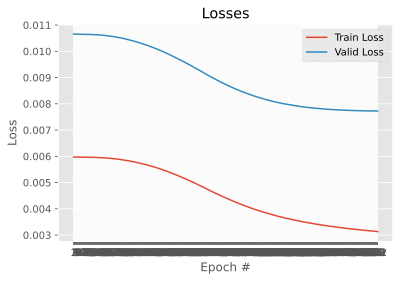

In [ ]:
#1
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

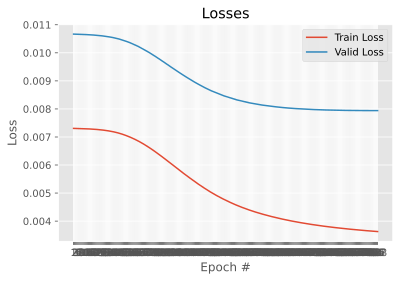

In [ ]:
#2
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

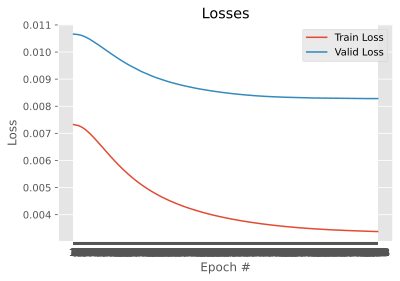

In [ ]:
#3
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

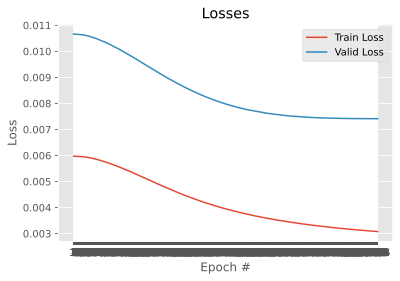

In [ ]:
#4
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

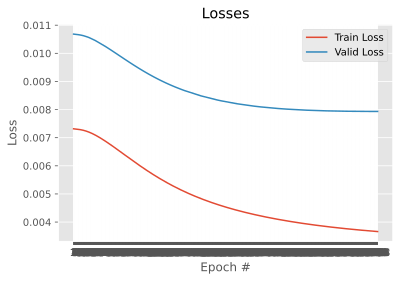

In [ ]:
#5
epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

In [ ]:
#1
from sklearn.metrics import confusion_matrix
tfidf_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = tfidf
        probs = tfidf_model(inputs)
        
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
        
print(classification_report(y_true, y_pred))
matrix = confusion_matrix(y_true, y_pred)
print("Confusion matrix::::\n",matrix)

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        50
           1       0.80      0.79      0.79        80

    accuracy                           0.75       130
   macro avg       0.73      0.73      0.73       130
weighted avg       0.75      0.75      0.75       130

Confusion matrix::::
 [[34 16]
 [17 63]]


In [ ]:
#2
from sklearn.metrics import confusion_matrix
tfidf_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = tfidf
        probs = tfidf_model(inputs)
        
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
        
print(classification_report(y_true, y_pred))
matrix = confusion_matrix(y_true, y_pred)
print("Confusion matrix::::\n",matrix)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        51
           1       0.85      0.78      0.82        79

    accuracy                           0.78       130
   macro avg       0.78      0.78      0.78       130
weighted avg       0.79      0.78      0.79       130

Confusion matrix::::
 [[40 11]
 [17 62]]


In [ ]:
#3
from sklearn.metrics import confusion_matrix
tfidf_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = tfidf
        probs = tfidf_model(inputs)
        
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
        
print(classification_report(y_true, y_pred))
matrix = confusion_matrix(y_true, y_pred)
print("Confusion matrix::::\n",matrix)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74        65
           1       0.74      0.75      0.75        65

    accuracy                           0.75       130
   macro avg       0.75      0.75      0.75       130
weighted avg       0.75      0.75      0.75       130

Confusion matrix::::
 [[48 17]
 [16 49]]


In [ ]:
#4
from sklearn.metrics import confusion_matrix
tfidf_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = tfidf
        probs = tfidf_model(inputs)
        
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
        
print(classification_report(y_true, y_pred))
matrix = confusion_matrix(y_true, y_pred)
print("Confusion matrix::::\n",matrix)

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        49
           1       0.81      0.79      0.80        81

    accuracy                           0.75       130
   macro avg       0.74      0.74      0.74       130
weighted avg       0.76      0.75      0.75       130

Confusion matrix::::
 [[34 15]
 [17 64]]


In [ ]:
#5
from sklearn.metrics import confusion_matrix
tfidf_model.eval()
test_accuracy, n_examples = 0, 0
y_true, y_pred = [], []

with torch.no_grad():
    for seq, bow, tfidf, target, text in valid_loader:
        inputs = tfidf
        probs = tfidf_model(inputs)
        
        probs = probs.detach().cpu().numpy()
        predictions = np.argmax(probs, axis=1)
        target = target.cpu().numpy()
        
        y_true.extend(predictions)
        y_pred.extend(target)
        
        
print(classification_report(y_true, y_pred))
matrix = confusion_matrix(y_true, y_pred)
print("Confusion matrix::::\n",matrix)

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        51
           1       0.86      0.80      0.83        79

    accuracy                           0.80       130
   macro avg       0.79      0.80      0.79       130
weighted avg       0.81      0.80      0.80       130

Confusion matrix::::
 [[41 10]
 [16 63]]


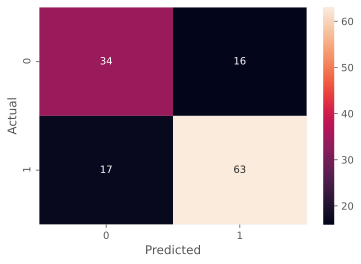

In [ ]:
#1
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

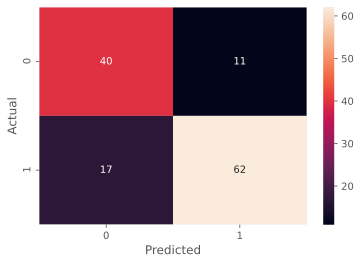

In [ ]:
#2
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

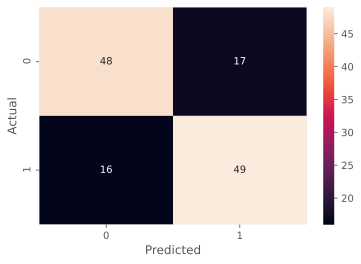

In [ ]:
#3
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

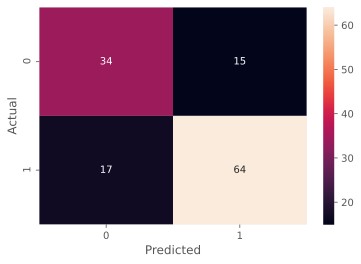

In [ ]:
#4
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

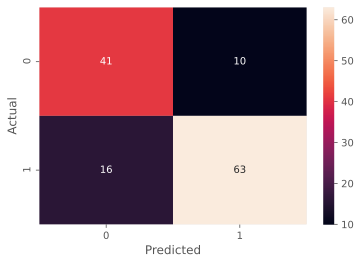

In [ ]:
#5
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_true,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
flatten = lambda x: [sublst for lst in x for sublst in lst]
seq_lst, bow_lst, tfidf_lst, target_lst, text_lst = zip(*test_loader)
seq_lst, bow_lst, tfidf_lst, target_lst, text_lst = map(flatten, [seq_lst, bow_lst, tfidf_lst, target_lst, text_lst])
test_examples = list(zip(seq_lst, bow_lst, tfidf_lst, target_lst, text_lst))

def print_random_prediction(model, n=5, input_type='tfidf'):
    to_emoji = lambda x: '😄' if x else '😡'
    model.eval()
    rows = []
    for i in range(n):
        with torch.no_grad():
            seq, bow, tdidf, target, text = random.choice(test_examples)
            target = target.item()
            
            inputs = bow
            if input_type == 'tdidf':
                inputs = tfidf

            probs = model([inputs])
            probs = probs.detach().cpu().numpy()
            prediction = np.argmax(probs, axis=1)[0]

            predicted = to_emoji(prediction)
            actual = to_emoji(target)
            
            row = f"""
            <tr>
            <td>{i+1}&nbsp;</td>
            <td>{text}&nbsp;</td>
            <td>{predicted}&nbsp;</td>
            <td>{actual}&nbsp;</td>
            </tr>
            """
            rows.append(row)
            
    rows_joined = '\n'.join(rows)
    table = f"""
    <table>
    <tbody>
    <tr>
    <td><b>Number</b>&nbsp;</td>
    <td><b>Review</b>&nbsp;</td>
    <td><b>Predicted</b>&nbsp;</td>
    <td><b>Actual</b>&nbsp;</td>
    </tr>{rows_joined}
    </tbody>
    </table>
    """
    display(HTML(table))

In [ ]:
#1
print_random_prediction(tfidf_model, n=5, input_type='tfidf')

In [ ]:
#2
print_random_prediction(tfidf_model, n=5, input_type='tfidf')

In [ ]:
#3
print_random_prediction(tfidf_model, n=5, input_type='tfidf')

In [ ]:
#4
print_random_prediction(tfidf_model, n=5, input_type='tfidf')

In [ ]:
#5
print_random_prediction(tfidf_model, n=5, input_type='tfidf')



# GLOVE FAST-TEXT RNN



In [ ]:
import torch
from torchtext.legacy import data

SEED = 1234
import pandas as pd
import numpy as np
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchtext

import nltk

import random
from sklearn.metrics import classification_report


%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dt = pd.read_csv("/content/drive/MyDrive/sc project_21_29_53/finaldatasetpp.csv")

In [ ]:
dt = dt.sample(n=dt.shape[0])
dt=dt[["text","label"]]

In [ ]:
o_class = dt.loc[dt.label == 0, :]
l_class = dt.loc[dt.label == 1, :]

In [ ]:
# splitting test and train 
train_o = o_class.iloc[:467, :]
train_l = l_class.iloc[:576, :]

valid_o = o_class.iloc[467:525, :]
valid_l = l_class.iloc[576:648, :]

test_o = o_class.iloc[525:, :]
test_l = l_class.iloc[648:, :]

In [ ]:
train = pd.concat([train_o, train_l], axis=0)
print(train.shape)

valid = pd.concat([valid_o, valid_l], axis=0)
print(valid.shape)

test = pd.concat([test_o, test_l], axis=0)
print(test.shape)

(1043, 2)
(130, 2)
(131, 2)


In [ ]:
train.label.value_counts()

1    576
0    467
Name: label, dtype: int64

In [ ]:
train.to_csv("/content/drive/MyDrive/sc project_21_29_53/train.csv", index=False)
test.to_csv("/content/drive/MyDrive/sc project_21_29_53/test.csv", index=False)
valid.to_csv("/content/drive/MyDrive/sc project_21_29_53/valid.csv", index=False)

In [ ]:
import spacy
spacy_en = spacy.load('en')

In [ ]:
is_cuda = torch.cuda.is_available()
print("Cuda Status on system is {}".format(is_cuda))

Cuda Status on system is True


In [ ]:
def tokenizer(text):
    return [tok for tok in nltk.word_tokenize(text)]

In [ ]:
TEXT = data.Field(sequential=True, tokenize="spacy")
LABEL = data.LabelField(dtype=torch.long, sequential=False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_data, valid_data, test_data = data.TabularDataset.splits(
    path="/content/drive/MyDrive/sc project_21_29_53/", train="train.csv", 
    validation="valid.csv", test="test.csv",format="csv", skip_header=True, 
    fields=[('Text', TEXT), ('Label', LABEL)]
)

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of valid examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 1043
Number of valid examples: 130
Number of testing examples: 131


GloVe_6B_100d+RNN

In [ ]:
TEXT.build_vocab(train_data, vectors = "glove.6B.100d", 
                 max_size=50000, min_freq=10)
LABEL.build_vocab(train_data)

In [ ]:
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 145
Unique tokens in LABEL vocabulary: 2


In [ ]:
BATCH_SIZE = 400

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# keep in mind the sort_key option 
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), sort_key=lambda x: len(x.Text),
    batch_size=BATCH_SIZE,
    device=device)

In [ ]:
LABEL.vocab.freqs

Counter({'0.0': 467, '1.0': 576})

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):

        #x = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        out = self.fc(hidden)
        return out

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 500
OUTPUT_DIM = 2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([140, 100])


In [ ]:
model.embedding.weight.data = pretrained_embeddings.cuda()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    preds, ind= torch.max(F.softmax(preds, dim=-1), 1)
    correct = (ind == y).float()
    acc = correct.sum()/float(len(correct))
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Text).squeeze(0)
#         print(predictions.shape, batch.Label.shape, model(batch.Text).shape)
        loss = criterion(predictions, batch.Label)
#         print(loss.shape)
        acc = binary_accuracy(predictions, batch.Label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:

            predictions = model(batch.Text).squeeze(0)
            
            loss = criterion(predictions, batch.Label)
            
            acc = binary_accuracy(predictions, batch.Label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
#Setting 01
N_EPOCHS = 100
t_loss=[]
v_loss=[]

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    if epoch % 10 == 0:
      t_loss.append(train_loss)
      v_loss.append(valid_loss)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.690 | Train Acc: 55.49% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 02 | Train Loss: 0.688 | Train Acc: 55.89% | Val. Loss: 0.687 | Val. Acc: 55.38% |
| Epoch: 03 | Train Loss: 0.688 | Train Acc: 55.17% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 04 | Train Loss: 0.687 | Train Acc: 55.70% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 05 | Train Loss: 0.687 | Train Acc: 55.52% | Val. Loss: 0.687 | Val. Acc: 55.38% |
| Epoch: 06 | Train Loss: 0.688 | Train Acc: 55.03% | Val. Loss: 0.687 | Val. Acc: 55.38% |
| Epoch: 07 | Train Loss: 0.686 | Train Acc: 55.98% | Val. Loss: 0.687 | Val. Acc: 55.38% |
| Epoch: 08 | Train Loss: 0.687 | Train Acc: 55.41% | Val. Loss: 0.687 | Val. Acc: 55.38% |
| Epoch: 09 | Train Loss: 0.687 | Train Acc: 55.39% | Val. Loss: 0.687 | Val. Acc: 55.38% |
| Epoch: 10 | Train Loss: 0.686 | Train Acc: 56.03% | Val. Loss: 0.687 | Val. Acc: 55.38% |
| Epoch: 11 | Train Loss: 0.685 | Train Acc: 56.30% | Val. Loss: 0.687 | Val. Ac

[0.6895651618639628, 0.6850371162096659, 0.6812614997227987, 0.5669843951861063, 0.523028035958608, 0.4995908836523692, 0.4796523153781891, 0.48311622937520343, 0.4675130248069763, 0.46048395832379657]


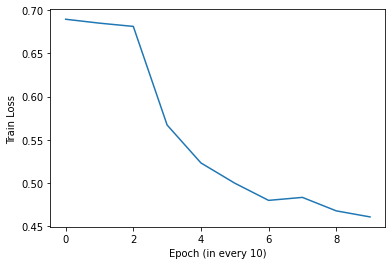

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (t_loss)
plt.plot(t_loss)
plt.ylabel('Train Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

[0.6878934502601624, 0.6873776316642761, 0.6858893632888794, 0.6069812774658203, 0.5632505416870117, 0.5439671277999878, 0.540263295173645, 0.548351526260376, 0.528610110282898, 0.5326099395751953]


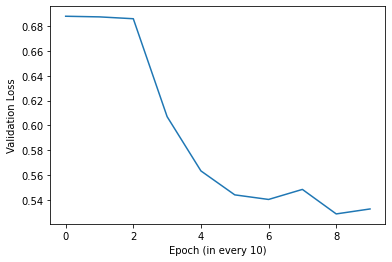

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (v_loss)
plt.plot(v_loss)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

In [ ]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% |')

| Test Loss: 0.533 | Test Acc: 76.34% |


GloVe_6B_300d+RNN

In [ ]:
TEXT.build_vocab(train_data, vectors = "glove.6B.300d", 
                 max_size=50000, min_freq=10)
LABEL.build_vocab(train_data)


100%|█████████▉| 399601/400000 [00:53<00:00, 7227.61it/s]

In [ ]:
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 145
Unique tokens in LABEL vocabulary: 2


In [ ]:
BATCH_SIZE = 400

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# keep in mind the sort_key option 
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), sort_key=lambda x: len(x.Text),
    batch_size=BATCH_SIZE,
    device=device)

In [ ]:
LABEL.vocab.freqs

Counter({'0.0': 467, '1.0': 576})

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):

        #x = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        out = self.fc(hidden)
        return out

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 1024
OUTPUT_DIM = 2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([140, 300])


In [ ]:
model.embedding.weight.data = pretrained_embeddings.cuda()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    preds, ind= torch.max(F.softmax(preds, dim=-1), 1)
    correct = (ind == y).float()
    acc = correct.sum()/float(len(correct))
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Text).squeeze(0)
#         print(predictions.shape, batch.Label.shape, model(batch.Text).shape)
        loss = criterion(predictions, batch.Label)
#         print(loss.shape)
        acc = binary_accuracy(predictions, batch.Label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:

            predictions = model(batch.Text).squeeze(0)
            
            loss = criterion(predictions, batch.Label)
            
            acc = binary_accuracy(predictions, batch.Label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
#Setting 05
N_EPOCHS = 100
t_loss=[]
v_loss=[]

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    if epoch % 10 == 0:
      t_loss.append(train_loss)
      v_loss.append(valid_loss)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.691 | Train Acc: 53.24% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 02 | Train Loss: 0.689 | Train Acc: 55.81% | Val. Loss: 0.689 | Val. Acc: 55.38% |
| Epoch: 03 | Train Loss: 0.689 | Train Acc: 55.22% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 04 | Train Loss: 0.687 | Train Acc: 55.62% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 05 | Train Loss: 0.687 | Train Acc: 55.52% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 06 | Train Loss: 0.688 | Train Acc: 55.12% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 07 | Train Loss: 0.686 | Train Acc: 55.98% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 08 | Train Loss: 0.687 | Train Acc: 55.41% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 09 | Train Loss: 0.687 | Train Acc: 55.39% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 10 | Train Loss: 0.685 | Train Acc: 56.03% | Val. Loss: 0.688 | Val. Acc: 55.38% |
| Epoch: 11 | Train Loss: 0.685 | Train Acc: 56.43% | Val. Loss: 0.688 | Val. Ac

[0.6914493640263876, 0.6849785248438517, 0.6179376045862833, 0.5040757656097412, 0.4755039910475413, 0.46980756521224976, 0.4437418083349864, 0.4518878261248271, 0.4434172014395396, 0.434886376063029]


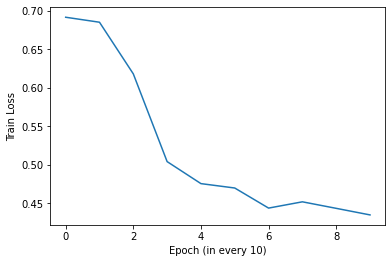

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (t_loss)
plt.plot(t_loss)
plt.ylabel('Train Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

[0.6877002716064453, 0.6880512237548828, 0.6167528033256531, 0.5755885243415833, 0.5521354675292969, 0.5489218831062317, 0.5466794371604919, 0.5441774725914001, 0.5262652039527893, 0.5400166511535645]


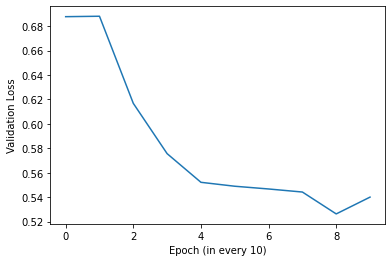

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (v_loss)
plt.plot(v_loss)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

In [ ]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% |')

| Test Loss: 0.673 | Test Acc: 68.70% |


In [ ]:
BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# keep in mind the sort_key option 
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), sort_key=lambda x: len(x.Text),
    batch_size=BATCH_SIZE,
    device=device)

In [ ]:
LABEL.vocab.freqs

Counter({'0.0': 467, '1.0': 576})

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):

        #x = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        out = self.fc(hidden)
        return out

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 500
OUTPUT_DIM = 2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([145, 300])


In [ ]:
model.embedding.weight.data = pretrained_embeddings.cuda()

In [ ]:
optimizer = optim.RMSprop(model.parameters(), lr=1e-4)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    preds, ind= torch.max(F.softmax(preds, dim=-1), 1)
    correct = (ind == y).float()
    acc = correct.sum()/float(len(correct))
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Text).squeeze(0)
#         print(predictions.shape, batch.Label.shape, model(batch.Text).shape)
        loss = criterion(predictions, batch.Label)
#         print(loss.shape)
        acc = binary_accuracy(predictions, batch.Label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:

            predictions = model(batch.Text).squeeze(0)
            
            loss = criterion(predictions, batch.Label)
            
            acc = binary_accuracy(predictions, batch.Label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
#Setting 04
N_EPOCHS = 100
t_loss=[]
v_loss=[]

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    if epoch % 10 == 0:
      t_loss.append(train_loss)
      v_loss.append(valid_loss)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.693 | Train Acc: 51.90% | Val. Loss: 0.620 | Val. Acc: 77.34% |
| Epoch: 02 | Train Loss: 0.690 | Train Acc: 54.66% | Val. Loss: 0.656 | Val. Acc: 77.73% |
| Epoch: 03 | Train Loss: 0.686 | Train Acc: 56.32% | Val. Loss: 0.651 | Val. Acc: 77.73% |
| Epoch: 04 | Train Loss: 0.685 | Train Acc: 56.41% | Val. Loss: 0.649 | Val. Acc: 77.34% |
| Epoch: 05 | Train Loss: 0.683 | Train Acc: 57.82% | Val. Loss: 0.636 | Val. Acc: 77.34% |
| Epoch: 06 | Train Loss: 0.680 | Train Acc: 57.49% | Val. Loss: 0.650 | Val. Acc: 77.34% |
| Epoch: 07 | Train Loss: 0.697 | Train Acc: 53.34% | Val. Loss: 0.663 | Val. Acc: 77.34% |
| Epoch: 08 | Train Loss: 0.684 | Train Acc: 57.08% | Val. Loss: 0.672 | Val. Acc: 52.34% |
| Epoch: 09 | Train Loss: 0.686 | Train Acc: 55.15% | Val. Loss: 0.702 | Val. Acc: 52.34% |
| Epoch: 10 | Train Loss: 0.685 | Train Acc: 55.33% | Val. Loss: 0.644 | Val. Acc: 77.34% |
| Epoch: 11 | Train Loss: 0.686 | Train Acc: 55.33% | Val. Loss: 0.698 | Val. Ac

[0.6928106546401978, 0.6858575211630927, 0.5409074558152093, 0.49587162997987533, 0.4885909590456221, 0.4563102556599511, 0.4628970788584815, 0.4628173245324029, 0.4804554846551683, 0.44970807433128357]


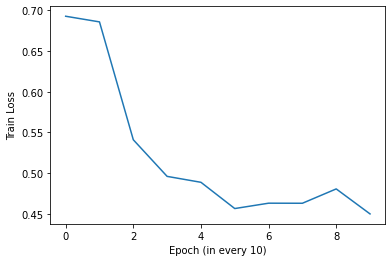

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (t_loss)
plt.plot(t_loss)
plt.ylabel('Train Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

[0.6199522018432617, 0.6978375017642975, 0.43575426936149597, 0.41535358875989914, 0.7186062932014465, 0.5091694295406342, 0.3968267887830734, 0.48187170922756195, 0.5667483806610107, 0.6045995652675629]


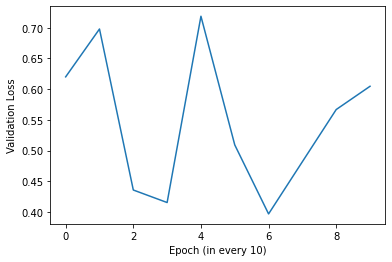

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (v_loss)
plt.plot(v_loss)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

In [ ]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% |')

| Test Loss: 0.564 | Test Acc: 67.32% |


Tuning Hyperparameters for FastText_300d+RNN model

In [ ]:
TEXT.build_vocab(train_data, vectors = "fasttext.en.300d", 
                 max_size=50000, min_freq=10)
LABEL.build_vocab(train_data)

Streaming output truncated to the last 5000 lines.

 41%|████▏     | 1041549/2519370 [03:24<04:31, 5446.80it/s]

 41%|████▏     | 1042128/2519370 [03:24<04:26, 5545.25it/s]

 41%|████▏     | 1042688/2519370 [03:24<04:25, 5560.29it/s]

 41%|████▏     | 1043311/2519370 [03:24<04:16, 5745.57it/s]

 41%|████▏     | 1043889/2519370 [03:24<04:16, 5751.63it/s]

 41%|████▏     | 1044474/2519370 [03:24<04:15, 5779.45it/s]

 41%|████▏     | 1045054/2519370 [03:24<04:17, 5727.09it/s]

 42%|████▏     | 1045628/2519370 [03:25<04:20, 5666.03it/s]

 42%|████▏     | 1046196/2519370 [03:25<04:21, 5631.48it/s]

 42%|████▏     | 1046760/2519370 [03:25<04:30, 5450.84it/s]

 42%|████▏     | 1047353/2519370 [03:25<04:23, 5584.85it/s]

 42%|████▏     | 1047923/2519370 [03:25<04:21, 5617.30it/s]

 42%|████▏     | 1048493/2519370 [03:25<04:20, 5640.15it/s]

 42%|████▏     | 1049072/2519370 [03:25<04:18, 5682.45it/s]

 42%|████▏     | 1049642/2519370 [03:25<04:23, 5581.87it/s]

 42%|████▏     | 1050212/2519370 

In [ ]:
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 145
Unique tokens in LABEL vocabulary: 2


In [ ]:
BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# keep in mind the sort_key option 
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), sort_key=lambda x: len(x.Text),
    batch_size=BATCH_SIZE,
    device=device)

In [ ]:
LABEL.vocab.freqs

Counter({'0.0': 467, '1.0': 576})

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):

        #x = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        out = self.fc(hidden)
        return out

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 500
OUTPUT_DIM = 2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([145, 300])


In [ ]:
model.embedding.weight.data = pretrained_embeddings.cuda()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    preds, ind= torch.max(F.softmax(preds, dim=-1), 1)
    correct = (ind == y).float()
    acc = correct.sum()/float(len(correct))
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Text).squeeze(0)
#         print(predictions.shape, batch.Label.shape, model(batch.Text).shape)
        loss = criterion(predictions, batch.Label)
#         print(loss.shape)
        acc = binary_accuracy(predictions, batch.Label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:

            predictions = model(batch.Text).squeeze(0)
            
            loss = criterion(predictions, batch.Label)
            
            acc = binary_accuracy(predictions, batch.Label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
#Setting 07
N_EPOCHS = 100
t_loss=[]
v_loss=[]

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    if epoch % 10 == 0:
      t_loss.append(train_loss)
      v_loss.append(valid_loss)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.693 | Train Acc: 50.79% | Val. Loss: 0.660 | Val. Acc: 77.34% |
| Epoch: 02 | Train Loss: 0.690 | Train Acc: 54.57% | Val. Loss: 0.628 | Val. Acc: 77.34% |
| Epoch: 03 | Train Loss: 0.686 | Train Acc: 56.06% | Val. Loss: 0.634 | Val. Acc: 77.34% |
| Epoch: 04 | Train Loss: 0.685 | Train Acc: 56.15% | Val. Loss: 0.642 | Val. Acc: 77.34% |
| Epoch: 05 | Train Loss: 0.683 | Train Acc: 57.64% | Val. Loss: 0.644 | Val. Acc: 77.34% |
| Epoch: 06 | Train Loss: 0.682 | Train Acc: 57.32% | Val. Loss: 0.633 | Val. Acc: 77.34% |
| Epoch: 07 | Train Loss: 0.694 | Train Acc: 53.16% | Val. Loss: 0.642 | Val. Acc: 77.34% |
| Epoch: 08 | Train Loss: 0.686 | Train Acc: 56.32% | Val. Loss: 0.643 | Val. Acc: 77.34% |
| Epoch: 09 | Train Loss: 0.688 | Train Acc: 55.07% | Val. Loss: 0.652 | Val. Acc: 77.34% |
| Epoch: 10 | Train Loss: 0.686 | Train Acc: 56.24% | Val. Loss: 0.650 | Val. Acc: 77.34% |
| Epoch: 11 | Train Loss: 0.687 | Train Acc: 55.33% | Val. Loss: 0.645 | Val. Ac

[0.6934970021247864, 0.6871650020281473, 0.684144463804033, 0.4997764031092326, 0.4985363748338487, 0.44437232944700455, 0.44235432479116654, 0.43080711033609176, 0.4462638265556759, 0.43347109688652885]


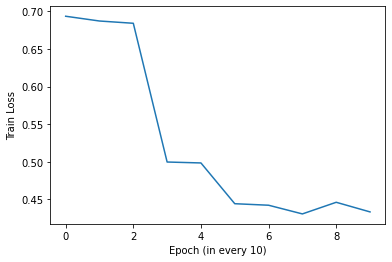

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (t_loss)
plt.plot(t_loss)
plt.ylabel('Train Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

[0.6601659953594208, 0.6452318429946899, 0.6308246850967407, 0.43935997784137726, 0.5387093424797058, 0.5136758685112, 0.5586514472961426, 0.5439110398292542, 0.5485195219516754, 0.42656031250953674]


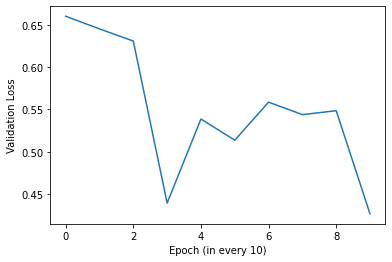

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (v_loss)
plt.plot(v_loss)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

In [ ]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% |')

| Test Loss: 0.979 | Test Acc: 49.09% |


In [ ]:
BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# keep in mind the sort_key option 
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), sort_key=lambda x: len(x.Text),
    batch_size=BATCH_SIZE,
    device=device)

In [ ]:
LABEL.vocab.freqs

Counter({'0.0': 467, '1.0': 576})

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):

        #x = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        out = self.fc(hidden)
        return out

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 500
OUTPUT_DIM = 2
LR= 1e-4

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([145, 300])


In [ ]:
model.embedding.weight.data = pretrained_embeddings.cuda()

In [ ]:
optimizer = optim.RMSprop(model.parameters(), lr=LR)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    preds, ind= torch.max(F.softmax(preds, dim=-1), 1)
    correct = (ind == y).float()
    acc = correct.sum()/float(len(correct))
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Text).squeeze(0)
#         print(predictions.shape, batch.Label.shape, model(batch.Text).shape)
        loss = criterion(predictions, batch.Label)
#         print(loss.shape)
        acc = binary_accuracy(predictions, batch.Label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:

            predictions = model(batch.Text).squeeze(0)
            
            loss = criterion(predictions, batch.Label)
            
            acc = binary_accuracy(predictions, batch.Label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
#Setting 06
N_EPOCHS = 100
t_loss=[]
v_loss=[]

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    if epoch % 10 == 0:
      t_loss.append(train_loss)
      v_loss.append(valid_loss)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.696 | Train Acc: 51.92% | Val. Loss: 0.620 | Val. Acc: 77.34% |
| Epoch: 02 | Train Loss: 0.691 | Train Acc: 54.66% | Val. Loss: 0.658 | Val. Acc: 77.34% |
| Epoch: 03 | Train Loss: 0.686 | Train Acc: 56.15% | Val. Loss: 0.654 | Val. Acc: 77.34% |
| Epoch: 04 | Train Loss: 0.686 | Train Acc: 56.15% | Val. Loss: 0.650 | Val. Acc: 77.34% |
| Epoch: 05 | Train Loss: 0.683 | Train Acc: 57.82% | Val. Loss: 0.630 | Val. Acc: 77.34% |
| Epoch: 06 | Train Loss: 0.681 | Train Acc: 57.49% | Val. Loss: 0.635 | Val. Acc: 77.34% |
| Epoch: 07 | Train Loss: 0.698 | Train Acc: 53.16% | Val. Loss: 0.652 | Val. Acc: 77.34% |
| Epoch: 08 | Train Loss: 0.686 | Train Acc: 56.41% | Val. Loss: 0.649 | Val. Acc: 77.34% |
| Epoch: 09 | Train Loss: 0.687 | Train Acc: 55.24% | Val. Loss: 0.657 | Val. Acc: 77.34% |
| Epoch: 10 | Train Loss: 0.686 | Train Acc: 56.32% | Val. Loss: 0.637 | Val. Acc: 77.34% |
| Epoch: 11 | Train Loss: 0.686 | Train Acc: 56.00% | Val. Loss: 0.648 | Val. Ac

[0.6956005295117696, 0.6855282717280917, 0.6685542861620585, 0.5167234705554115, 0.49368181162410313, 0.46694255206320023, 0.4492878450287713, 0.45533139175838894, 0.44994023111131454, 0.45977164308230084]


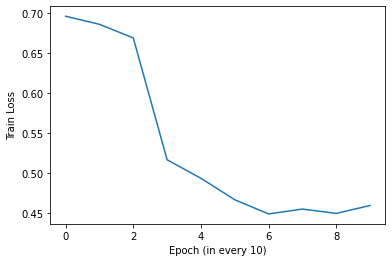

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (t_loss)
plt.plot(t_loss)
plt.ylabel('Train Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

[0.6195064187049866, 0.6478764712810516, 0.7251274287700653, 0.41928429901599884, 0.5503590703010559, 0.48383697867393494, 0.3923323191702366, 0.41195015609264374, 0.38861293345689774, 0.39217275381088257]


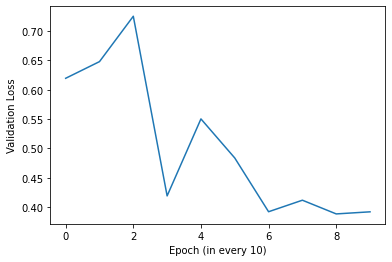

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (v_loss)
plt.plot(v_loss)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

In [ ]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% |')

| Test Loss: 0.817 | Test Acc: 47.92% |


Tuning Hyperparameters for GloVe_6B_100d+RNN model

In [ ]:
BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# keep in mind the sort_key option 
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), sort_key=lambda x: len(x.Text),
    batch_size=BATCH_SIZE,
    device=device)

In [ ]:
LABEL.vocab.freqs

Counter({'0.0': 467, '1.0': 576})

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):

        #x = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        out = self.fc(hidden)
        return out

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 500
OUTPUT_DIM = 2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([145, 100])


In [ ]:
model.embedding.weight.data = pretrained_embeddings.cuda()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    preds, ind= torch.max(F.softmax(preds, dim=-1), 1)
    correct = (ind == y).float()
    acc = correct.sum()/float(len(correct))
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Text).squeeze(0)
#         print(predictions.shape, batch.Label.shape, model(batch.Text).shape)
        loss = criterion(predictions, batch.Label)
#         print(loss.shape)
        acc = binary_accuracy(predictions, batch.Label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:

            predictions = model(batch.Text).squeeze(0)
            
            loss = criterion(predictions, batch.Label)
            
            acc = binary_accuracy(predictions, batch.Label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
#Setting 02
N_EPOCHS = 100
t_loss=[]
v_loss=[]

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    if epoch % 10 == 0:
      t_loss.append(train_loss)
      v_loss.append(valid_loss)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.695 | Train Acc: 48.80% | Val. Loss: 0.663 | Val. Acc: 77.34% |
| Epoch: 02 | Train Loss: 0.691 | Train Acc: 54.57% | Val. Loss: 0.625 | Val. Acc: 77.34% |
| Epoch: 03 | Train Loss: 0.686 | Train Acc: 56.06% | Val. Loss: 0.630 | Val. Acc: 77.34% |
| Epoch: 04 | Train Loss: 0.685 | Train Acc: 56.24% | Val. Loss: 0.638 | Val. Acc: 77.34% |
| Epoch: 05 | Train Loss: 0.684 | Train Acc: 57.64% | Val. Loss: 0.640 | Val. Acc: 77.34% |
| Epoch: 06 | Train Loss: 0.683 | Train Acc: 57.41% | Val. Loss: 0.630 | Val. Acc: 77.34% |
| Epoch: 07 | Train Loss: 0.692 | Train Acc: 53.66% | Val. Loss: 0.638 | Val. Acc: 77.34% |
| Epoch: 08 | Train Loss: 0.684 | Train Acc: 56.91% | Val. Loss: 0.641 | Val. Acc: 77.34% |
| Epoch: 09 | Train Loss: 0.688 | Train Acc: 54.98% | Val. Loss: 0.653 | Val. Acc: 77.34% |
| Epoch: 10 | Train Loss: 0.686 | Train Acc: 56.41% | Val. Loss: 0.651 | Val. Acc: 77.34% |
| Epoch: 11 | Train Loss: 0.687 | Train Acc: 55.24% | Val. Loss: 0.645 | Val. Ac

[0.6950167881117927, 0.686817553308275, 0.6831576294369168, 0.5917917754915025, 0.5254316859775119, 0.4782979488372803, 0.47177325354682076, 0.4697715375158522, 0.4867079688443078, 0.4587971402539147]


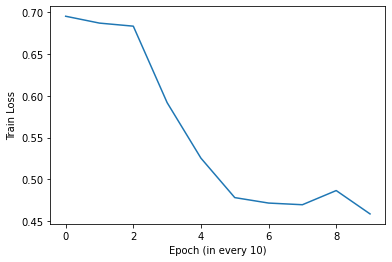

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (t_loss)
plt.plot(t_loss)
plt.ylabel('Train Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

[0.6630925536155701, 0.6446996629238129, 0.6447179317474365, 0.42356911301612854, 0.37849748134613037, 0.3912384361028671, 0.3922891914844513, 0.3837284743785858, 0.38666999340057373, 0.3806566596031189]


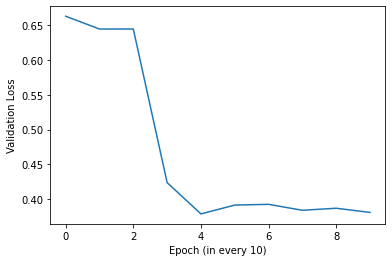

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (v_loss)
plt.plot(v_loss)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

In [ ]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% |')

| Test Loss: 0.588 | Test Acc: 66.93% |


In [ ]:
BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# keep in mind the sort_key option 
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), sort_key=lambda x: len(x.Text),
    batch_size=BATCH_SIZE,
    device=device)

In [ ]:
LABEL.vocab.freqs

Counter({'0.0': 467, '1.0': 576})

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):

        #x = [sent len, batch size]
        
        embedded = self.embedding(x)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        out = self.fc(hidden)
        return out

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 500
OUTPUT_DIM = 2
LR= 1e-4

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([149, 100])


In [ ]:
model.embedding.weight.data = pretrained_embeddings.cuda()

In [ ]:
optimizer = optim.RMSprop(model.parameters(), lr=LR)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    preds, ind= torch.max(F.softmax(preds, dim=-1), 1)
    correct = (ind == y).float()
    acc = correct.sum()/float(len(correct))
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.Text).squeeze(0)
#         print(predictions.shape, batch.Label.shape, model(batch.Text).shape)
        loss = criterion(predictions, batch.Label)
#         print(loss.shape)
        acc = binary_accuracy(predictions, batch.Label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:

            predictions = model(batch.Text).squeeze(0)
            
            loss = criterion(predictions, batch.Label)
            
            acc = binary_accuracy(predictions, batch.Label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
#Setting 03
N_EPOCHS = 100
t_loss=[]
v_loss=[]

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    if epoch % 10 == 0:
      t_loss.append(train_loss)
      v_loss.append(valid_loss)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.690 | Train Acc: 52.76% | Val. Loss: 0.738 | Val. Acc: 28.12% |
| Epoch: 02 | Train Loss: 0.687 | Train Acc: 56.56% | Val. Loss: 0.759 | Val. Acc: 28.12% |
| Epoch: 03 | Train Loss: 0.686 | Train Acc: 56.32% | Val. Loss: 0.744 | Val. Acc: 28.12% |
| Epoch: 04 | Train Loss: 0.689 | Train Acc: 55.15% | Val. Loss: 0.727 | Val. Acc: 27.73% |
| Epoch: 05 | Train Loss: 0.687 | Train Acc: 55.07% | Val. Loss: 0.732 | Val. Acc: 27.34% |
| Epoch: 06 | Train Loss: 0.688 | Train Acc: 54.66% | Val. Loss: 0.758 | Val. Acc: 26.95% |
| Epoch: 07 | Train Loss: 0.683 | Train Acc: 57.90% | Val. Loss: 0.862 | Val. Acc: 27.73% |
| Epoch: 08 | Train Loss: 0.685 | Train Acc: 56.99% | Val. Loss: 0.884 | Val. Acc: 28.12% |
| Epoch: 09 | Train Loss: 0.687 | Train Acc: 55.67% | Val. Loss: 0.876 | Val. Acc: 28.91% |
| Epoch: 10 | Train Loss: 0.689 | Train Acc: 55.91% | Val. Loss: 0.835 | Val. Acc: 28.12% |
| Epoch: 11 | Train Loss: 0.689 | Train Acc: 55.65% | Val. Loss: 0.815 | Val. Ac

[0.6901427507400513, 0.6892620921134949, 0.6834481689665053, 0.5755486653910743, 0.5357571178012424, 0.5147809849845039, 0.5022022724151611, 0.47914865281846786, 0.48268161879645455, 0.4941842191749149]


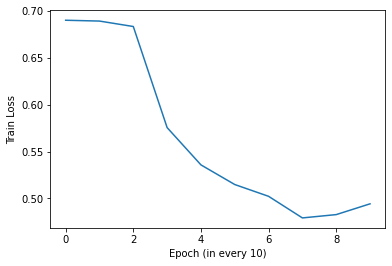

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (t_loss)
plt.plot(t_loss)
plt.ylabel('Train Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

[0.7382107079029083, 0.8150807917118073, 0.7410232424736023, 0.44299808144569397, 0.4042724519968033, 0.41016054153442383, 0.4382912814617157, 0.38129423558712006, 0.39612506330013275, 0.4095572829246521]


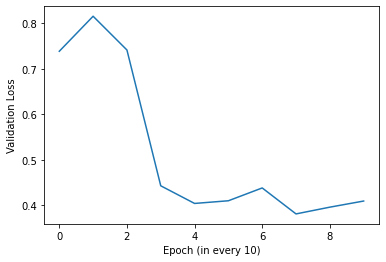

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (v_loss)
plt.plot(v_loss)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

In [ ]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% |')

| Test Loss: 0.366 | Test Acc: 87.89% |
